In [1]:
import pandas as pd
import collections
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [2]:
# The data frame is called house_info
raw_info = pd.read_csv("kc_house_data.csv",error_bad_lines=False)

C:\ProgramData\Anaconda_success_2\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
raw_info

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [4]:
%store raw_info

Stored 'raw_info' (DataFrame)


In [5]:
house_info = pd.DataFrame({'Bedrooms':raw_info.bedrooms, 'Bathrooms':raw_info.bathrooms, 'Floors':raw_info.floors, 
                           'Year Built':raw_info.yr_built, 'Year Renoveted':raw_info.yr_renovated,
                           'Size of Basement':raw_info.sqft_basement,'Condition':raw_info.condition,
                          'Size of Above':raw_info.sqft_above,'Location':raw_info.zipcode,
                          'Price':raw_info.price, 'Sqft_living':raw_info.sqft_living,'Sqft_lot':raw_info.sqft_lot,
                          'Sqft_basement':raw_info.sqft_basement})

In [6]:
%store house_info
house_info

Stored 'house_info' (DataFrame)


Bedrooms  Bathrooms  Floors  Year Built  Year Renoveted  \
0             3       1.00     1.0        1955             0.0   
1             3       2.25     2.0        1951          1991.0   
2             2       1.00     1.0        1933             NaN   
3             4       3.00     1.0        1965             0.0   
4             3       2.00     1.0        1987             0.0   
...         ...        ...     ...         ...             ...   
21592         3       2.50     3.0        2009             0.0   
21593         4       2.50     2.0        2014             0.0   
21594         2       0.75     2.0        2009             0.0   
21595         3       2.50     2.0        2004             0.0   
21596         2       0.75     2.0        2008             0.0   

      Size of Basement  Condition  Size of Above  Location     Price  \
0                  0.0    Average           1180     98178  221900.0   
1                400.0    Average           2170     98125  538000.0   
2                  0.0    Average            770     98028  180000.0   
3                910.0  Very Good           1050     98136  604000.0   
4                  0.0    Average           1680     98074  510000.0   
...                ...        ...            ...       ...       ...   
21592              0.0    Average           1530     98103  360000.0   
21593              0.0    Average           2310     98146  400000.0   
21594              0.0    Average           1020     98144  402101.0   
21595              0.0    Average           1600     98027  400000.0   
21596              0.0    Average           1020     98144  325000.0   

       Sqft_living  Sqft_lot Sqft_basement  
0             1180      5650           0.0  
1             2570      7242         400.0  
2              770     10000           0.0  
3             1960      5000         910.0  
4             1680      8080           0.0  
...            ...       ...           ...  
21592         1530      1131           0.0  
21593         2310      5813           0.0  
21594         1020      1350           0.0  
21595         1600      2388           0.0  
21596         1020      1076           0.0  

[21597 rows x 13 columns]

In [7]:
house_info.describe()

Bedrooms     Bathrooms        Floors    Year Built  Year Renoveted  \
count  21597.000000  21597.000000  21597.000000  21597.000000    17755.000000   
mean       3.373200      2.115826      1.494096   1970.999676       83.636778   
std        0.926299      0.768984      0.539683     29.375234      399.946414   
min        1.000000      0.500000      1.000000   1900.000000        0.000000   
25%        3.000000      1.750000      1.000000   1951.000000        0.000000   
50%        3.000000      2.250000      1.500000   1975.000000        0.000000   
75%        4.000000      2.500000      2.000000   1997.000000        0.000000   
max       33.000000      8.000000      3.500000   2015.000000     2015.000000   

       Size of Above      Location         Price   Sqft_living      Sqft_lot  
count   21597.000000  21597.000000  2.159700e+04  21597.000000  2.159700e+04  
mean     1788.596842  98077.951845  5.402966e+05   2080.321850  1.509941e+04  
std       827.759761     53.513072  3.673681e+05    918.106125  4.141264e+04  
min       370.000000  98001.000000  7.800000e+04    370.000000  5.200000e+02  
25%      1190.000000  98033.000000  3.220000e+05   1430.000000  5.040000e+03  
50%      1560.000000  98065.000000  4.500000e+05   1910.000000  7.618000e+03  
75%      2210.000000  98118.000000  6.450000e+05   2550.000000  1.068500e+04  
max      9410.000000  98199.000000  7.700000e+06  13540.000000  1.651359e+06

In [8]:
locationzip =raw_info.zipcode
locationzip

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

In [9]:
zip_loca =[98045, 98065,98024,98029,98027,98075,98074,98014,98019]

In [9]:
locations = house_info['Location'].tolist()
index = []
for i,x in enumerate(locations): 
    if locations[i] == zip_loca[0] : index.append(i)
    elif locations[i] == zip_loca[1] : index.append(i)
    elif locations[i] == zip_loca[2] : index.append(i)
    elif locations[i] == zip_loca[3] : index.append(i)
    elif locations[i] == zip_loca[4]: index.append(i)
    elif locations[i] == zip_loca[5] : index.append(i)
    elif locations[i] == zip_loca[6] : index.append(i)
    elif locations[i] == zip_loca[7]: index.append(i)
    elif locations[i] == zip_loca[8] : index.append(i)
%store index
len(index)

Stored 'index' (list)


2455

In [11]:
def PRICE_BEDROOM(AMOUNT_BEDROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)

    
    #zip_loca = []
    #for i in index:zip_loca.append(locationzip[i])
    
    bedrooms_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedrooms_index.append(i)
    len(bedrooms_index)

    bedrooms_eastking = []
    for i in bedrooms_index:
        if locations[i] == zip_loca[0] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[1] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[2] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[3] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[4]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[5] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[6] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[7]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[8] : bedrooms_eastking.append(i)
       
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in bedrooms_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
price_bedrooms_eastking = []
for i in no_of_bedrooms:
    price_bedrooms_eastking.append(PRICE_BEDROOM(i))
price_bedrooms_eastking= sum(price_bedrooms_eastking, [])
len(price_bedrooms_eastking)


2455

In [12]:
def AMOUNT_BEDROOMS(AMOUNT_BEDROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    X_value = []
    bedroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    #zip_loca = []
    #for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedroom_index.append(i)

    for i in bedroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BEDROOM)
       
       
    return X_value
no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
amount_bedrooms_eastking = []
for i in no_of_bedrooms:
    amount_bedrooms_eastking.append(AMOUNT_BEDROOMS(i))
amount_bedrooms_eastking= sum(amount_bedrooms_eastking, [])
len(amount_bedrooms_eastking)

2455

In [13]:
regressiondata1 = pd.DataFrame({'Amount_of_Bedrooms':amount_bedrooms_eastking,
                                'Price':price_bedrooms_eastking})
#regressiondata1 = regressiondata1.drop(3830)
regressiondata1

Amount_of_Bedrooms     Price
0                      3  510000.0
1                      3  400000.0
2                      3  395000.0
3                      3  580500.0
4                      3  488000.0
...                  ...       ...
2450                   1  550000.0
2451                   1  283700.0
2452                   7  600000.0
2453                   7  936000.0
2454                   7  840000.0

[2455 rows x 2 columns]

In [14]:
regressiondata1.describe()

Amount_of_Bedrooms         Price
count         2455.000000  2.455000e+03
mean             3.512424  6.033481e+05
std              0.789956  2.747017e+05
min              1.000000  8.000000e+04
25%              3.000000  4.350000e+05
50%              3.000000  5.600000e+05
75%              4.000000  7.140000e+05
max              7.000000  3.200000e+06

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/4041392886.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',


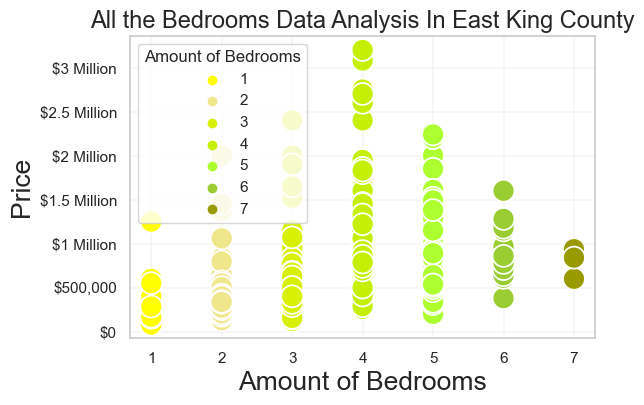

In [15]:
x = regressiondata1['Amount_of_Bedrooms']
y = regressiondata1['Price']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata1, x=x, y=y,s=250,hue='Amount_of_Bedrooms',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Bedrooms')
#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
                    '$3 Million'])
plt.show()

In [533]:
import pandas as pd
from sklearn.linear_model import PoissonRegressor

model1 = PoissonRegressor()

model1.fit(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
#score = model1.score(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [534]:
x = regressiondata1[['Amount_of_Bedrooms']]
y = regressiondata1[['Price']]
prediction1 = model1.predict(x)

In [535]:
model_fit1 = regressiondata1
model_fit1['preds'] = prediction1

In [536]:
model_fit1

Amount_of_Bedrooms     Price         preds
0                      3  510000.0  5.232836e+05
1                      3  400000.0  5.232836e+05
2                      3  395000.0  5.232836e+05
3                      3  580500.0  5.232836e+05
4                      3  488000.0  5.232836e+05
...                  ...       ...           ...
2450                   1  550000.0  3.226288e+05
2451                   1  283700.0  3.226288e+05
2452                   7  600000.0  1.376592e+06
2453                   7  936000.0  1.376592e+06
2454                   7  840000.0  1.376592e+06

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2439454104.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million'])


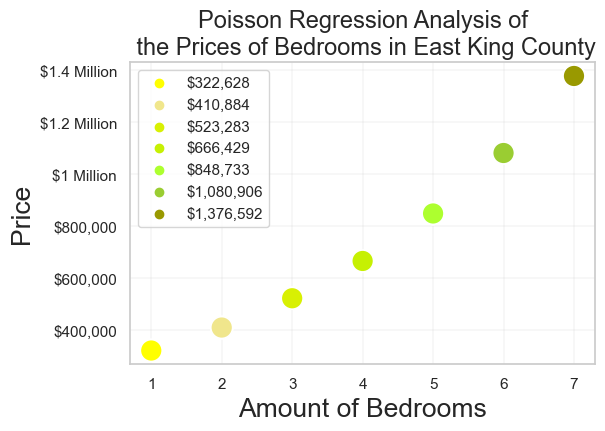

In [537]:
x = model_fit1['Amount_of_Bedrooms']
y = model_fit1['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit1, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
L.get_texts()[0].set_text('$322,628')
L.get_texts()[1].set_text('$410,884')
L.get_texts()[2].set_text('$523,283')
L.get_texts()[3].set_text('$666,429')
L.get_texts()[4].set_text('$848,733')
L.get_texts()[5].set_text('$1,080,906')
L.get_texts()[6].set_text('$1,376,592')

#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/979901047.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million'])


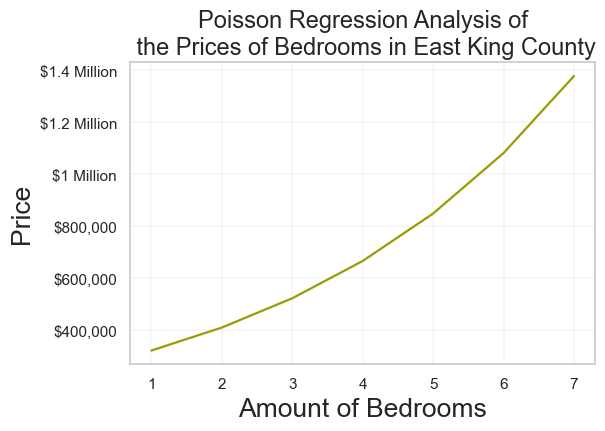

In [538]:
x = model_fit1['Amount_of_Bedrooms']
y = model_fit1['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit1, x=x, y=y,color='#999900')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million'])
plt.show()

In [550]:
(model_fit1['Price'] > model_fit1['preds']).value_counts()

False    1438
True     1017
dtype: int64

In [551]:
i = 0
y= 0
x = []
while i <  1423:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1032:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Possion Model\n 58% Accuracy ')

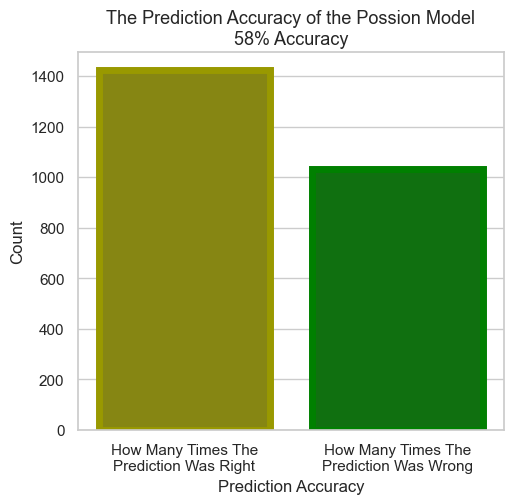

In [552]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Possion Model\n 58% Accuracy ',size=13)

In [542]:
# Importing modules that are required
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
   
# Creating and training model
model3 = BayesianRidge()
model3.fit(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
   
# Model making a prediction on test data
prediction = model3.predict(regressiondata1[['Amount_of_Bedrooms']])
#score = model3.score(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
#score

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [543]:
model_fit2 = regressiondata1
model_fit2['preds'] = prediction

In [546]:
model_fit2

Amount_of_Bedrooms     Price         preds
0                      3  510000.0  5.272545e+05
1                      3  400000.0  5.272545e+05
2                      3  395000.0  5.272545e+05
3                      3  580500.0  5.272545e+05
4                      3  488000.0  5.272545e+05
...                  ...       ...           ...
2450                   1  550000.0  2.302597e+05
2451                   1  283700.0  2.302597e+05
2452                   7  600000.0  1.121244e+06
2453                   7  936000.0  1.121244e+06
2454                   7  840000.0  1.121244e+06

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3661696793.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '')]

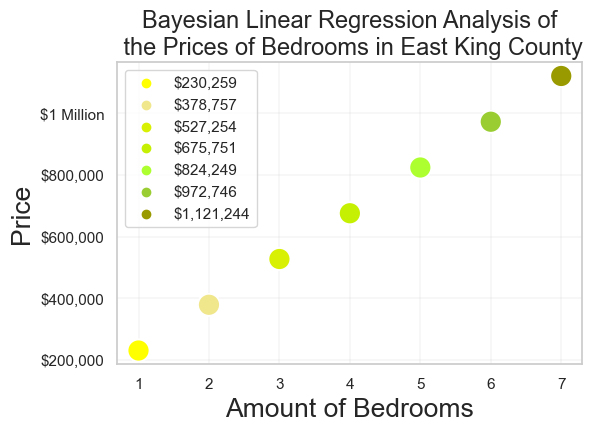

In [355]:
x = model_fit2['Amount_of_Bedrooms']
y = model_fit2['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit2, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L.get_texts()[0].set_text('$230,259')
L.get_texts()[1].set_text('$378,757')
L.get_texts()[2].set_text('$527,254')
L.get_texts()[3].set_text('$675,751')
L.get_texts()[4].set_text('$824,249')
L.get_texts()[5].set_text('$972,746')
L.get_texts()[6].set_text('$1,121,244')


#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3526471988.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '')]

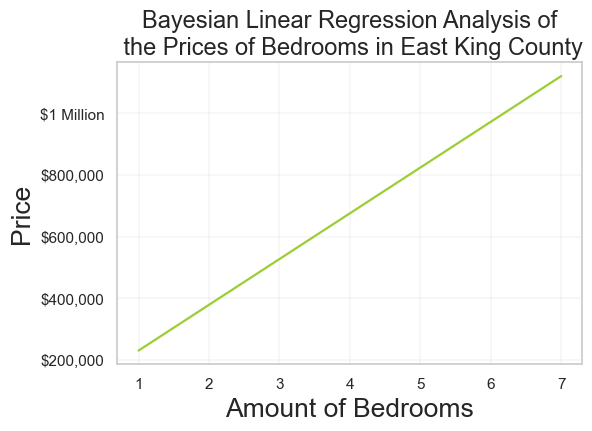

In [356]:
x = model_fit2['Amount_of_Bedrooms']
y = model_fit2['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit2, x=x, y=y,color='#9ACD32')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])

In [553]:
(model_fit2['Price'] > model_fit2['preds']).value_counts()

False    1438
True     1017
dtype: int64

In [554]:
i = 0
y= 0
x = []
while i <  1438:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1017:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Bayesian Linear Model\n 60% Accuracy ')

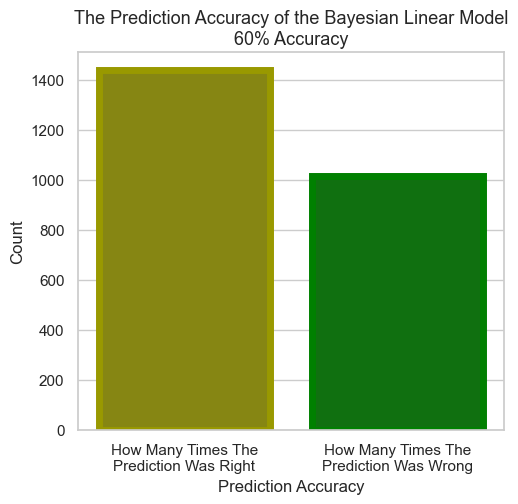

In [555]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Bayesian Linear Model\n 60% Accuracy ',size=13)

In [27]:
from sklearn.linear_model import QuantileRegressor

quantile = [0.05, 0.5, 0.95]
X = regressiondata1[['Amount_of_Bedrooms']]
y = regressiondata1[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata1[['Amount_of_Bedrooms']])
y_pred_2 = qrf2.predict(regressiondata1[['Amount_of_Bedrooms']])
y_pred_3 = qrf3.predict(regressiondata1[['Amount_of_Bedrooms']])

score1 = qrf1.score(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
score2 = qrf2.score(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
score3 = qrf3.score(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packa

In [29]:
Quantile_regression = pd.DataFrame({'Amount_of_Bedrooms': regressiondata1['Amount_of_Bedrooms'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata1['Price']})

In [30]:
Quantile_regression

Amount_of_Bedrooms       0.1 Pred      0.5 Pred      0.9 Pred     Price
0                      3  324004.486415  4.915138e+05  7.400030e+05  510000.0
1                      3  324004.486415  4.915138e+05  7.400030e+05  400000.0
2                      3  324004.486415  4.915138e+05  7.400030e+05  395000.0
3                      3  324004.486415  4.915138e+05  7.400030e+05  580500.0
4                      3  324004.486415  4.915138e+05  7.400030e+05  488000.0
...                  ...            ...           ...           ...       ...
2450                   1  121996.855438  1.855469e+05  3.799934e+05  550000.0
2451                   1  121996.855438  1.855469e+05  3.799934e+05  283700.0
2452                   7  728019.748369  1.103448e+06  1.460022e+06  600000.0
2453                   7  728019.748369  1.103448e+06  1.460022e+06  936000.0
2454                   7  728019.748369  1.103448e+06  1.460022e+06  840000.0

[2455 rows x 5 columns]

In [39]:
for i,x in enumerate(Quantile_regression.Amount_of_Bedrooms):
    if x == 2.0:print(i)

2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219


In [40]:
Quantileregression_updated= Quantile_regression.loc[[2451,2079,0,1095,2220,2418,2452]]
Quantileregression_updated = Quantileregression_updated.drop('Price', axis=1)
Quantileregression_updated

Amount_of_Bedrooms       0.1 Pred      0.5 Pred      0.9 Pred
2451                   1  121996.855438  1.855469e+05  3.799934e+05
2079                   2  223000.670927  3.385304e+05  5.599982e+05
0                      3  324004.486415  4.915138e+05  7.400030e+05
1095                   4  425008.301903  6.444973e+05  9.200078e+05
2220                   5  526012.117392  7.974807e+05  1.100013e+06
2418                   6  627015.932880  9.504642e+05  1.280017e+06
2452                   7  728019.748369  1.103448e+06  1.460022e+06

In [41]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Amount_of_Bedrooms Percentile         value
0                    1   0.1 Pred  1.219969e+05
1                    2   0.1 Pred  2.230007e+05
2                    3   0.1 Pred  3.240045e+05
3                    4   0.1 Pred  4.250083e+05
4                    5   0.1 Pred  5.260121e+05
5                    6   0.1 Pred  6.270159e+05
6                    7   0.1 Pred  7.280197e+05
7                    1   0.5 Pred  1.855469e+05
8                    2   0.5 Pred  3.385304e+05
9                    3   0.5 Pred  4.915138e+05
10                   4   0.5 Pred  6.444973e+05
11                   5   0.5 Pred  7.974807e+05
12                   6   0.5 Pred  9.504642e+05
13                   7   0.5 Pred  1.103448e+06
14                   1   0.9 Pred  3.799934e+05
15                   2   0.9 Pred  5.599982e+05
16                   3   0.9 Pred  7.400030e+05
17                   4   0.9 Pred  9.200078e+05
18                   5   0.9 Pred  1.100013e+06
19                   6   0.9 Pred  1.280017e+06
20                   7   0.9 Pred  1.460022e+06

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/848416133.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Million'])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '')]

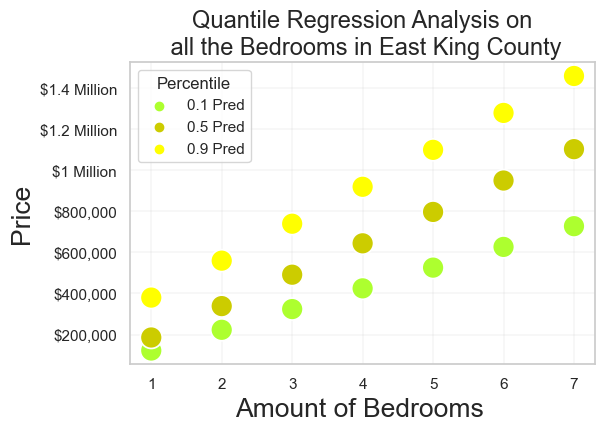

In [45]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
#plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Million'])

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3922145865.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Million'])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '')]

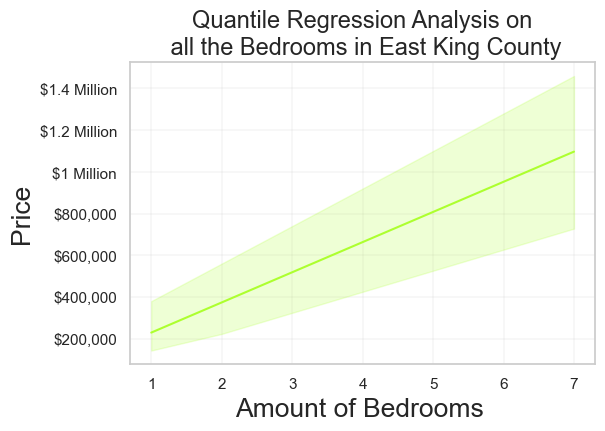

In [46]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.lineplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',color="#ADFF2F")
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
#plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Million'])

In [557]:
(Quantile_regression['Price'] > Quantile_regression['0.1 Pred']).value_counts()

True     2209
False     246
dtype: int64

In [558]:
i = 0
y= 0
x = []
while i <  246:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 2209:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.1 Model\n 10% Accuracy ')

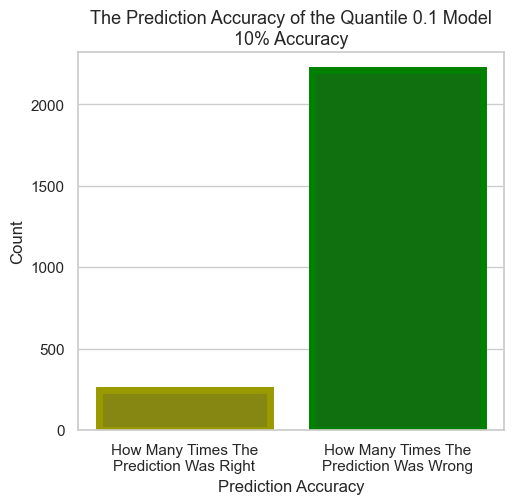

In [560]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.1 Model\n 10% Accuracy ',size=13)

In [562]:
(Quantile_regression['Price'] > Quantile_regression['0.5 Pred']).value_counts()

True     1228
False    1227
dtype: int64

In [563]:
i = 0
y= 0
x = []
while i <  1227:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1228:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.5 Model\n 50% Accuracy ')

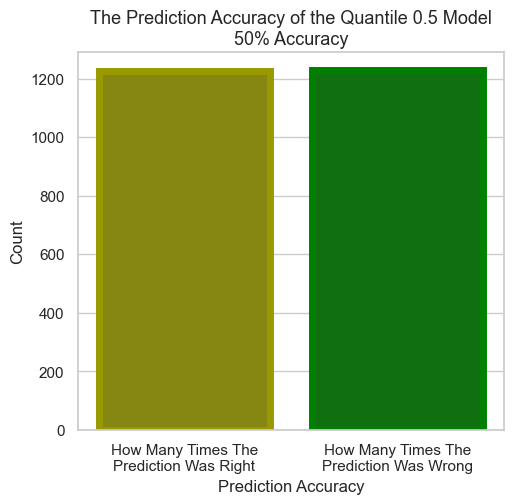

In [564]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.5 Model\n 50% Accuracy ',size=13)

In [565]:
(Quantile_regression['Price'] > Quantile_regression['0.9 Pred']).value_counts()

False    2210
True      245
dtype: int64

In [566]:
i = 0
y= 0
x = []
while i <  2210:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 245:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.9 Model\n 90% Accuracy ')

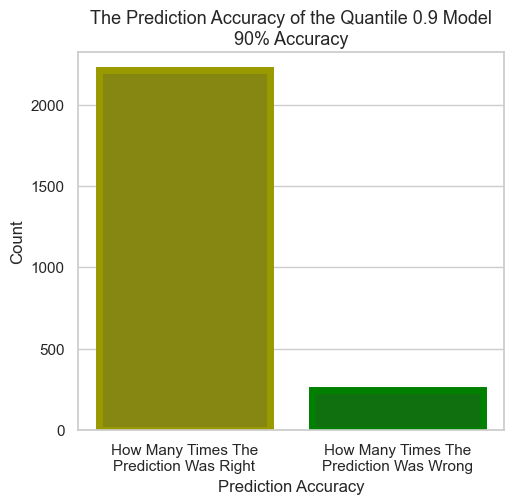

In [568]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.9 Model\n 90% Accuracy ',size=13)

In [570]:
from sklearn.linear_model import Ridge
model4 = Ridge(alpha=1.0)
model4.fit(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
preds_4 = model4.predict(regressiondata1[['Amount_of_Bedrooms']])

In [571]:
model_fit4 = regressiondata1
model_fit4['preds'] = preds_4

In [572]:
model_fit4

Amount_of_Bedrooms     Price         preds
0                      3  510000.0  5.271656e+05
1                      3  400000.0  5.271656e+05
2                      3  395000.0  5.271656e+05
3                      3  580500.0  5.271656e+05
4                      3  488000.0  5.271656e+05
...                  ...       ...           ...
2450                   1  550000.0  2.298238e+05
2451                   1  283700.0  2.298238e+05
2452                   7  600000.0  1.121849e+06
2453                   7  936000.0  1.121849e+06
2454                   7  840000.0  1.121849e+06

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2635349493.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])


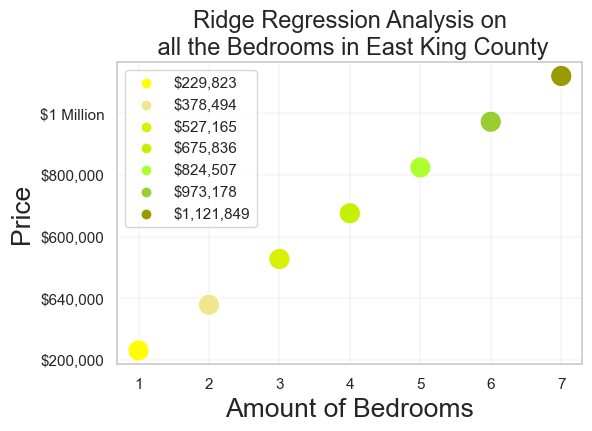

In [163]:
x = model_fit4['Amount_of_Bedrooms']
y = model_fit4['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit4, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
L.get_texts()[0].set_text('$229,823')
L.get_texts()[1].set_text('$378,494')
L.get_texts()[2].set_text('$527,165')
L.get_texts()[3].set_text('$675,836')
L.get_texts()[4].set_text('$824,507')
L.get_texts()[5].set_text('$973,178')
L.get_texts()[6].set_text('$1,121,849')

#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3886195883.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])


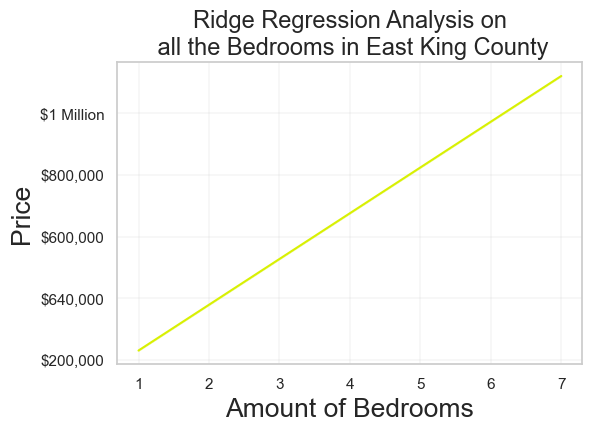

In [121]:
x = model_fit4['Amount_of_Bedrooms']
y = model_fit4['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit4, x=x, y=y,color='#D8F003')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)

#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

In [573]:
(model_fit4['Price'] > model_fit4['preds']).value_counts()

False    1438
True     1017
dtype: int64

In [574]:
i = 0
y= 0
x = []
while i <  1438:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1017:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Ridge Model\n 60% Accuracy ')

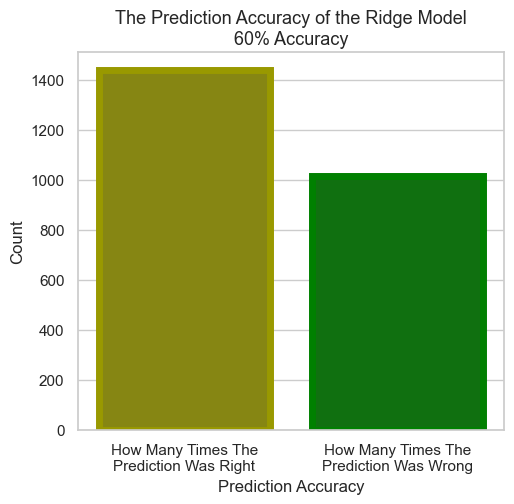

In [575]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Ridge Model\n 60% Accuracy ',size=13)

In [409]:
# Creating the DataFrame
models_predictions = pd.DataFrame({"1 Bedroom":['$322,628','$230,259','$121,996',' $185,546',' $379,993','$229,823'], 
                   "2 Bedrooms":['$410,884','$378,757','$223,000',' $338,530',' $559,998','$378,494'], 
                   "3 Bedrooms":['$523,283','$527,254','$324,004',' $491,513',' $740,003','$527,165'], 
                   "4 Bedrooms":['$666,429', '$675,751','$425,008',' $644,497',' $920,007','$675,836'],
                   "5 Bedrooms":['$848,733', '$824,249','$526,012',' $797,480',' $1,100,013','$824,507'], 
                   "6 Bedrooms":['$1,080,906', '$972,746','$627,015',' $950,464',' $1,280,017','$973,178'],
                   "7 Bedrooms":['$1,376,592', '$1,121,244','$728,019',' $1,103,448',' $1,460,022','$1,121,849'
                                ]}) 
  
# Create the index
index_ = ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions.index = index_

In [410]:
models_predictions

1 Bedroom 2 Bedrooms 3 Bedrooms 4 Bedrooms  \
Poisson Regression           $322,628   $410,884   $523,283   $666,429   
Bayesian Linear Regression   $230,259   $378,757   $527,254   $675,751   
Quantile Regression 0.1      $121,996   $223,000   $324,004   $425,008   
Quantile Regression 0.5      $185,546   $338,530   $491,513   $644,497   
Quantile Regression 0.9      $379,993   $559,998   $740,003   $920,007   
Ridge Regression             $229,823   $378,494   $527,165   $675,836   

                             5 Bedrooms   6 Bedrooms   7 Bedrooms  
Poisson Regression             $848,733   $1,080,906   $1,376,592  
Bayesian Linear Regression     $824,249     $972,746   $1,121,244  
Quantile Regression 0.1        $526,012     $627,015     $728,019  
Quantile Regression 0.5        $797,480     $950,464   $1,103,448  
Quantile Regression 0.9      $1,100,013   $1,280,017   $1,460,022  
Ridge Regression               $824,507     $973,178   $1,121,849

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [336]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [337]:
X,y = regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack = clf_stack.fit(X, y)   # training of stacked model
pred_stack = model_stack.predict(X) 

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for Quant

In [578]:
model_fit5 = regressiondata1
model_fit5['preds'] = pred_stack

In [579]:
model_fit5

Amount_of_Bedrooms     Price     preds
0                      3  510000.0  500000.0
1                      3  400000.0  500000.0
2                      3  395000.0  500000.0
3                      3  580500.0  500000.0
4                      3  488000.0  500000.0
...                  ...       ...       ...
2450                   1  550000.0  170000.0
2451                   1  283700.0  170000.0
2452                   7  600000.0  936000.0
2453                   7  936000.0  936000.0
2454                   7  840000.0  936000.0

[2455 rows x 3 columns]

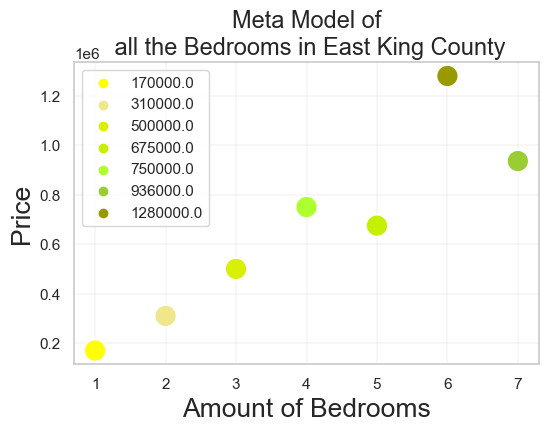

In [341]:
x = model_fit5['Amount_of_Bedrooms']
y = model_fit5['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit4, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

#plt.gcf().set_size_inches((10,10))
#ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3761012886.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])


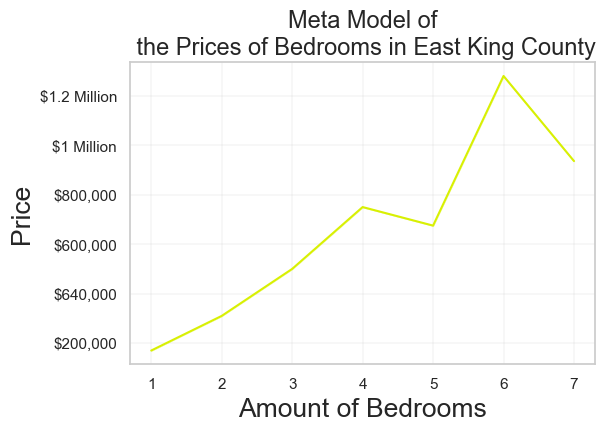

In [343]:
x = model_fit5['Amount_of_Bedrooms']
y = model_fit5['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit4, x=x, y=y,color='#D8F003')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)

#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

In [411]:
meta_model1 = models_predictions

In [412]:
meta_model1.loc[len(meta_model1.index)] = ['$170,00', '$310,000', '$500,000', 
                            '$675,000', '$750,000', '$936,000', '$1,280,000']
meta_model1 = meta_model1.rename(index={6: 'Final Prediction'})

In [413]:
meta_model1

1 Bedroom 2 Bedrooms 3 Bedrooms 4 Bedrooms  \
Poisson Regression           $322,628   $410,884   $523,283   $666,429   
Bayesian Linear Regression   $230,259   $378,757   $527,254   $675,751   
Quantile Regression 0.1      $121,996   $223,000   $324,004   $425,008   
Quantile Regression 0.5      $185,546   $338,530   $491,513   $644,497   
Quantile Regression 0.9      $379,993   $559,998   $740,003   $920,007   
Ridge Regression             $229,823   $378,494   $527,165   $675,836   
Final Prediction              $170,00   $310,000   $500,000   $675,000   

                             5 Bedrooms   6 Bedrooms   7 Bedrooms  
Poisson Regression             $848,733   $1,080,906   $1,376,592  
Bayesian Linear Regression     $824,249     $972,746   $1,121,244  
Quantile Regression 0.1        $526,012     $627,015     $728,019  
Quantile Regression 0.5        $797,480     $950,464   $1,103,448  
Quantile Regression 0.9      $1,100,013   $1,280,017   $1,460,022  
Ridge Regression               $824,507     $973,178   $1,121,849  
Final Prediction               $750,000     $936,000   $1,280,000

In [219]:
box_df = meta_model.transpose()
box_df

Poisson Regression Bayesian Linear Regression  \
1 Bedroom            $322,628                   $230,259   
2 Bedrooms           $410,884                   $378,757   
3 Bedrooms           $523,283                   $527,254   
4 Bedrooms           $666,429                   $675,751   
5 Bedrooms           $848,733                   $824,249   
6 Bedrooms         $1,080,906                   $972,746   
7 Bedrooms         $1,376,592                 $1,121,244   

           Quantile Regression 0.1 Quantile Regression 0.5  \
1 Bedroom                 $121,996                $185,546   
2 Bedrooms                $223,000                $338,530   
3 Bedrooms                $324,004                $491,513   
4 Bedrooms                $425,008                $644,497   
5 Bedrooms                $526,012                $797,480   
6 Bedrooms                $627,015                $950,464   
7 Bedrooms                $728,019              $1,103,448   

           Quantile Regression 0.9 Ridge Regression Final Prediction  
1 Bedroom                 $379,993         $229,823          $170,00  
2 Bedrooms                $559,998         $378,494         $310,000  
3 Bedrooms                $740,003         $527,165         $500,000  
4 Bedrooms                $920,007         $675,836         $675,000  
5 Bedrooms              $1,100,013         $824,507         $750,000  
6 Bedrooms              $1,280,017         $973,178         $936,000  
7 Bedrooms              $1,460,022       $1,121,849       $1,280,000

In [284]:
melted_data1 = pd.melt(box_df, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data1 = melted_data1.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [300]:
melted_data1[melted_data1.columns[1:]] = melted_data1[melted_data1.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [301]:
melted_data1

Prediction Model  Prediction
0           Poisson Regression    322628.0
1           Poisson Regression    410884.0
2           Poisson Regression    523283.0
3           Poisson Regression    666429.0
4           Poisson Regression    848733.0
5           Poisson Regression   1080906.0
6           Poisson Regression   1376592.0
7   Bayesian Linear Regression    230259.0
8   Bayesian Linear Regression    378757.0
9   Bayesian Linear Regression    527254.0
10  Bayesian Linear Regression    675751.0
11  Bayesian Linear Regression    824249.0
12  Bayesian Linear Regression    972746.0
13  Bayesian Linear Regression   1121244.0
14     Quantile Regression 0.1    121996.0
15     Quantile Regression 0.1    223000.0
16     Quantile Regression 0.1    324004.0
17     Quantile Regression 0.1    425008.0
18     Quantile Regression 0.1    526012.0
19     Quantile Regression 0.1    627015.0
20     Quantile Regression 0.1    728019.0
21     Quantile Regression 0.5    185546.0
22     Quantile Regression 0.5    338530.0
23     Quantile Regression 0.5    491513.0
24     Quantile Regression 0.5    644497.0
25     Quantile Regression 0.5    797480.0
26     Quantile Regression 0.5    950464.0
27     Quantile Regression 0.5   1103448.0
28     Quantile Regression 0.9    379993.0
29     Quantile Regression 0.9    559998.0
30     Quantile Regression 0.9    740003.0
31     Quantile Regression 0.9    920007.0
32     Quantile Regression 0.9   1100013.0
33     Quantile Regression 0.9   1280017.0
34     Quantile Regression 0.9   1460022.0
35            Ridge Regression    229823.0
36            Ridge Regression    378494.0
37            Ridge Regression    527165.0
38            Ridge Regression    675836.0
39            Ridge Regression    824507.0
40            Ridge Regression    973178.0
41            Ridge Regression   1121849.0
42            Final Prediction     17000.0
43            Final Prediction    310000.0
44            Final Prediction    500000.0
45            Final Prediction    675000.0
46            Final Prediction    750000.0
47            Final Prediction    936000.0
48            Final Prediction   1280000.0

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2565674944.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_yticklabels(ylabels)


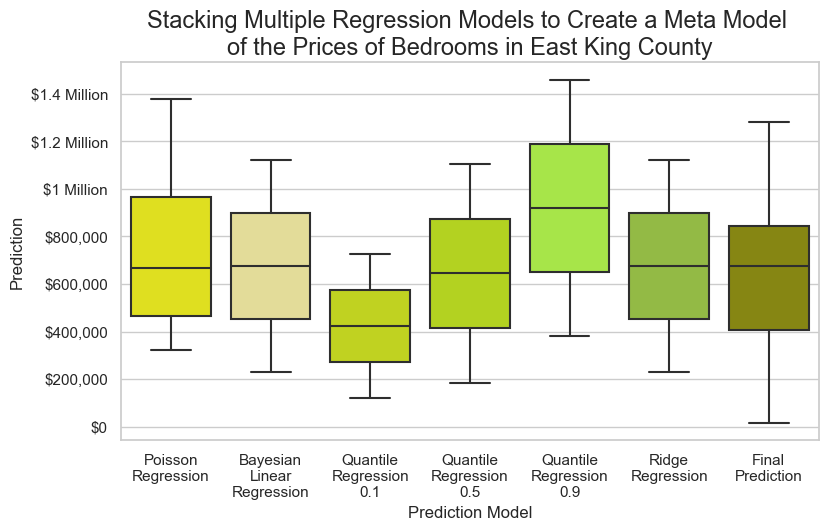

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data1,x='Prediction Model', y='Prediction',
             palette=flatui)#,hue='Prediction Model',width=1.9)
             #hue='Prediction Model')
#x.set_xticklabels(x.get_xticklabels(), rotation=45,horizontalalignment='right')
ylabels = ['0','$0','$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million']
x.set_yticklabels(ylabels)
#x.set_ylabel('0','$0','$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million')
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of Bedrooms in East King County", size=17)
wrap_labels(x, 10)
#x.set_xticklabels(rotation=30)

In [416]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = '' 
    df.iloc[0,:] = 'background-color:#FFFF00;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#F0E68C;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#D8F003;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#C6F003;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#ADFF2F;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#9ACD32;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#999900;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model1 = meta_model1.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #FFFFE0')]},
            {"selector":"thead", 'props':[("background-color","#FFFFE0"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#FFFFE0'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [417]:
import dataframe_image as dfi
#dfi.export(meta_model1, 'meta_model1.png')

In [418]:
meta_model1

In [171]:
%store -r index

In [182]:
%store Quantile_Regression_Prediction
%store Weighted_Average_Prediction

Stored 'Quantile_Regression_Prediction' (DataFrame)
Stored 'Weighted_Average_Prediction' (DataFrame)


In [581]:
def AMOUNT_BATHROOMS(AMOUNT_BATHROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bathrooms"].tolist()
    X_value = []
    bathroom_index = []
    
    
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)

    for i in bathroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BATHROOM)
        
    return X_value
no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
amount_bathrooms_eastking = []
for i in no_of_bathrooms:
    amount_bathrooms_eastking.append(AMOUNT_BATHROOMS(i))
amount_bathrooms_eastking= sum(amount_bathrooms_eastking, [])
len(amount_bathrooms_eastking)

2455

In [582]:
def PRICE_BATHROOM(AMOUNT_BATHROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bath = house_info["Bathrooms"].tolist()

        
    bathroom_index = []
    for i,x in enumerate(amount_bath):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)
    len(bathroom_index)

    bathroom_eastking = []
    for i in bathroom_index:
        if locations[i] == zip_loca[0] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[1] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[2] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[3] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[4]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[5] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[6] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[7]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[8] : bathroom_eastking.append(i)
        
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in bathroom_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
price_bathroom_eastking = []
for i in no_of_bathrooms:
    price_bathroom_eastking.append(PRICE_BATHROOM(i))
price_bathroom_eastking = sum(price_bathroom_eastking, [])
len(price_bathroom_eastking)

2455

In [599]:
regressiondata2 = pd.DataFrame({'Amount_of_Bathrooms':amount_bathrooms_eastking,
                                'Price':price_bathroom_eastking})
k = regressiondata2.Amount_of_Bathrooms.value_counts()
len(k)

22

In [600]:
regressiondata2

Amount_of_Bathrooms      Price
0                    2.50   580500.0
1                    2.50   625000.0
2                    2.50   488000.0
3                    2.50   437500.0
4                    2.50   597750.0
...                   ...        ...
2450                 5.50  1600000.0
2451                 1.25  1250000.0
2452                 6.00  1490000.0
2453                 6.50  1180000.0
2454                 6.50  2240000.0

[2455 rows x 2 columns]

In [601]:
regressiondata2.describe()

Amount_of_Bathrooms         Price
count          2455.000000  2.455000e+03
mean              2.465682  6.033481e+05
std               0.703364  2.747017e+05
min               0.750000  8.000000e+04
25%               2.250000  4.350000e+05
50%               2.500000  5.600000e+05
75%               2.750000  7.140000e+05
max               6.500000  3.200000e+06

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2011722492.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million','$3 Million'])


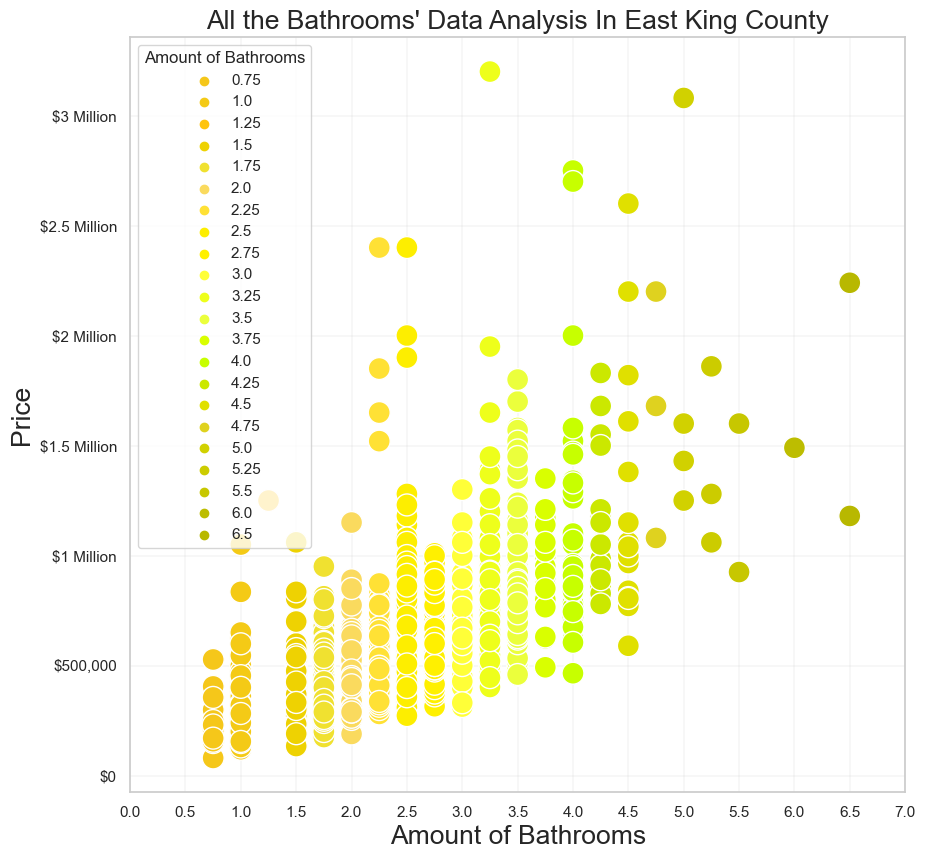

In [626]:
x = regressiondata2['Amount_of_Bathrooms']
y = regressiondata2['Price']
flatui = [
'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
'#e0e000','#dfd21f','#d1d100','#cccc00','#c7c700','#bdbd00',
'#b8b800']#,'#b3b300','#a8a800','#949400']



plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata2, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Bathrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bathrooms\' Data Analysis In East King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.legend(title='Amount of Bathrooms')
plt.ylabel("Price", size=19)
plt.xticks(np.arange(0,7.5,0.5))
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million','$3 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()

plt.show()

In [863]:
import pandas as pd
from sklearn.linear_model import PoissonRegressor

model6 = PoissonRegressor()

model6.fit(regressiondata2[['Amount_of_Bathrooms']],regressiondata2[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [864]:
x = regressiondata2[['Amount_of_Bathrooms']]
y = regressiondata2[['Price']]
prediction6 = model6.predict(x)

In [865]:
model_fit6 = regressiondata2
model_fit6['preds'] = prediction6

In [866]:
k = model_fit6.Amount_of_Bathrooms.value_counts()
len(k)

22

In [867]:
model_fit6

Amount_of_Bathrooms      Price         preds
0                    2.50   580500.0  5.889610e+05
1                    2.50   625000.0  5.889610e+05
2                    2.50   488000.0  5.889610e+05
3                    2.50   437500.0  5.889610e+05
4                    2.50   597750.0  5.889610e+05
...                   ...        ...           ...
2450                 5.50  1600000.0  1.823158e+06
2451                 1.25  1250000.0  3.678007e+05
2452                 6.00  1490000.0  2.200969e+06
2453                 6.50  1180000.0  2.657073e+06
2454                 6.50  2240000.0  2.657073e+06

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2220392773.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])


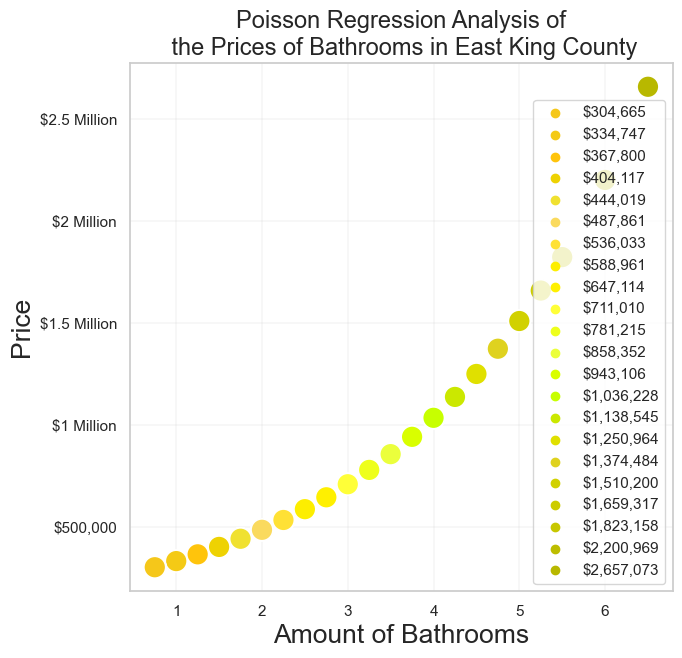

In [624]:
x = model_fit6['Amount_of_Bathrooms']
y = model_fit6['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit6, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
L.get_texts()[0].set_text('$304,665')
L.get_texts()[1].set_text('$334,747')
L.get_texts()[2].set_text('$367,800')
L.get_texts()[3].set_text('$404,117')
L.get_texts()[4].set_text('$444,019')
L.get_texts()[5].set_text('$487,861')
L.get_texts()[6].set_text('$536,033')
L.get_texts()[7].set_text('$588,961')
L.get_texts()[8].set_text('$647,114')
L.get_texts()[9].set_text('$711,010')
L.get_texts()[10].set_text('$781,215')
L.get_texts()[11].set_text('$858,352')
L.get_texts()[12].set_text('$943,106')
L.get_texts()[13].set_text('$1,036,228')
L.get_texts()[14].set_text('$1,138,545')
L.get_texts()[15].set_text('$1,250,964')
L.get_texts()[16].set_text('$1,374,484')
L.get_texts()[17].set_text('$1,510,200')
L.get_texts()[18].set_text('$1,659,317')
L.get_texts()[19].set_text('$1,823,158')
L.get_texts()[20].set_text('$2,200,969')
L.get_texts()[21].set_text('$2,657,073')

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3140636638.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])


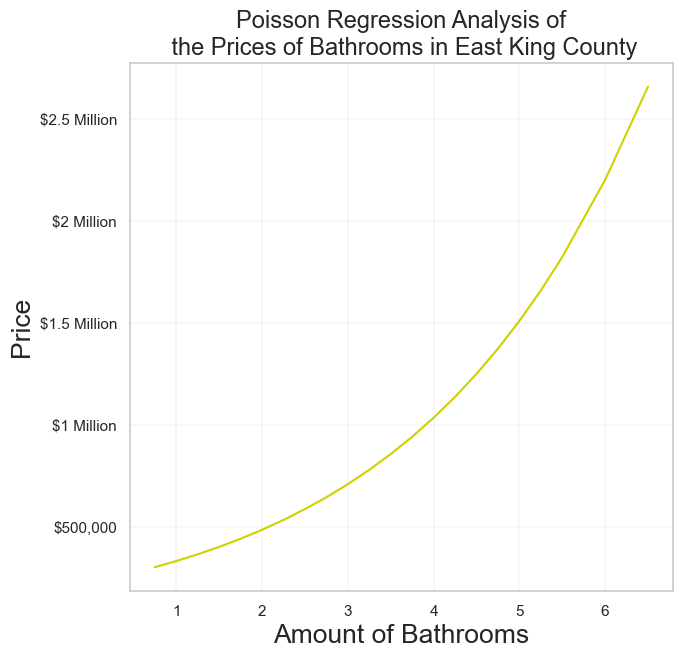

In [627]:
x = model_fit6['Amount_of_Bathrooms']
y = model_fit6['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit6, x=x, y=y,color='#d1d100')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])
plt.show()

In [859]:
# Creating and training model
model7 = BayesianRidge()
model7.fit(regressiondata2[['Amount_of_Bathrooms']],regressiondata2[['Price']])
   
# Model making a prediction on test data
prediction = model7.predict(regressiondata2[['Amount_of_Bathrooms']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [860]:
model_fit7 = regressiondata2
model_fit7['preds'] = prediction

In [861]:
model_fit7

Amount_of_Bathrooms      Price         preds
0                    2.50   580500.0  6.118722e+05
1                    2.50   625000.0  6.118722e+05
2                    2.50   488000.0  6.118722e+05
3                    2.50   437500.0  6.118722e+05
4                    2.50   597750.0  6.118722e+05
...                   ...        ...           ...
2450                 5.50  1600000.0  1.357041e+06
2451                 1.25  1250000.0  3.013853e+05
2452                 6.00  1490000.0  1.481236e+06
2453                 6.50  1180000.0  1.605430e+06
2454                 6.50  2240000.0  1.605430e+06

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3364393239.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '$1.6 Million'),
 Text(0, 1800000.0, '$1.8 Million')]

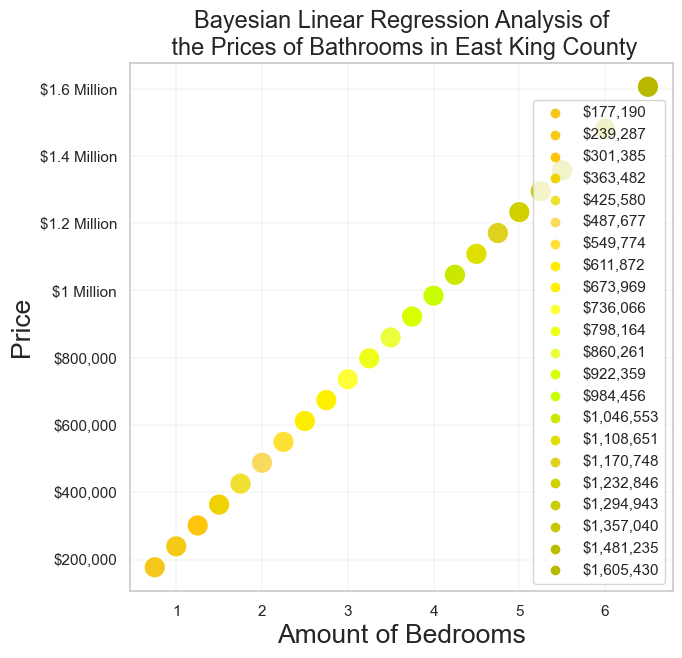

In [634]:
x = model_fit7['Amount_of_Bathrooms']
y = model_fit7['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit7, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L.get_texts()[0].set_text('$177,190')
L.get_texts()[1].set_text('$239,287')
L.get_texts()[2].set_text('$301,385')
L.get_texts()[3].set_text('$363,482')
L.get_texts()[4].set_text('$425,580')
L.get_texts()[5].set_text('$487,677')
L.get_texts()[6].set_text('$549,774')
L.get_texts()[7].set_text('$611,872')
L.get_texts()[8].set_text('$673,969')
L.get_texts()[9].set_text('$736,066')
L.get_texts()[10].set_text('$798,164')
L.get_texts()[11].set_text('$860,261')
L.get_texts()[12].set_text('$922,359')
L.get_texts()[13].set_text('$984,456')
L.get_texts()[14].set_text('$1,046,553')
L.get_texts()[15].set_text('$1,108,651')
L.get_texts()[16].set_text('$1,170,748')
L.get_texts()[17].set_text('$1,232,846')
L.get_texts()[18].set_text('$1,294,943')
L.get_texts()[19].set_text('$1,357,040')
L.get_texts()[20].set_text('$1,481,235')
L.get_texts()[21].set_text('$1,605,430')

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                    '$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.8 Million'])

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/1060811594.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '$1.6 Million'),
 Text(0, 1800000.0, '$1.8 Million')]

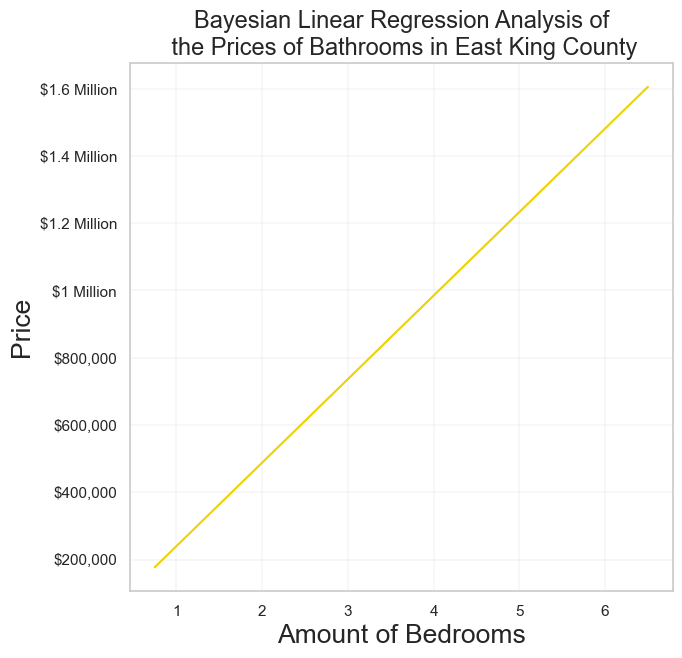

In [636]:
x = model_fit7['Amount_of_Bathrooms']
y = model_fit7['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit7, x=x, y=y,color='#eed202')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                    '$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.8 Million'])

In [638]:
quantile = [0.1, 0.5, 0.9]
X = regressiondata2[['Amount_of_Bathrooms']]
y = regressiondata2[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata2[['Amount_of_Bathrooms']])
y_pred_2 = qrf2.predict(regressiondata2[['Amount_of_Bathrooms']])
y_pred_3 = qrf3.predict(regressiondata2[['Amount_of_Bathrooms']])


C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packa

In [639]:
Quantile_regression1 = pd.DataFrame({'Amount_of_Bathrooms': regressiondata2['Amount_of_Bathrooms'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata2['Price']})

In [642]:
Quantile_regression1

Amount_of_Bathrooms      0.1 Pred      0.5 Pred      0.9 Pred      Price
0                    2.50  4.130998e+05  5.799936e+05  8.249994e+05   580500.0
1                    2.50  4.130998e+05  5.799936e+05  8.249994e+05   625000.0
2                    2.50  4.130998e+05  5.799936e+05  8.249994e+05   488000.0
3                    2.50  4.130998e+05  5.799936e+05  8.249994e+05   437500.0
4                    2.50  4.130998e+05  5.799936e+05  8.249994e+05   597750.0
...                   ...           ...           ...           ...        ...
2450                 5.50  9.306994e+05  1.220124e+06  1.726716e+06  1600000.0
2451                 1.25  1.974333e+05  3.132727e+05  4.492840e+05  1250000.0
2452                 6.00  1.016966e+06  1.326812e+06  1.877002e+06  1490000.0
2453                 6.50  1.103233e+06  1.433500e+06  2.027289e+06  1180000.0
2454                 6.50  1.103233e+06  1.433500e+06  2.027289e+06  2240000.0

[2455 rows x 5 columns]

In [670]:
for x,i in enumerate(Quantile_regression1.Amount_of_Bathrooms):
    if i ==6.5:
        print(x,i)

2453 6.5
2454 6.5


In [856]:
Quantileregression_updated1= Quantile_regression1.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
Quantileregression_updated1 = Quantileregression_updated1.drop('Price', axis=1)
Quantileregression_updated1

Amount_of_Bathrooms      0.1 Pred      0.5 Pred      0.9 Pred
2428                 0.75  1.111667e+05  2.065843e+05  2.989979e+05
1165                 1.00  1.543000e+05  2.599285e+05  3.741409e+05
2451                 1.25  1.974333e+05  3.132727e+05  4.492840e+05
1822                 1.50  2.405666e+05  3.666168e+05  5.244271e+05
1380                 1.75  2.836999e+05  4.199610e+05  5.995702e+05
1760                 2.00  3.268332e+05  4.733052e+05  6.747133e+05
1624                 2.25  3.699665e+05  5.266494e+05  7.498563e+05
0                    2.50  4.130998e+05  5.799936e+05  8.249994e+05
1823                 2.75  4.562331e+05  6.333377e+05  9.001425e+05
1997                 3.00  4.993664e+05  6.866819e+05  9.752856e+05
2218                 3.25  5.424997e+05  7.400261e+05  1.050429e+06
2065                 3.50  5.856330e+05  7.933703e+05  1.125572e+06
2330                 3.75  6.287663e+05  8.467144e+05  1.200715e+06
2358                 4.00  6.718996e+05  9.000586e+05  1.275858e+06
2412                 4.25  7.150329e+05  9.534028e+05  1.351001e+06
2393                 4.50  7.581662e+05  1.006747e+06  1.426144e+06
2439                 4.75  8.012995e+05  1.060091e+06  1.501287e+06
2442                 5.00  8.444328e+05  1.113435e+06  1.576430e+06
2446                 5.25  8.875661e+05  1.166780e+06  1.651573e+06
2449                 5.50  9.306994e+05  1.220124e+06  1.726716e+06
2452                 6.00  1.016966e+06  1.326812e+06  1.877002e+06
2453                 6.50  1.103233e+06  1.433500e+06  2.027289e+06

In [672]:
melted_data1 = pd.melt(Quantileregression_updated1, id_vars=['Amount_of_Bathrooms'])
melted_data1 = melted_data1.dropna()
melted_data1 = melted_data1.rename(columns={'variable': 'Percentile'})
melted_data1

Amount_of_Bathrooms Percentile         value
0                  0.75   0.1 Pred  1.111667e+05
1                  1.00   0.1 Pred  1.543000e+05
2                  1.25   0.1 Pred  1.974333e+05
3                  1.50   0.1 Pred  2.405666e+05
4                  1.75   0.1 Pred  2.836999e+05
..                  ...        ...           ...
61                 5.00   0.9 Pred  1.576430e+06
62                 5.25   0.9 Pred  1.651573e+06
63                 5.50   0.9 Pred  1.726716e+06
64                 6.00   0.9 Pred  1.877002e+06
65                 6.50   0.9 Pred  2.027289e+06

[66 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2647707967.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 250000.0, '$250,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 750000.0, '$750,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1250000.0, '$1.25 Million'),
 Text(0, 1500000.0, '$1.5 Million'),
 Text(0, 1750000.0, '$1.75 Million'),
 Text(0, 2000000.0, '$2 Million'),
 Text(0, 2250000.0, '')]

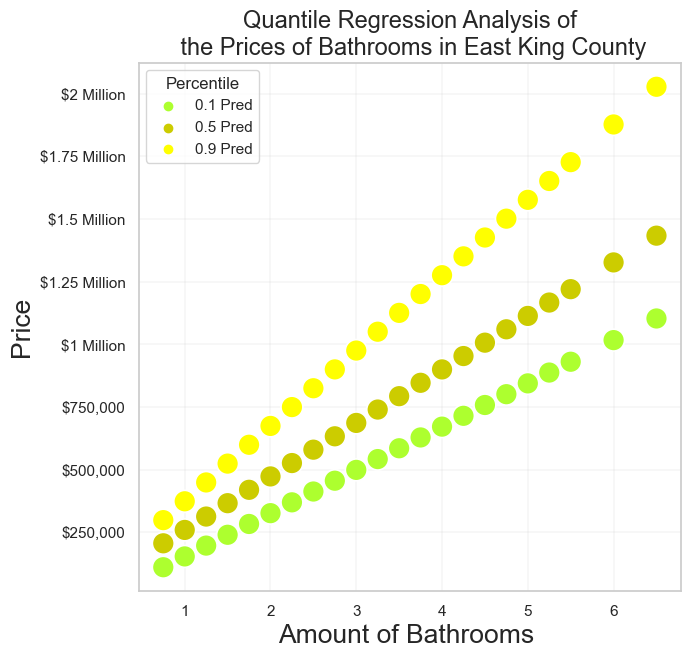

In [686]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data1, x="Amount_of_Bathrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million', 
                     '$1.25 Million','$1.5 Million', '$1.75 Million' ,'$2 Million'])

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2901836505.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 250000.0, '$250,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 750000.0, '$750,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1250000.0, '$1.25 Million'),
 Text(0, 1500000.0, '$1.5 Million'),
 Text(0, 1750000.0, '$1.75 Million'),
 Text(0, 2000000.0, '$2 Million'),
 Text(0, 2250000.0, '')]

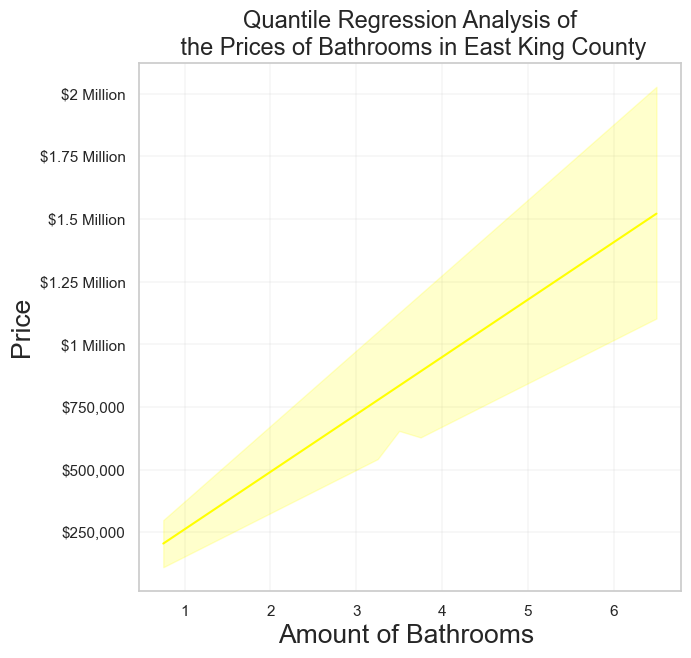

In [690]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=melted_data1, x="Amount_of_Bathrooms", 
                     y='value',color="yellow")
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million', 
                     '$1.25 Million','$1.5 Million', '$1.75 Million' ,'$2 Million'])

In [852]:
model8 = Ridge(alpha=1.0)
model8.fit(regressiondata2[['Amount_of_Bathrooms']],regressiondata2[['Price']])
preds_8 = model8.predict(regressiondata2[['Amount_of_Bathrooms']])

In [853]:
model_fit8 = regressiondata2
model_fit8['preds'] = preds_8

In [854]:
model_fit8

Amount_of_Bathrooms      Price         preds
0                    2.50   580500.0  6.118703e+05
1                    2.50   625000.0  6.118703e+05
2                    2.50   488000.0  6.118703e+05
3                    2.50   437500.0  6.118703e+05
4                    2.50   597750.0  6.118703e+05
...                   ...        ...           ...
2450                 5.50  1600000.0  1.356872e+06
2451                 1.25  1250000.0  3.014531e+05
2452                 6.00  1490000.0  1.481039e+06
2453                 6.50  1180000.0  1.605205e+06
2454                 6.50  2240000.0  1.605205e+06

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3178888407.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',


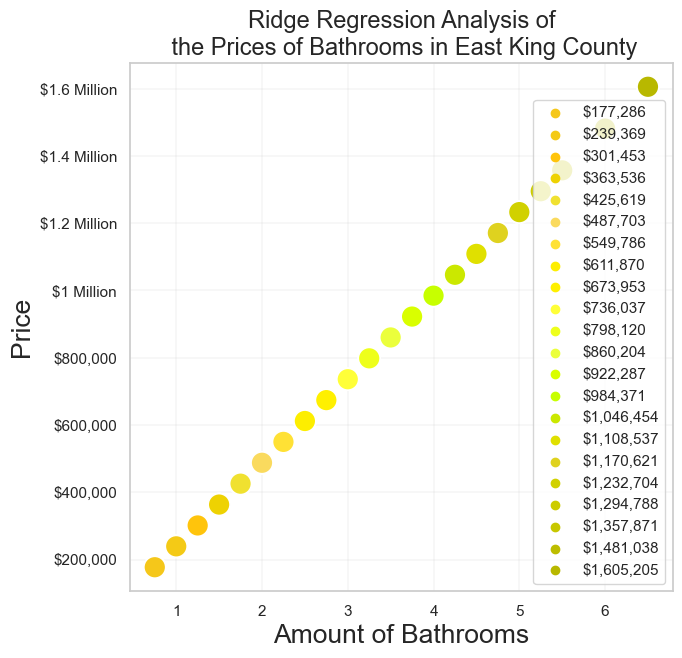

In [699]:
x = model_fit8['Amount_of_Bathrooms']
y = model_fit8['preds']
sns.set(style='whitegrid')
flatui = [
'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
'#e0e000','#dfd21f','#d1d100','#cccc00','#c7c700','#bdbd00',
'#b8b800']#,'#b3b300','#a8a800','#949400']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit8, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
L.get_texts()[0].set_text('$177,286')
L.get_texts()[1].set_text('$239,369')
L.get_texts()[2].set_text('$301,453')
L.get_texts()[3].set_text('$363,536')
L.get_texts()[4].set_text('$425,619')
L.get_texts()[5].set_text('$487,703')
L.get_texts()[6].set_text('$549,786')
L.get_texts()[7].set_text('$611,870')
L.get_texts()[8].set_text('$673,953')
L.get_texts()[9].set_text('$736,037')
L.get_texts()[10].set_text('$798,120')
L.get_texts()[11].set_text('$860,204')
L.get_texts()[12].set_text('$922,287')
L.get_texts()[13].set_text('$984,371')
L.get_texts()[14].set_text('$1,046,454')
L.get_texts()[15].set_text('$1,108,537')
L.get_texts()[16].set_text('$1,170,621')
L.get_texts()[17].set_text('$1,232,704')
L.get_texts()[18].set_text('$1,294,788')
L.get_texts()[19].set_text('$1,357,871')
L.get_texts()[20].set_text('$1,481,038')
L.get_texts()[21].set_text('$1,605,205')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', 
                     '$1.2 Million','$1.4 Million', '$1.6 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/1260783096.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',


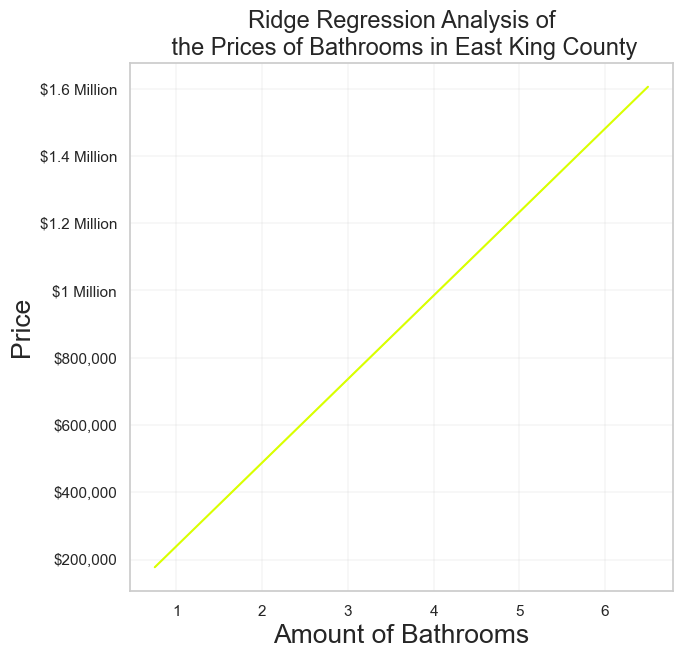

In [689]:
x = model_fit8['Amount_of_Bathrooms']
y = model_fit8['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit8, x=x, y=y,color='#d9ff00')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', 
                     '$1.2 Million','$1.4 Million', '$1.6 Million'])
plt.show()

In [868]:
pos_var = model_fit6.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
pos_var = pos_var.drop('Price', axis=1)
pos_var[pos_var.columns[1]] = ['${:,.0f}'.format(i) for i in pos_var.preds]
pos_var

Amount_of_Bathrooms       preds
2428                 0.75    $304,665
1165                 1.00    $334,748
2451                 1.25    $367,801
1822                 1.50    $404,117
1380                 1.75    $444,020
1760                 2.00    $487,862
1624                 2.25    $536,033
0                    2.50    $588,961
1823                 2.75    $647,115
1997                 3.00    $711,011
2218                 3.25    $781,216
2065                 3.50    $858,353
2330                 3.75    $943,106
2358                 4.00  $1,036,228
2412                 4.25  $1,138,545
2393                 4.50  $1,250,965
2439                 4.75  $1,374,485
2442                 5.00  $1,510,201
2446                 5.25  $1,659,318
2449                 5.50  $1,823,158
2452                 6.00  $2,200,969
2453                 6.50  $2,657,073

In [862]:
bay_var = model_fit7.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

Amount_of_Bathrooms       preds
2428                 0.75    $177,191
1165                 1.00    $239,288
2451                 1.25    $301,385
1822                 1.50    $363,483
1380                 1.75    $425,580
1760                 2.00    $487,677
1624                 2.25    $549,775
0                    2.50    $611,872
1823                 2.75    $673,970
1997                 3.00    $736,067
2218                 3.25    $798,164
2065                 3.50    $860,262
2330                 3.75    $922,359
2358                 4.00    $984,457
2412                 4.25  $1,046,554
2393                 4.50  $1,108,651
2439                 4.75  $1,170,749
2442                 5.00  $1,232,846
2446                 5.25  $1,294,943
2449                 5.50  $1,357,041
2452                 6.00  $1,481,236
2453                 6.50  $1,605,430

In [857]:
Quantileregression_updated1[Quantileregression_updated1.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated1['0.1 Pred']]
Quantileregression_updated1[Quantileregression_updated1.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated1['0.5 Pred']]
Quantileregression_updated1[Quantileregression_updated1.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated1['0.9 Pred']]
Quantileregression_updated1

Amount_of_Bathrooms    0.1 Pred    0.5 Pred    0.9 Pred
2428                 0.75    $111,167    $206,584    $298,998
1165                 1.00    $154,300    $259,928    $374,141
2451                 1.25    $197,433    $313,273    $449,284
1822                 1.50    $240,567    $366,617    $524,427
1380                 1.75    $283,700    $419,961    $599,570
1760                 2.00    $326,833    $473,305    $674,713
1624                 2.25    $369,966    $526,649    $749,856
0                    2.50    $413,100    $579,994    $824,999
1823                 2.75    $456,233    $633,338    $900,142
1997                 3.00    $499,366    $686,682    $975,286
2218                 3.25    $542,500    $740,026  $1,050,429
2065                 3.50    $585,633    $793,370  $1,125,572
2330                 3.75    $628,766    $846,714  $1,200,715
2358                 4.00    $671,900    $900,059  $1,275,858
2412                 4.25    $715,033    $953,403  $1,351,001
2393                 4.50    $758,166  $1,006,747  $1,426,144
2439                 4.75    $801,299  $1,060,091  $1,501,287
2442                 5.00    $844,433  $1,113,435  $1,576,430
2446                 5.25    $887,566  $1,166,780  $1,651,573
2449                 5.50    $930,699  $1,220,124  $1,726,716
2452                 6.00  $1,016,966  $1,326,812  $1,877,002
2453                 6.50  $1,103,233  $1,433,500  $2,027,289

In [858]:
rid_var = model_fit8.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
rid_var = rid_var.drop('Price', axis=1)
rid_var[rid_var.columns[1]] = ['${:,.0f}'.format(i) for i in rid_var.preds]
rid_var

Amount_of_Bathrooms       preds
2428                 0.75    $177,286
1165                 1.00    $239,370
2451                 1.25    $301,453
1822                 1.50    $363,537
1380                 1.75    $425,620
1760                 2.00    $487,703
1624                 2.25    $549,787
0                    2.50    $611,870
1823                 2.75    $673,954
1997                 3.00    $736,037
2218                 3.25    $798,121
2065                 3.50    $860,204
2330                 3.75    $922,288
2358                 4.00    $984,371
2412                 4.25  $1,046,454
2393                 4.50  $1,108,538
2439                 4.75  $1,170,621
2442                 5.00  $1,232,705
2446                 5.25  $1,294,788
2449                 5.50  $1,356,872
2452                 6.00  $1,481,039
2453                 6.50  $1,605,205

In [869]:
bath = [0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,6,6.5]
index = [2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,1823, 1997, 2218, 2065, 2330, 2358, 2412, 
         2393, 2439, 2442, 2446, 2449, 2452, 2453]
for x,i in enumerate(index):
    print('"',bath[x],'Bathrooms":[','"',pos_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated1['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated1['0.5 Pred'][i],'"',',',
          '"',Quantileregression_updated1['0.9 Pred'][i],'"',',','"',rid_var.preds[i],'"','],')

" 0.75 Bathrooms":[ " $304,665 " , " $177,191 " , " $111,167 " , " $206,584 " , " $298,998 " , " $177,286 " ],
" 1 Bathrooms":[ " $334,748 " , " $239,288 " , " $154,300 " , " $259,928 " , " $374,141 " , " $239,370 " ],
" 1.25 Bathrooms":[ " $367,801 " , " $301,385 " , " $197,433 " , " $313,273 " , " $449,284 " , " $301,453 " ],
" 1.5 Bathrooms":[ " $404,117 " , " $363,483 " , " $240,567 " , " $366,617 " , " $524,427 " , " $363,537 " ],
" 1.75 Bathrooms":[ " $444,020 " , " $425,580 " , " $283,700 " , " $419,961 " , " $599,570 " , " $425,620 " ],
" 2 Bathrooms":[ " $487,862 " , " $487,677 " , " $326,833 " , " $473,305 " , " $674,713 " , " $487,703 " ],
" 2.25 Bathrooms":[ " $536,033 " , " $549,775 " , " $369,966 " , " $526,649 " , " $749,856 " , " $549,787 " ],
" 2.5 Bathrooms":[ " $588,961 " , " $611,872 " , " $413,100 " , " $579,994 " , " $824,999 " , " $611,870 " ],
" 2.75 Bathrooms":[ " $647,115 " , " $673,970 " , " $456,233 " , " $633,338 " , " $900,142 " , " $673,954 " ],
" 3 Bathr

In [924]:
# Creating the DataFrame
models_predictions1 = pd.DataFrame({" 0.75 Bathrooms":[ " $304,665 " , " $177,191 " , " $111,167 " , " $206,584 " , " $298,998 " , " $177,286 " ],
" 1 Bathrooms":[ " $334,748 " , " $239,288 " , " $154,300 " , " $259,928 " , " $374,141 " , " $239,370 " ],
" 1.25 Bathrooms":[ " $367,801 " , " $301,385 " , " $197,433 " , " $313,273 " , " $449,284 " , " $301,453 " ],
" 1.5 Bathrooms":[ " $404,117 " , " $363,483 " , " $240,567 " , " $366,617 " , " $524,427 " , " $363,537 " ],
" 1.75 Bathrooms":[ " $444,020 " , " $425,580 " , " $283,700 " , " $419,961 " , " $599,570 " , " $425,620 " ],
" 2 Bathrooms":[ " $487,862 " , " $487,677 " , " $326,833 " , " $473,305 " , " $674,713 " , " $487,703 " ],
" 2.25 Bathrooms":[ " $536,033 " , " $549,775 " , " $369,966 " , " $526,649 " , " $749,856 " , " $549,787 " ],
" 2.5 Bathrooms":[ " $588,961 " , " $611,872 " , " $413,100 " , " $579,994 " , " $824,999 " , " $611,870 " ],
" 2.75 Bathrooms":[ " $647,115 " , " $673,970 " , " $456,233 " , " $633,338 " , " $900,142 " , " $673,954 " ],
" 3 Bathrooms":[ " $711,011 " , " $736,067 " , " $499,366 " , " $686,682 " , " $975,286 " , " $736,037 " ],
" 3.25 Bathrooms":[ " $781,216 " , " $798,164 " , " $542,500 " , " $740,026 " , " $1,050,429 " , " $798,121 " ],
" 3.5 Bathrooms":[ " $858,353 " , " $860,262 " , " $585,633 " , " $793,370 " , " $1,125,572 " , " $860,204 " ],
" 3.75 Bathrooms":[ " $943,106 " , " $922,359 " , " $628,766 " , " $846,714 " , " $1,200,715 " , " $922,288 " ],
" 4 Bathrooms":[ " $1,036,228 " , " $984,457 " , " $671,900 " , " $900,059 " , " $1,275,858 " , " $984,371 " ],
" 4.25 Bathrooms":[ " $1,138,545 " , " $1,046,554 " , " $715,033 " , " $953,403 " , " $1,351,001 " , " $1,046,454 " ],
" 4.5 Bathrooms":[ " $1,250,965 " , " $1,108,651 " , " $758,166 " , " $1,006,747 " , " $1,426,144 " , " $1,108,538 " ],
" 4.75 Bathrooms":[ " $1,374,485 " , " $1,170,749 " , " $801,299 " , " $1,060,091 " , " $1,501,287 " , " $1,170,621 " ],
" 5 Bathrooms":[ " $1,510,201 " , " $1,232,846 " , " $844,433 " , " $1,113,435 " , " $1,576,430 " , " $1,232,705 " ],
" 5.25 Bathrooms":[ " $1,659,318 " , " $1,294,943 " , " $887,566 " , " $1,166,780 " , " $1,651,573 " , " $1,294,788 " ],
" 5.5 Bathrooms":[ " $1,823,158 " , " $1,357,041 " , " $930,699 " , " $1,220,124 " , " $1,726,716 " , " $1,356,872 " ],
" 6 Bathrooms":[ " $2,200,969 " , " $1,481,236 " , " $1,016,966 " , " $1,326,812 " , " $1,877,002 " , " $1,481,039 " ],
" 6.5 Bathrooms":[ " $2,657,073 " , " $1,605,430 " , " $1,103,233 " , " $1,433,500 " , " $2,027,289 " , " $1,605,205 " ]})
# Create the index
index_ = ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions1.index = index_

In [925]:
models_predictions1

0.75 Bathrooms  1 Bathrooms  1.25 Bathrooms  \
Poisson Regression               $304,665     $334,748        $367,801    
Bayesian Linear Regression       $177,191     $239,288        $301,385    
Quantile Regression 0.1          $111,167     $154,300        $197,433    
Quantile Regression 0.5          $206,584     $259,928        $313,273    
Quantile Regression 0.9          $298,998     $374,141        $449,284    
Ridge Regression                 $177,286     $239,370        $301,453    

                            1.5 Bathrooms  1.75 Bathrooms  2 Bathrooms  \
Poisson Regression              $404,117        $444,020     $487,862    
Bayesian Linear Regression      $363,483        $425,580     $487,677    
Quantile Regression 0.1         $240,567        $283,700     $326,833    
Quantile Regression 0.5         $366,617        $419,961     $473,305    
Quantile Regression 0.9         $524,427        $599,570     $674,713    
Ridge Regression                $363,537        $425,620     $487,703    

                            2.25 Bathrooms  2.5 Bathrooms  2.75 Bathrooms  \
Poisson Regression               $536,033       $588,961        $647,115    
Bayesian Linear Regression       $549,775       $611,872        $673,970    
Quantile Regression 0.1          $369,966       $413,100        $456,233    
Quantile Regression 0.5          $526,649       $579,994        $633,338    
Quantile Regression 0.9          $749,856       $824,999        $900,142    
Ridge Regression                 $549,787       $611,870        $673,954    

                            3 Bathrooms  ...  3.75 Bathrooms   4 Bathrooms  \
Poisson Regression            $711,011   ...       $943,106    $1,036,228    
Bayesian Linear Regression    $736,067   ...       $922,359      $984,457    
Quantile Regression 0.1       $499,366   ...       $628,766      $671,900    
Quantile Regression 0.5       $686,682   ...       $846,714      $900,059    
Quantile Regression 0.9       $975,286   ...     $1,200,715    $1,275,858    
Ridge Regression              $736,037   ...       $922,288      $984,371    

                            4.25 Bathrooms  4.5 Bathrooms  4.75 Bathrooms  \
Poisson Regression             $1,138,545     $1,250,965      $1,374,485    
Bayesian Linear Regression     $1,046,554     $1,108,651      $1,170,749    
Quantile Regression 0.1          $715,033       $758,166        $801,299    
Quantile Regression 0.5          $953,403     $1,006,747      $1,060,091    
Quantile Regression 0.9        $1,351,001     $1,426,144      $1,501,287    
Ridge Regression               $1,046,454     $1,108,538      $1,170,621    

                             5 Bathrooms  5.25 Bathrooms  5.5 Bathrooms  \
Poisson Regression           $1,510,201      $1,659,318     $1,823,158    
Bayesian Linear Regression   $1,232,846      $1,294,943     $1,357,041    
Quantile Regression 0.1        $844,433        $887,566       $930,699    
Quantile Regression 0.5      $1,113,435      $1,166,780     $1,220,124    
Quantile Regression 0.9      $1,576,430      $1,651,573     $1,726,716    
Ridge Regression             $1,232,705      $1,294,788     $1,356,872    

                             6 Bathrooms  6.5 Bathrooms  
Poisson Regression           $2,200,969     $2,657,073   
Bayesian Linear Regression   $1,481,236     $1,605,430   
Quantile Regression 0.1      $1,016,966     $1,103,233   
Quantile Regression 0.5      $1,326,812     $1,433,500   
Quantile Regression 0.9      $1,877,002     $2,027,289   
Ridge Regression             $1,481,039     $1,605,205   

[6 rows x 22 columns]

In [805]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [806]:
X,y = regressiondata2[['Amount_of_Bathrooms']],regressiondata2[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack = clf_stack.fit(X, y)   # training of stacked model
pred_stack = model_stack.predict(X) 

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for Quant

In [832]:
model_fit9 = regressiondata2
model_fit9['preds'] = pred_stack

In [833]:
model_fit9

Amount_of_Bathrooms      Price      preds
0                    2.50   580500.0   550000.0
1                    2.50   625000.0   550000.0
2                    2.50   488000.0   550000.0
3                    2.50   437500.0   550000.0
4                    2.50   597750.0   550000.0
...                   ...        ...        ...
2450                 5.50  1600000.0  1600000.0
2451                 1.25  1250000.0   300000.0
2452                 6.00  1490000.0  1180000.0
2453                 6.50  1180000.0  2240000.0
2454                 6.50  2240000.0  2240000.0

[2455 rows x 3 columns]

In [834]:
meta_var = model_fit9.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
meta_var = meta_var.drop('Price', axis=1)
meta_var[meta_var.columns[1]] = ['${:,.2f}'.format(i) for i in meta_var.preds]
meta_var

Amount_of_Bathrooms          preds
2428                 0.75    $150,000.00
1165                 1.00    $240,000.00
2451                 1.25    $300,000.00
1822                 1.50    $340,000.00
1380                 1.75    $310,000.00
1760                 2.00    $500,000.00
1624                 2.25    $500,000.00
0                    2.50    $550,000.00
1823                 2.75    $750,000.00
1997                 3.00    $695,000.00
2218                 3.25    $695,000.00
2065                 3.50  $1,050,000.00
2330                 3.75  $1,050,000.00
2358                 4.00  $1,050,000.00
2412                 4.25  $1,060,000.00
2393                 4.50  $1,680,000.00
2439                 4.75  $2,200,000.00
2442                 5.00  $1,600,000.00
2446                 5.25  $1,600,000.00
2449                 5.50  $1,600,000.00
2452                 6.00  $1,180,000.00
2453                 6.50  $2,240,000.00

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2626726722.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])


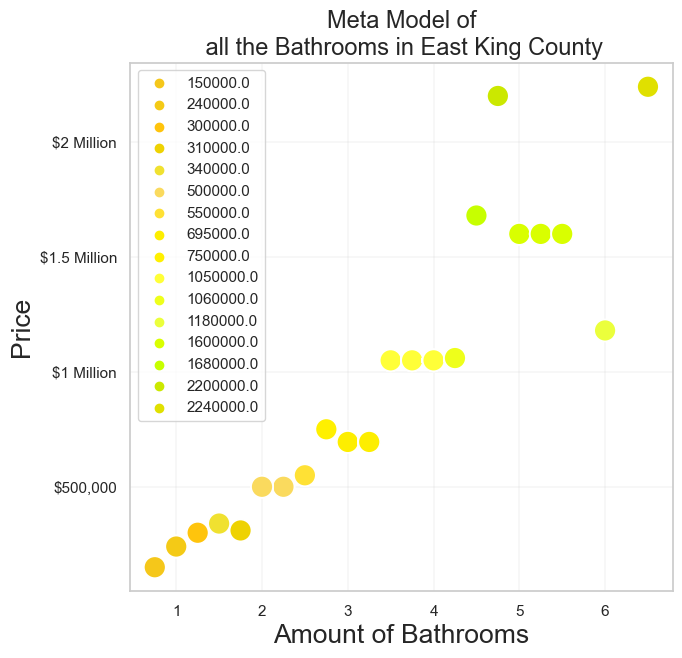

In [825]:
x = model_fit9['Amount_of_Bathrooms']
y = model_fit9['preds']
sns.set(style='whitegrid')

flatui = [
'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
'#e0e000']#,'#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit9, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/84902077.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])


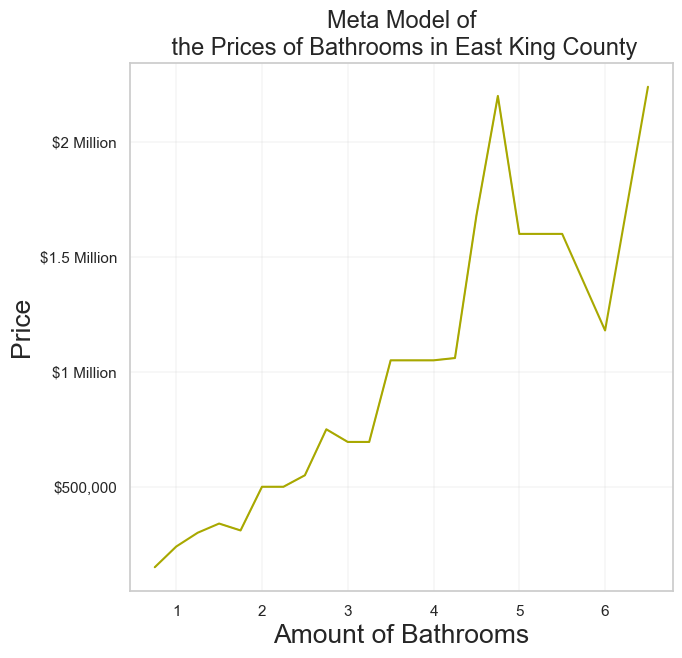

In [829]:
x = model_fit9['Amount_of_Bathrooms']
y = model_fit9['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit9, x=x, y=y,color='#a8a800')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [926]:
meta_model2 = models_predictions1

In [927]:
meta_model2.loc[len(meta_model2.index)] = ['$150,000','$240,000','$300,000','$340,000','$310,000',
                                           '$500,000','$500,000','$550,000','$750,000','$695,000',
                                           '$695,000','$1,050,000','$1,050,000','$1,050,000',
                                           '$1,060,000', '$1,680,000','$2,200,000',
                                           '$1,600,000','$1,600,000',
                                           '$1,600,000','$1,180,000','$2,240,000']
meta_model2 = meta_model2.rename(index={6: 'Final Prediction'})

In [928]:
meta_model2

0.75 Bathrooms  1 Bathrooms  1.25 Bathrooms  \
Poisson Regression               $304,665     $334,748        $367,801    
Bayesian Linear Regression       $177,191     $239,288        $301,385    
Quantile Regression 0.1          $111,167     $154,300        $197,433    
Quantile Regression 0.5          $206,584     $259,928        $313,273    
Quantile Regression 0.9          $298,998     $374,141        $449,284    
Ridge Regression                 $177,286     $239,370        $301,453    
Final Prediction                  $150,000     $240,000        $300,000   

                            1.5 Bathrooms  1.75 Bathrooms  2 Bathrooms  \
Poisson Regression              $404,117        $444,020     $487,862    
Bayesian Linear Regression      $363,483        $425,580     $487,677    
Quantile Regression 0.1         $240,567        $283,700     $326,833    
Quantile Regression 0.5         $366,617        $419,961     $473,305    
Quantile Regression 0.9         $524,427        $599,570     $674,713    
Ridge Regression                $363,537        $425,620     $487,703    
Final Prediction                 $340,000        $310,000     $500,000   

                            2.25 Bathrooms  2.5 Bathrooms  2.75 Bathrooms  \
Poisson Regression               $536,033       $588,961        $647,115    
Bayesian Linear Regression       $549,775       $611,872        $673,970    
Quantile Regression 0.1          $369,966       $413,100        $456,233    
Quantile Regression 0.5          $526,649       $579,994        $633,338    
Quantile Regression 0.9          $749,856       $824,999        $900,142    
Ridge Regression                 $549,787       $611,870        $673,954    
Final Prediction                  $500,000       $550,000        $750,000   

                            3 Bathrooms  ...  3.75 Bathrooms   4 Bathrooms  \
Poisson Regression            $711,011   ...       $943,106    $1,036,228    
Bayesian Linear Regression    $736,067   ...       $922,359      $984,457    
Quantile Regression 0.1       $499,366   ...       $628,766      $671,900    
Quantile Regression 0.5       $686,682   ...       $846,714      $900,059    
Quantile Regression 0.9       $975,286   ...     $1,200,715    $1,275,858    
Ridge Regression              $736,037   ...       $922,288      $984,371    
Final Prediction               $695,000  ...      $1,050,000    $1,050,000   

                            4.25 Bathrooms  4.5 Bathrooms  4.75 Bathrooms  \
Poisson Regression             $1,138,545     $1,250,965      $1,374,485    
Bayesian Linear Regression     $1,046,554     $1,108,651      $1,170,749    
Quantile Regression 0.1          $715,033       $758,166        $801,299    
Quantile Regression 0.5          $953,403     $1,006,747      $1,060,091    
Quantile Regression 0.9        $1,351,001     $1,426,144      $1,501,287    
Ridge Regression               $1,046,454     $1,108,538      $1,170,621    
Final Prediction                $1,060,000     $1,680,000      $2,200,000   

                             5 Bathrooms  5.25 Bathrooms  5.5 Bathrooms  \
Poisson Regression           $1,510,201      $1,659,318     $1,823,158    
Bayesian Linear Regression   $1,232,846      $1,294,943     $1,357,041    
Quantile Regression 0.1        $844,433        $887,566       $930,699    
Quantile Regression 0.5      $1,113,435      $1,166,780     $1,220,124    
Quantile Regression 0.9      $1,576,430      $1,651,573     $1,726,716    
Ridge Regression             $1,232,705      $1,294,788     $1,356,872    
Final Prediction              $1,600,000      $1,600,000     $1,600,000   

                             6 Bathrooms  6.5 Bathrooms  
Poisson Regression           $2,200,969     $2,657,073   
Bayesian Linear Regression   $1,481,236     $1,605,430   
Quantile Regression 0.1      $1,016,966     $1,103,233   
Quantile Regression 0.5      $1,326,812     $1,433,500   
Quantile Regression 0.9      $1,877,002     $2,027,289   
Ridge Regression          

In [888]:
box_df1 = meta_model2.transpose()
box_df1

Poisson Regression Bayesian Linear Regression  \
 0.75 Bathrooms          $304,665                   $177,191    
 1 Bathrooms             $334,748                   $239,288    
 1.25 Bathrooms          $367,801                   $301,385    
 1.5 Bathrooms           $404,117                   $363,483    
 1.75 Bathrooms          $444,020                   $425,580    
 2 Bathrooms             $487,862                   $487,677    
 2.25 Bathrooms          $536,033                   $549,775    
 2.5 Bathrooms           $588,961                   $611,872    
 2.75 Bathrooms          $647,115                   $673,970    
 3 Bathrooms             $711,011                   $736,067    
 3.25 Bathrooms          $781,216                   $798,164    
 3.5 Bathrooms           $858,353                   $860,262    
 3.75 Bathrooms          $943,106                   $922,359    
 4 Bathrooms           $1,036,228                   $984,457    
 4.25 Bathrooms        $1,138,545                 $1,046,554    
 4.5 Bathrooms         $1,250,965                 $1,108,651    
 4.75 Bathrooms        $1,374,485                 $1,170,749    
 5 Bathrooms           $1,510,201                 $1,232,846    
 5.25 Bathrooms        $1,659,318                 $1,294,943    
 5.5 Bathrooms         $1,823,158                 $1,357,041    
 6 Bathrooms           $2,200,969                 $1,481,236    
 6.5 Bathrooms         $2,657,073                 $1,605,430    

                Quantile Regression 0.1 Quantile Regression 0.5  \
 0.75 Bathrooms               $111,167                $206,584    
 1 Bathrooms                  $154,300                $259,928    
 1.25 Bathrooms               $197,433                $313,273    
 1.5 Bathrooms                $240,567                $366,617    
 1.75 Bathrooms               $283,700                $419,961    
 2 Bathrooms                  $326,833                $473,305    
 2.25 Bathrooms               $369,966                $526,649    
 2.5 Bathrooms                $413,100                $579,994    
 2.75 Bathrooms               $456,233                $633,338    
 3 Bathrooms                  $499,366                $686,682    
 3.25 Bathrooms               $542,500                $740,026    
 3.5 Bathrooms                $585,633                $793,370    
 3.75 Bathrooms               $628,766                $846,714    
 4 Bathrooms                  $671,900                $900,059    
 4.25 Bathrooms               $715,033                $953,403    
 4.5 Bathrooms                $758,166              $1,006,747    
 4.75 Bathrooms               $801,299              $1,060,091    
 5 Bathrooms                  $844,433              $1,113,435    
 5.25 Bathrooms               $887,566              $1,166,780    
 5.5 Bathrooms                $930,699              $1,220,124    
 6 Bathrooms                $1,016,966              $1,326,812    
 6.5 Bathrooms              $1,103,233              $1,433,500    

                Quantile Regression 0.9 Ridge Regression Final Prediction  
 0.75 Bathrooms               $298,998         $177,286          $150,000  
 1 Bathrooms                  $374,141         $239,370          $240,000  
 1.25 Bathrooms               $449,284         $301,453          $300,000  
 1.5 Bathrooms                $524,427         $363,537          $340,000  
 1.75 Bathrooms               $599,570         $425,620          $310,000  
 2 Bathrooms                  $674,713         $487,703          $500,000  
 2.25 Bathrooms               $749,856         $549,787          $500,000  
 2.5 Bathrooms                $824,999         $611,870          $550,000  
 2.75 Bathrooms               $900,142         $673,954          $750,000  
 3 Bathrooms                  $975,286         $736,037          $695,000  
 3.25 Bathrooms             $1,050,429         $798,121          $695,000  
 3.5 Bathrooms              $1,125,572         $860,204        $1,

In [929]:
melted_data2 = pd.melt(box_df1, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data2 = melted_data2.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [985]:
melted_data2[melted_data2.columns[1:]] = melted_data2[melted_data2.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [986]:
melted_data2

Prediction Model  Prediction
0    Poisson Regression    304665.0
1    Poisson Regression    334748.0
2    Poisson Regression    367801.0
3    Poisson Regression    404117.0
4    Poisson Regression    444020.0
..                  ...         ...
149    Final Prediction   1600000.0
150    Final Prediction   1600000.0
151    Final Prediction   1600000.0
152    Final Prediction   1180000.0
153    Final Prediction   2240000.0

[154 rows x 2 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/1519345887.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_yticklabels(ylabels)


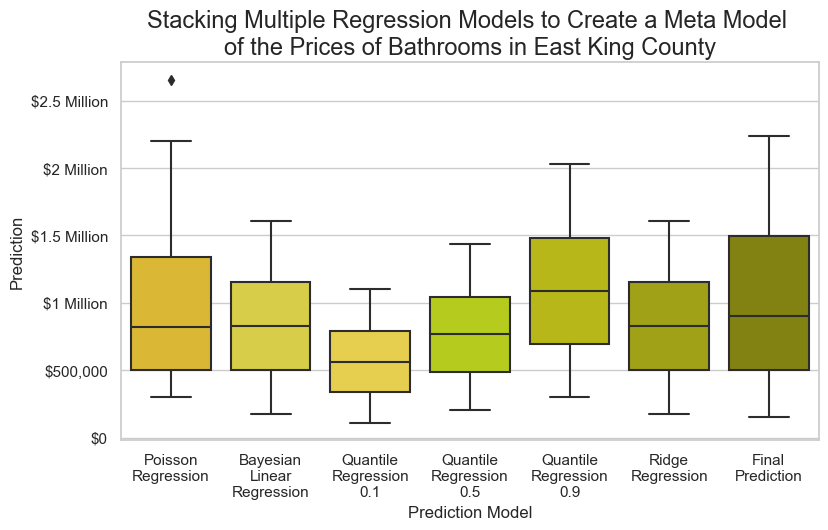

In [989]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
flatui = ['#f5c71a','#f0e130','#ffe135','#cbe800','#d1d100' ,'#b8b800','#949400']
#'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
#'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
#'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
#'#e0e000','#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data2,x='Prediction Model', y='Prediction',palette=flatui)
ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million']
x.set_yticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of Bathrooms in East King County", size=17)
wrap_labels(x, 10)


In [939]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = '' 
    df.iloc[0,:] = 'background-color:#f5c71a;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#d9ff00;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#ffe135;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#cbe800;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#ffc40c;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#CCCC00;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#b8b800;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model2 = meta_model2.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #F1E5AC')]},
            {"selector":"thead", 'props':[("background-color","#F1E5AC"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#F1E5AC'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [940]:
import dataframe_image as dfi
dfi.export(meta_model2, 'meta_model2.png')

In [941]:
meta_model2

In [253]:
%store Quantile_Regression_Prediction1
%store Weighted_Average_Prediction1

Stored 'Quantile_Regression_Prediction1' (DataFrame)
Stored 'Weighted_Average_Prediction1' (DataFrame)


In [10]:
def PRICE_FLOORS(AMOUNT_FLOORS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode

    amount_floors = house_info['Floors'].tolist()

    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
    len(floors_index)
    
    
    floors_eastking = []
    for i in floors_index:
        if locations[i] == zip_loca[0] : floors_eastking.append(i)
        elif locations[i] == zip_loca[1] : floors_eastking.append(i)
        elif locations[i] == zip_loca[2] : floors_eastking.append(i)
        elif locations[i] == zip_loca[3] : floors_eastking.append(i)
        elif locations[i] == zip_loca[4]: floors_eastking.append(i)
        elif locations[i] == zip_loca[5] : floors_eastking.append(i)
        elif locations[i] == zip_loca[6] : floors_eastking.append(i)
        elif locations[i] == zip_loca[7]: floors_eastking.append(i)
        elif locations[i] == zip_loca[8] : floors_eastking.append(i)
        

    price = house_info["Price"].tolist()

    price_eastking = []
    for i in floors_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_floors = house_info["Floors"].value_counts().index.tolist()
price_floors_eastking = []
for i in no_of_floors:
    price_floors_eastking.append(PRICE_FLOORS(i))
price_floors_eastking = sum(price_floors_eastking, [])
len(price_floors_eastking)

2455

In [11]:
def AMOUNT_FLOORS(AMOUNT_FLOORS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode

    amount_floors = house_info["Floors"].tolist()
    X_value = []
    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
            

    
    

    for i in floors_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_FLOORS)
        
    return X_value
no_of_floors = house_info["Floors"].value_counts().index.tolist()
amount_floors_eastking = []
for i in no_of_floors:
    amount_floors_eastking.append(AMOUNT_FLOORS(i))
amount_floors_eastking= sum(amount_floors_eastking, [])
len(amount_floors_eastking)

2455

In [12]:
regressiondata3 = pd.DataFrame({'Amount_of_Floors':amount_floors_eastking,
                                'Price':price_floors_eastking})
#regressiondata3.Amount_of_Floors.value_counts()
regressiondata3

Amount_of_Floors     Price
0                  1.0  510000.0
1                  1.0  400000.0
2                  1.0  660500.0
3                  1.0  420000.0
4                  1.0  592500.0
...                ...       ...
2450               2.5  450000.0
2451               2.5  646800.0
2452               2.5  635000.0
2453               2.5  680000.0
2454               2.5  669950.0

[2455 rows x 2 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/714351756.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',


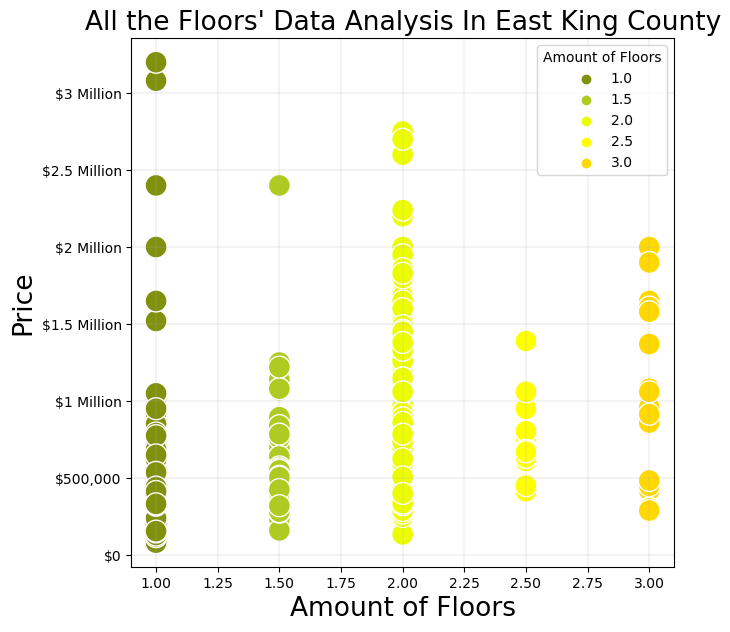

In [13]:
x = regressiondata3['Amount_of_Floors']
y = regressiondata3['Price']
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']#,'#efcc00']
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata3, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Floors', palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Floors\' Data Analysis In East King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.legend(title='Amount of Floors')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
                    '$3 Million'])
plt.gcf().set_size_inches((7,7))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [14]:
import pandas as pd
from sklearn.linear_model import PoissonRegressor

model10 = PoissonRegressor()

model10.fit(regressiondata3[['Amount_of_Floors']],regressiondata3[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [15]:
x = regressiondata3[['Amount_of_Floors']]
y = regressiondata3[['Price']]
prediction3 = model10.predict(x)

In [16]:
model_fit10 = regressiondata3
model_fit10['preds'] = prediction3

In [17]:
model_fit10

Amount_of_Floors     Price          preds
0                  1.0  510000.0  468653.925912
1                  1.0  400000.0  468653.925912
2                  1.0  660500.0  468653.925912
3                  1.0  420000.0  468653.925912
4                  1.0  592500.0  468653.925912
...                ...       ...            ...
2450               2.5  450000.0  768248.177702
2451               2.5  646800.0  768248.177702
2452               2.5  635000.0  768248.177702
2453               2.5  680000.0  768248.177702
2454               2.5  669950.0  768248.177702

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/793982902.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$600,000','$700,000','$800,000','$900,000',])


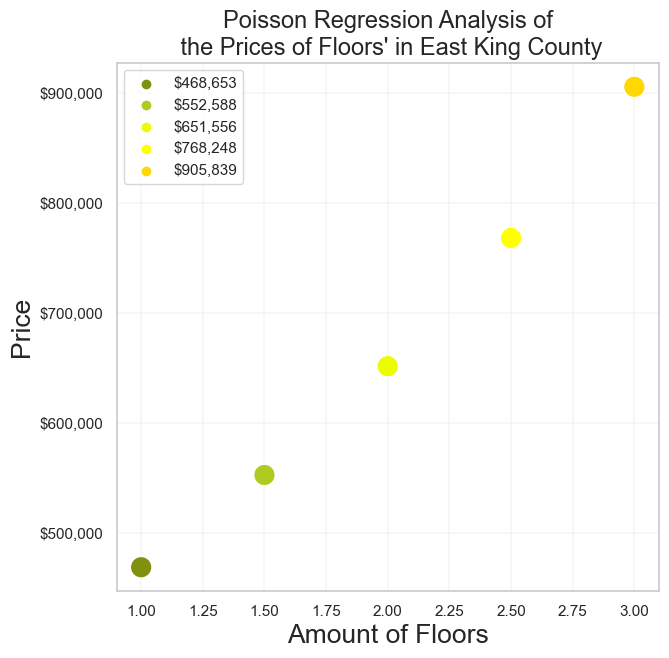

In [18]:
x = model_fit10['Amount_of_Floors']
y = model_fit10['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']#,'#efcc00']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit10, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Floors')
L=plt.legend()
L.get_texts()[0].set_text('$468,653')
L.get_texts()[1].set_text('$552,588')
L.get_texts()[2].set_text('$651,556')
L.get_texts()[3].set_text('$768,248')
L.get_texts()[4].set_text('$905,839')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$600,000','$700,000','$800,000','$900,000',])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/2822057550.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$600,000','$700,000','$800,000','$900,000',])


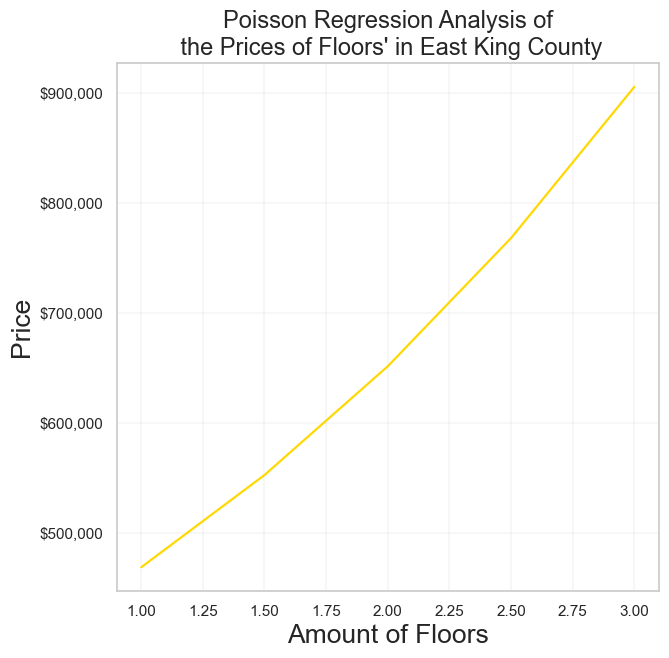

In [19]:
x = model_fit10['Amount_of_Floors']
y = model_fit10['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']#,'#efcc00']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit10, x=x, y=y,color='#ffd800')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$600,000','$700,000','$800,000','$900,000',])
plt.show()

In [20]:
(model_fit10['Price'] > model_fit10['preds']).value_counts()

False    1421
True     1034
dtype: int64

In [21]:
i = 0
y= 0
x = []
while i <  1421:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1034:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Possion Model\n 57% Accuracy ')

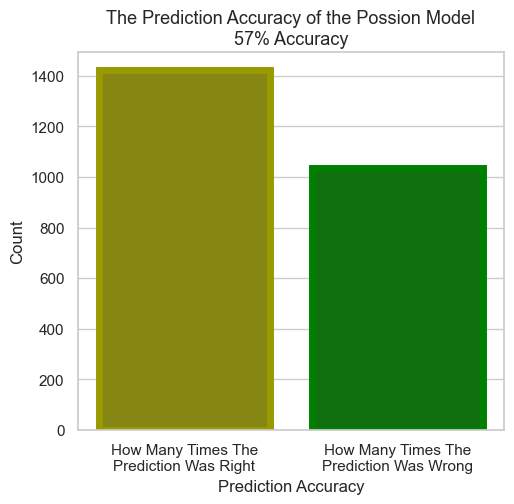

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
    
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Possion Model\n 57% Accuracy ',size=13)

In [23]:
# Importing modules that are required
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge

# Creating and training model
model11 = BayesianRidge()
model11.fit(regressiondata3[['Amount_of_Floors']],regressiondata3[['Price']])
   
# Model making a prediction on test data
prediction4 = model11.predict(regressiondata3[['Amount_of_Floors']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
model_fit11 = regressiondata3
model_fit11['preds'] = prediction4

In [25]:
model_fit11

Amount_of_Floors     Price          preds
0                  1.0  510000.0  466202.178721
1                  1.0  400000.0  466202.178721
2                  1.0  660500.0  466202.178721
3                  1.0  420000.0  466202.178721
4                  1.0  592500.0  466202.178721
...                ...       ...            ...
2450               2.5  450000.0  746546.180586
2451               2.5  646800.0  746546.180586
2452               2.5  635000.0  746546.180586
2453               2.5  680000.0  746546.180586
2454               2.5  669950.0  746546.180586

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/3288504273.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',


[Text(0, 400000.0, '0'),
 Text(0, 450000.0, '$400,000'),
 Text(0, 500000.0, '$450,000'),
 Text(0, 550000.0, '$500,000'),
 Text(0, 600000.0, '$550,000'),
 Text(0, 650000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 750000.0, '$750,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 850000.0, '$850,000'),
 Text(0, 900000.0, '')]

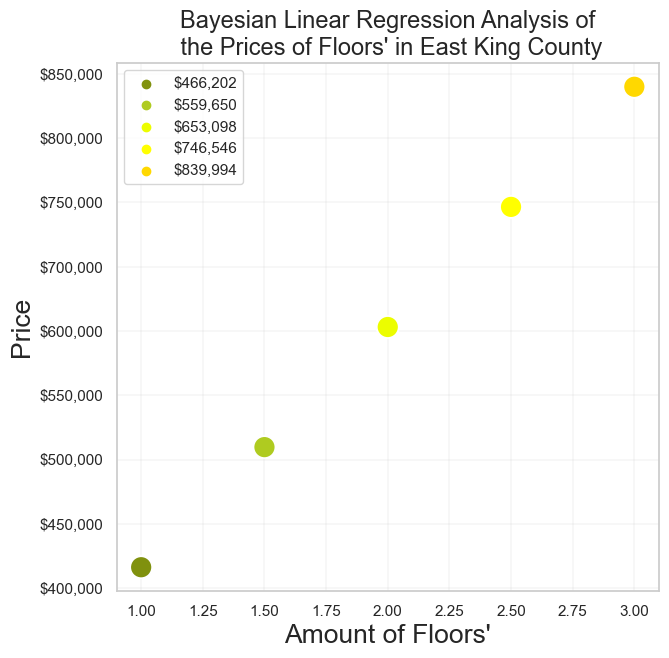

In [26]:
x = model_fit11['Amount_of_Floors']
y = model_fit11['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit11, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L.get_texts()[0].set_text('$466,202')
L.get_texts()[1].set_text('$559,650')
L.get_texts()[2].set_text('$653,098')
L.get_texts()[3].set_text('$746,546')
L.get_texts()[4].set_text('$839,994')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',
                    '$700,000','$750,000','$800,000','$850,000'])

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/867266500.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',


[Text(0, 400000.0, '0'),
 Text(0, 450000.0, '$400,000'),
 Text(0, 500000.0, '$450,000'),
 Text(0, 550000.0, '$500,000'),
 Text(0, 600000.0, '$550,000'),
 Text(0, 650000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 750000.0, '$750,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 850000.0, '$850,000'),
 Text(0, 900000.0, '')]

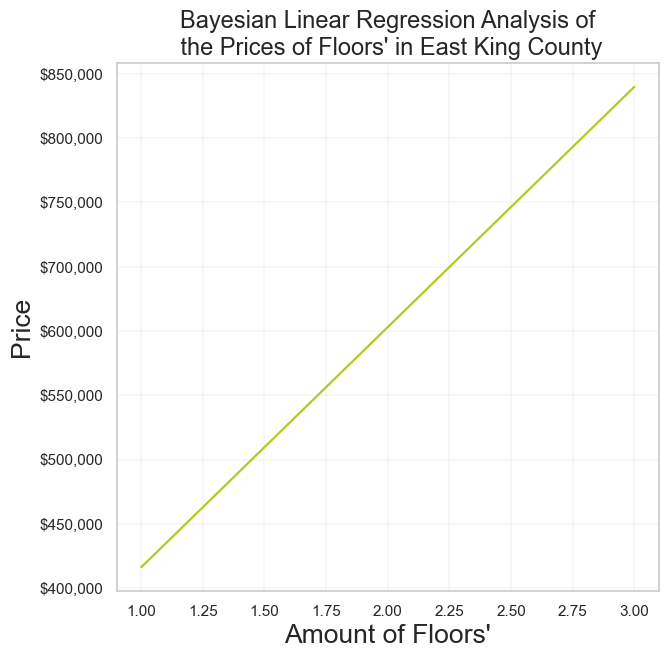

In [27]:
x = model_fit11['Amount_of_Floors']
y = model_fit11['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit11, x=x, y=y,color='#AFCB20')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',
                    '$700,000','$750,000','$800,000','$850,000'])

In [28]:
(model_fit11['Price'] > model_fit11['preds']).value_counts()

False    1427
True     1028
dtype: int64

In [29]:
i = 0
y= 0
x = []
while i <  1427:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1028:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Bayesian Linear Model\n 58% Accuracy ')

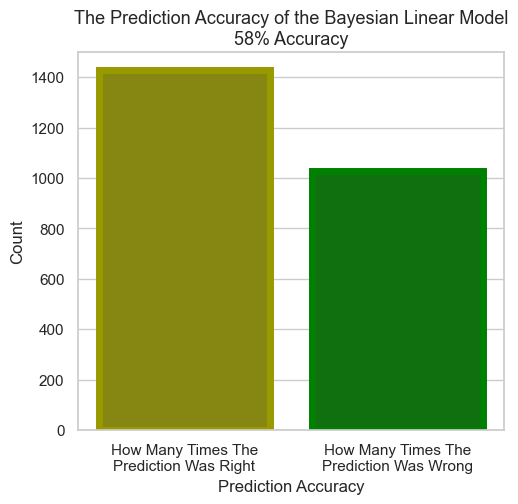

In [30]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Bayesian Linear Model\n 58% Accuracy ',size=13)

In [31]:
from sklearn.linear_model import QuantileRegressor


X = regressiondata3[['Amount_of_Floors']]
y = regressiondata3[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata3[['Amount_of_Floors']])
y_pred_2 = qrf2.predict(regressiondata3[['Amount_of_Floors']])
y_pred_3 = qrf3.predict(regressiondata3[['Amount_of_Floors']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packa

In [33]:
Quantile_regression3 = pd.DataFrame({'Amount_of_Floors': regressiondata3['Amount_of_Floors'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata3['Price']})

In [34]:
Quantile_regression3

Amount_of_Floors       0.1 Pred       0.5 Pred      0.9 Pred     Price
0                  1.0  270000.032808  434991.947124  6.534496e+05  510000.0
1                  1.0  270000.032808  434991.947124  6.534496e+05  400000.0
2                  1.0  270000.032808  434991.947124  6.534496e+05  660500.0
3                  1.0  270000.032808  434991.947124  6.534496e+05  420000.0
4                  1.0  270000.032808  434991.947124  6.534496e+05  592500.0
...                ...            ...            ...           ...       ...
2450               2.5  457499.941388  697481.947432  1.053206e+06  450000.0
2451               2.5  457499.941388  697481.947432  1.053206e+06  646800.0
2452               2.5  457499.941388  697481.947432  1.053206e+06  635000.0
2453               2.5  457499.941388  697481.947432  1.053206e+06  680000.0
2454               2.5  457499.941388  697481.947432  1.053206e+06  669950.0

[2455 rows x 5 columns]

In [35]:
for i,x in enumerate(Quantile_regression3.Amount_of_Floors):
    if x == 3:print(i)

2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433


In [36]:
Quantileregression_updated3= Quantile_regression3.loc[[0,2310,632,2434,2414]]
Quantileregression_updated3 = Quantileregression_updated3.drop('Price', axis=1)
Quantileregression_updated3

Amount_of_Floors       0.1 Pred       0.5 Pred      0.9 Pred
0                  1.0  270000.032808  434991.947124  6.534496e+05
2310               1.5  332500.002335  522488.613894  7.867016e+05
632                2.0  394999.971861  609985.280663  9.199536e+05
2434               2.5  457499.941388  697481.947432  1.053206e+06
2414               3.0  519999.910915  784978.614202  1.186458e+06

In [37]:
melted_data3 = pd.melt(Quantileregression_updated3, id_vars=['Amount_of_Floors'])
melted_data3 = melted_data3.dropna()
melted_data3 = melted_data3.rename(columns={'variable': 'Percentile'})
melted_data3

Amount_of_Floors Percentile         value
0                1.0   0.1 Pred  2.700000e+05
1                1.5   0.1 Pred  3.325000e+05
2                2.0   0.1 Pred  3.950000e+05
3                2.5   0.1 Pred  4.574999e+05
4                3.0   0.1 Pred  5.199999e+05
5                1.0   0.5 Pred  4.349919e+05
6                1.5   0.5 Pred  5.224886e+05
7                2.0   0.5 Pred  6.099853e+05
8                2.5   0.5 Pred  6.974819e+05
9                3.0   0.5 Pred  7.849786e+05
10               1.0   0.9 Pred  6.534496e+05
11               1.5   0.9 Pred  7.867016e+05
12               2.0   0.9 Pred  9.199536e+05
13               2.5   0.9 Pred  1.053206e+06
14               3.0   0.9 Pred  1.186458e+06

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/267057196.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])


[Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '')]

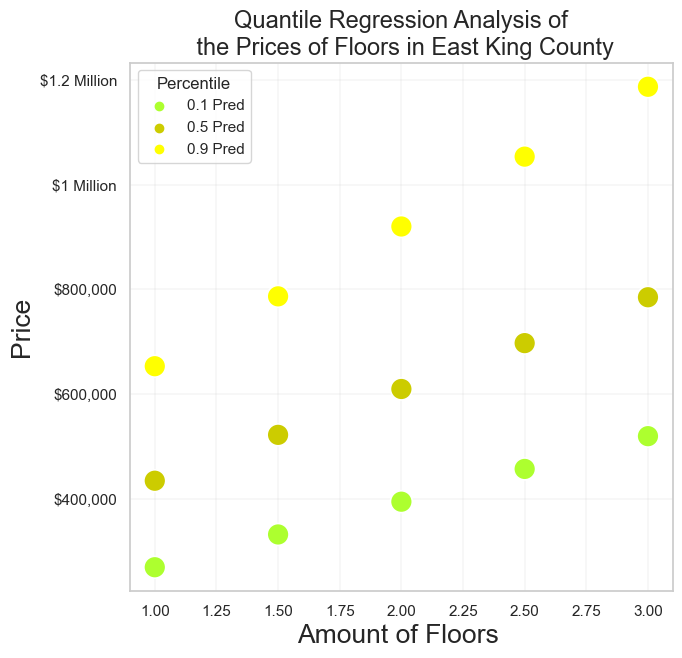

In [38]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data3, x="Amount_of_Floors", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Floors")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Floors in East King County',size=17)
plt.xlabel("Amount of Floors ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/1565280033.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])


[Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '')]

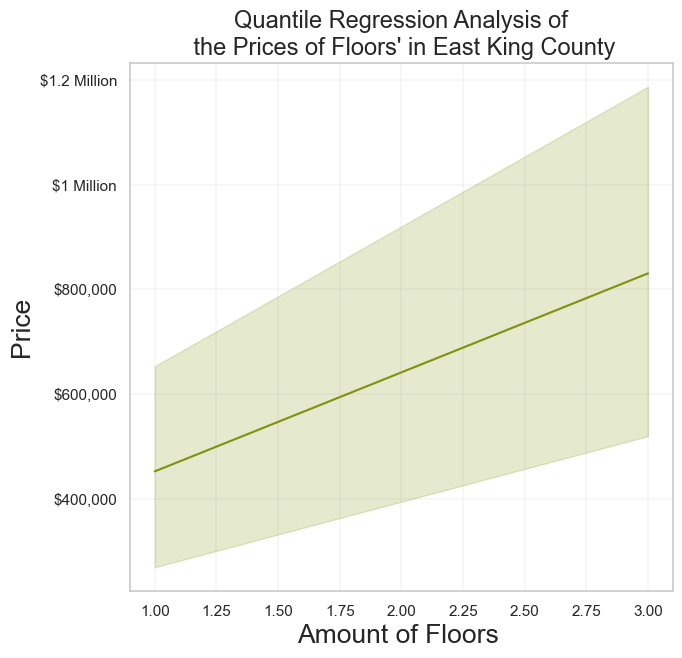

In [39]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=melted_data3, x="Amount_of_Floors", 
                     y='value',color='#80910E')
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Floors")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])

In [40]:
(Quantile_regression3['Price'] > Quantile_regression3['0.1 Pred']).value_counts()

True     2211
False     244
dtype: int64

In [41]:
i = 0
y= 0
x = []
while i <  244:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 2211:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.1 Model\n 10% Accuracy ')

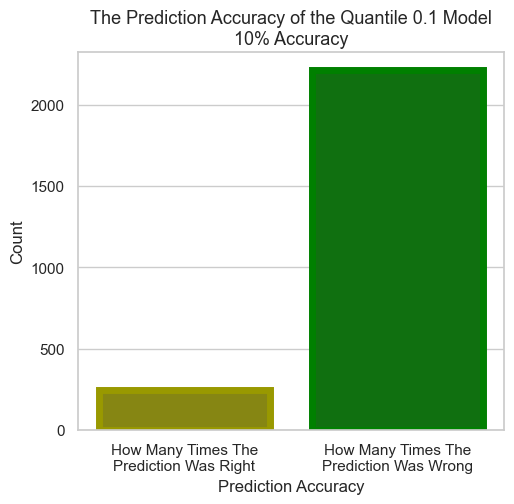

In [42]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.1 Model\n 10% Accuracy ',size=13)

In [43]:
(Quantile_regression3['Price'] > Quantile_regression3['0.5 Pred']).value_counts()

True     1235
False    1220
dtype: int64

In [44]:
i = 0
y= 0
x = []
while i <  1235:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1220:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.5 Model\n 50% Accuracy ')

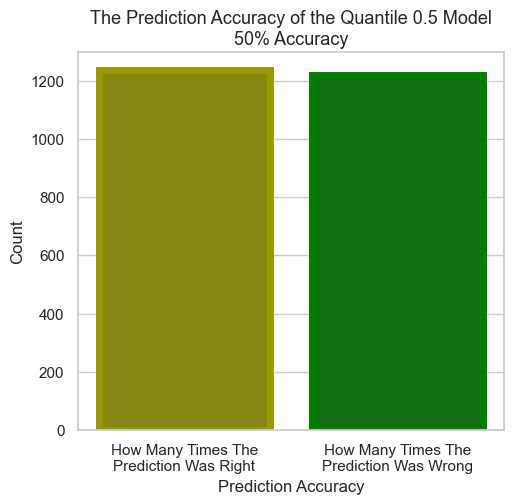

In [45]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.5 Model\n 50% Accuracy ',size=13)

In [46]:
(Quantile_regression3['Price'] > Quantile_regression3['0.9 Pred']).value_counts()

False    2209
True      246
dtype: int64

In [47]:
i = 0
y= 0
x = []
while i <  2209:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 246:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.9 Model\n 90% Accuracy ')

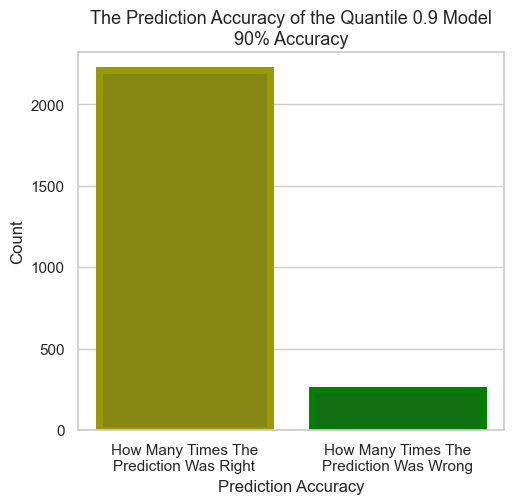

In [48]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.9 Model\n 90% Accuracy ',size=13)

In [50]:
from sklearn.linear_model import Ridge
model12 = Ridge(alpha=1.0)
model12.fit(regressiondata3[['Amount_of_Floors']],regressiondata3[['Price']])
preds_12 = model12.predict(regressiondata3[['Amount_of_Floors']])

In [51]:
model_fit12 = regressiondata3
model_fit12['preds'] = preds_12

In [52]:
model_fit12

Amount_of_Floors     Price          preds
0                  1.0  510000.0  465948.523166
1                  1.0  400000.0  465948.523166
2                  1.0  660500.0  465948.523166
3                  1.0  420000.0  465948.523166
4                  1.0  592500.0  465948.523166
...                ...       ...            ...
2450               2.5  450000.0  746811.029934
2451               2.5  646800.0  746811.029934
2452               2.5  635000.0  746811.029934
2453               2.5  680000.0  746811.029934
2454               2.5  669950.0  746811.029934

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/3583452325.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$450,000','$500,000','$550,000','$600,000','$650,000',


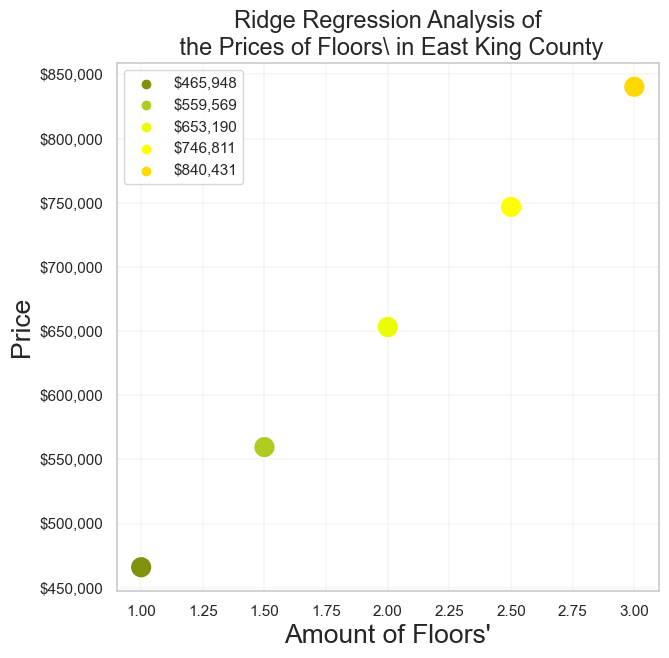

In [53]:
x = model_fit12['Amount_of_Floors']
y = model_fit12['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit12, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Floors\ in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('$465,948')
L.get_texts()[1].set_text('$559,569')
L.get_texts()[2].set_text('$653,190')
L.get_texts()[3].set_text('$746,811')
L.get_texts()[4].set_text('$840,431')
#L.legend(title='Predictions')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$450,000','$500,000','$550,000','$600,000','$650,000',
                    '$700,000','$750,000','$800,000','$850,000'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/1210128381.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',


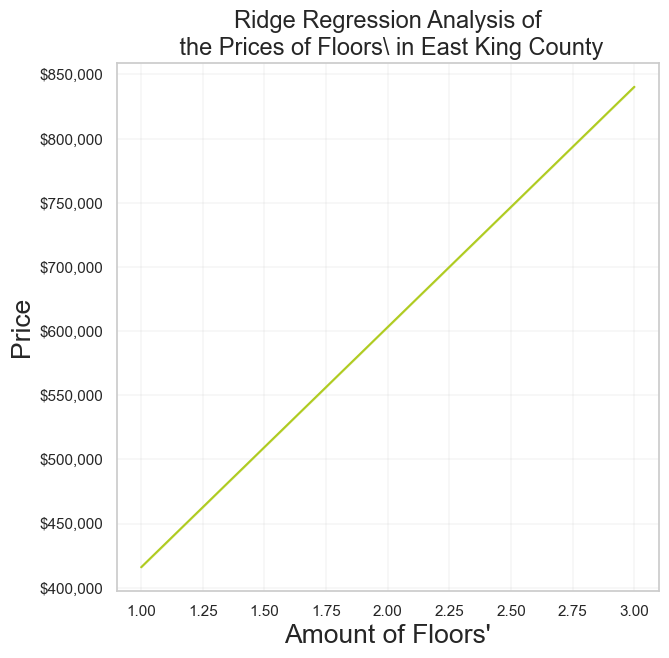

In [54]:
x = model_fit12['Amount_of_Floors']
y = model_fit12['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit12, x=x, y=y,color='#AFCB20')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Floors\ in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',
                    '$700,000','$750,000','$800,000','$850,000'])
plt.show()

In [55]:
(model_fit12['Price'] > model_fit12['preds']).value_counts()

False    1427
True     1028
dtype: int64

In [56]:
i = 0
y= 0
x = []
while i <  1427:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1028:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Ridge Model\n 60% Accuracy ')

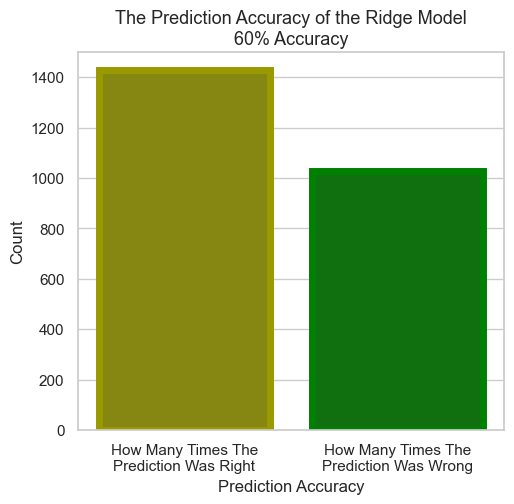

In [57]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Ridge Model\n 60% Accuracy ',size=13)

In [76]:
# Creating the DataFrame
models_predictions3 = pd.DataFrame({"1 Bathroom":['$468,653','$466,202','$270,000','$434,991','$653,449','$465,948'], 
                   "1.5 Bathrooms":['$552,588','$559,650','$332,500','$522,488','$786,701','$559,569'], 
                   "2 Bathrooms":['$651,556','$653,098','$394,999','$609,985','$919,953','$653,190'], 
                   "2.5 Bathrooms":['$768,248','$746,546','$457,499','$697,481','$1,053,206','$746,811'],
                   "3 Bathrooms":['$905,839','$839,994','$519,999','$784,978','$1,186,458','$840,431'], 
                        }) 
  
# Create the index
index_ = ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions3.index = index_

In [77]:
models_predictions3

1 Bathroom 1.5 Bathrooms 2 Bathrooms 2.5 Bathrooms  \
Poisson Regression           $468,653      $552,588    $651,556      $768,248   
Bayesian Linear Regression   $466,202      $559,650    $653,098      $746,546   
Quantile Regression 0.1      $270,000      $332,500    $394,999      $457,499   
Quantile Regression 0.5      $434,991      $522,488    $609,985      $697,481   
Quantile Regression 0.9      $653,449      $786,701    $919,953    $1,053,206   
Ridge Regression             $465,948      $559,569    $653,190      $746,811   

                           3 Bathrooms  
Poisson Regression            $905,839  
Bayesian Linear Regression    $839,994  
Quantile Regression 0.1       $519,999  
Quantile Regression 0.5       $784,978  
Quantile Regression 0.9     $1,186,458  
Ridge Regression              $840,431

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [62]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [63]:
X,y = regressiondata3[['Amount_of_Floors']],regressiondata3[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model3_stack = clf_stack.fit(X, y)   # training of stacked model
pred3_stack = model3_stack.predict(X) 

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for Quant

In [64]:
model_fit13 = regressiondata3
model_fit13['preds'] = pred3_stack

In [65]:
model_fit13

Amount_of_Floors     Price      preds
0                  1.0  510000.0   390000.0
1                  1.0  400000.0   390000.0
2                  1.0  660500.0   390000.0
3                  1.0  420000.0   390000.0
4                  1.0  592500.0   390000.0
...                ...       ...        ...
2450               2.5  450000.0  1060000.0
2451               2.5  646800.0  1060000.0
2452               2.5  635000.0  1060000.0
2453               2.5  680000.0  1060000.0
2454               2.5  669950.0  1060000.0

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/1034123911.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000',


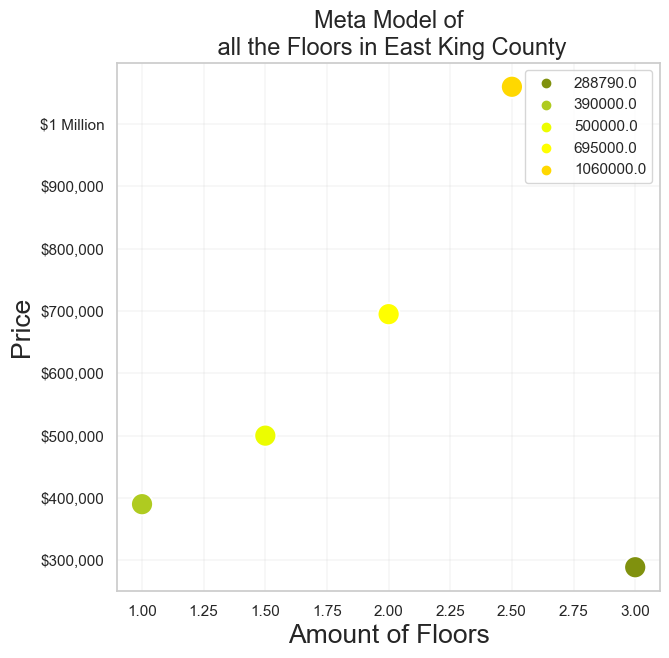

In [68]:
x = model_fit13['Amount_of_Floors']
y = model_fit13['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit13, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Floors in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000',
                    '$800,000','$900,000','$1 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/647252909.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000',


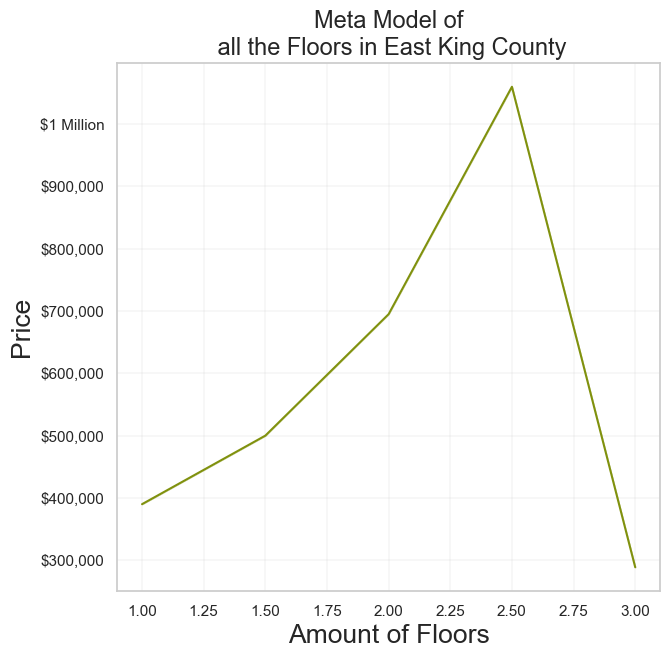

In [70]:
x = model_fit13['Amount_of_Floors']
y = model_fit13['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit13, x=x, y=y,color='#80910E')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Floors in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000',
                    '$800,000','$900,000','$1 Million'])
plt.show()

In [78]:
meta_model3 = models_predictions3

In [79]:
meta_model3.loc[len(meta_model3.index)] = ['$390,000', '$500,000',
                                           '$695,000', '$1,060,000','$288,790']
meta_model3 = meta_model3.rename(index={6: 'Final Prediction'})

In [80]:
meta_model3

1 Bathroom 1.5 Bathrooms 2 Bathrooms 2.5 Bathrooms  \
Poisson Regression           $468,653      $552,588    $651,556      $768,248   
Bayesian Linear Regression   $466,202      $559,650    $653,098      $746,546   
Quantile Regression 0.1      $270,000      $332,500    $394,999      $457,499   
Quantile Regression 0.5      $434,991      $522,488    $609,985      $697,481   
Quantile Regression 0.9      $653,449      $786,701    $919,953    $1,053,206   
Ridge Regression             $465,948      $559,569    $653,190      $746,811   
Final Prediction             $390,000      $500,000    $695,000    $1,060,000   

                           3 Bathrooms  
Poisson Regression            $905,839  
Bayesian Linear Regression    $839,994  
Quantile Regression 0.1       $519,999  
Quantile Regression 0.5       $784,978  
Quantile Regression 0.9     $1,186,458  
Ridge Regression              $840,431  
Final Prediction              $288,790

In [81]:
box_df3 = meta_model3.transpose()
box_df3

Poisson Regression Bayesian Linear Regression  \
1 Bathroom              $468,653                   $466,202   
1.5 Bathrooms           $552,588                   $559,650   
2 Bathrooms             $651,556                   $653,098   
2.5 Bathrooms           $768,248                   $746,546   
3 Bathrooms             $905,839                   $839,994   

              Quantile Regression 0.1 Quantile Regression 0.5  \
1 Bathroom                   $270,000                $434,991   
1.5 Bathrooms                $332,500                $522,488   
2 Bathrooms                  $394,999                $609,985   
2.5 Bathrooms                $457,499                $697,481   
3 Bathrooms                  $519,999                $784,978   

              Quantile Regression 0.9 Ridge Regression Final Prediction  
1 Bathroom                   $653,449         $465,948         $390,000  
1.5 Bathrooms                $786,701         $559,569         $500,000  
2 Bathrooms                  $919,953         $653,190         $695,000  
2.5 Bathrooms              $1,053,206         $746,811       $1,060,000  
3 Bathrooms                $1,186,458         $840,431         $288,790

In [85]:
melted_data3= pd.melt(box_df3, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data3 = melted_data3.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [86]:
melted_data3[melted_data3.columns[1:]] = melted_data3[melted_data3.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [87]:
melted_data3

Prediction Model  Prediction
0           Poisson Regression    468653.0
1           Poisson Regression    552588.0
2           Poisson Regression    651556.0
3           Poisson Regression    768248.0
4           Poisson Regression    905839.0
5   Bayesian Linear Regression    466202.0
6   Bayesian Linear Regression    559650.0
7   Bayesian Linear Regression    653098.0
8   Bayesian Linear Regression    746546.0
9   Bayesian Linear Regression    839994.0
10     Quantile Regression 0.1    270000.0
11     Quantile Regression 0.1    332500.0
12     Quantile Regression 0.1    394999.0
13     Quantile Regression 0.1    457499.0
14     Quantile Regression 0.1    519999.0
15     Quantile Regression 0.5    434991.0
16     Quantile Regression 0.5    522488.0
17     Quantile Regression 0.5    609985.0
18     Quantile Regression 0.5    697481.0
19     Quantile Regression 0.5    784978.0
20     Quantile Regression 0.9    653449.0
21     Quantile Regression 0.9    786701.0
22     Quantile Regression 0.9    919953.0
23     Quantile Regression 0.9   1053206.0
24     Quantile Regression 0.9   1186458.0
25            Ridge Regression    465948.0
26            Ridge Regression    559569.0
27            Ridge Regression    653190.0
28            Ridge Regression    746811.0
29            Ridge Regression    840431.0
30            Final Prediction    390000.0
31            Final Prediction    500000.0
32            Final Prediction    695000.0
33            Final Prediction   1060000.0
34            Final Prediction    288790.0

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/1029859981.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_yticklabels(ylabels)


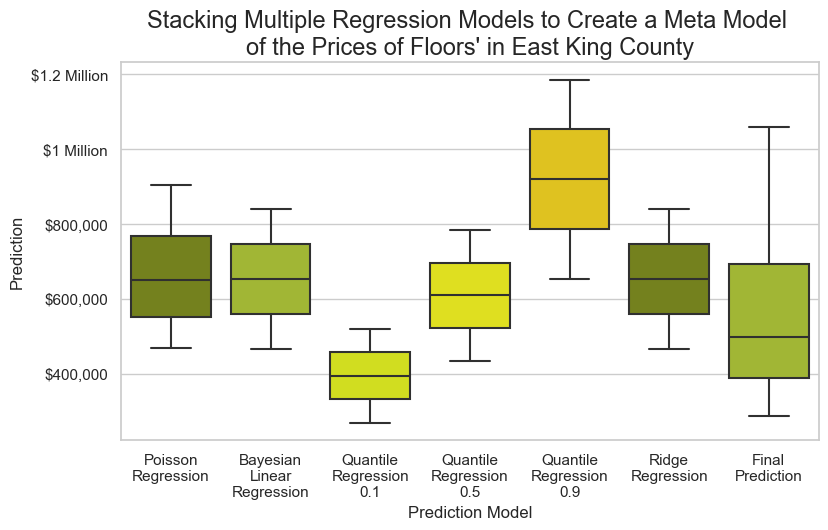

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data3,x='Prediction Model', y='Prediction',
             palette=flatui)#,hue='Prediction Model',width=1.9)
             #hue='Prediction Model')
#x.set_xticklabels(x.get_xticklabels(), rotation=45,horizontalalignment='right')
ylabels = ['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million']
x.set_yticklabels(ylabels)
#x.set_ylabel('0','$0','$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million')
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of Floors\' in East King County", size=17)
wrap_labels(x, 10)
#x.set_xticklabels(rotation=30)

In [99]:
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = '' 
    df.iloc[0,:] = 'background-color:#FFFF00;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#ffd800;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#ECFD00;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#ffd800;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#AFCB20;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#ffd800;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#80910E;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model3 = meta_model3.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #F2FFD1')]},
            {"selector":"thead", 'props':[("background-color","#F2FFD1"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#F2FFD1'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [100]:
import dataframe_image as dfi
dfi.export(meta_model3, 'meta_model3.png')

In [101]:
meta_model3

In [284]:
%store Quantile_Regression_Prediction2
%store Weighted_Average_Prediction2

Stored 'Quantile_Regression_Prediction2' (DataFrame)
Stored 'Weighted_Average_Prediction2' (DataFrame)


In [290]:
def PRICE_YEARS_BUILT(YEAR_BUILT):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_built = house_info['Year Built'].tolist()

    years_built_index = []
    for i,x in enumerate(year_built):
        if x == YEAR_BUILT:years_built_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
   

    years_built_eastking = []
    for i in years_built_index:
        if locations[i] == zip_loca[0] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[1] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[2] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[3] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[4]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[5] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[6] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[7]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[8] : years_built_eastking.append(i)
       


    price = house_info["Price"].tolist()

    price_eastking = []
    for i in years_built_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_Year = house_info["Year Built"].value_counts().index.tolist()
price_Year_eastking = []
for i in no_of_Year:
    price_Year_eastking.append(PRICE_YEARS_BUILT(i))
price_Year_eastking = sum(price_Year_eastking, [])
len(price_Year_eastking)

2455

In [288]:
def AMOUNT_YEARS_BUILT(AMOUNT_YEARS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    years_built = house_info["Year Built"].tolist()
    X_value = []
    years_index = []
    for i,x in enumerate(years_built):
        if x == AMOUNT_YEARS:years_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
   

    for i in years_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEARS)
       

    return X_value
no_of_years = house_info["Year Built"].value_counts().index.tolist()
amount_years_eastking = []
for i in no_of_years:
    amount_years_eastking.append(AMOUNT_YEARS_BUILT(i))
amount_years_eastking= sum(amount_years_eastking, [])
len(amount_years_eastking)

2455

In [291]:
regressiondata4 = pd.DataFrame({'Year_Built':amount_years_eastking,
                      'Price':price_Year_eastking})
regressiondata4

Year_Built     Price
0           2014  453246.0
1           2014  372977.0
2           2014  357186.0
3           2014  479990.0
4           2014  439990.0
...          ...       ...
2450        1935  895000.0
2451        1935  160000.0
2452        1934  230000.0
2453        1934  275000.0
2454        1934  529000.0

[2455 rows x 2 columns]

In [292]:
year = regressiondata4['Year_Built'].value_counts()
year

2005    116
2004    110
2006     93
2003     91
1999     89
       ... 
1919      1
1917      1
1908      1
1906      1
1924      1
Name: Year_Built, Length: 108, dtype: int64

In [308]:
reg1,year1 = [],[]
for i,x in enumerate(amount_years_eastking):
    if x == 1900:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1901:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1902:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1903:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1904:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1905:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1906:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1907:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1908:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1909:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1910:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1911:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1912:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1913:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1914:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1915:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1916:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1917:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1918:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1919:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1920:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1921:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1922:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1923:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1924:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1925:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1926:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1927:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1928:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1929:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1930:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1931:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1932:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1933:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if i == 1934:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1935:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1936:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1937:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
reg1.remove(536751.0)
year1.remove(2013)

In [309]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata44
for i,x in enumerate(regressiondata44.Year_Built):print(i,x,reg1[i])

0 1925 280000.0
1 1925 279000.0
2 1924 208000.0
3 1910 195000.0
4 1910 160000.0
5 1928 150000.0
6 1928 235000.0
7 1928 303000.0
8 1927 307000.0
9 1927 255000.0
10 1929 285000.0
11 1920 343000.0
12 1922 134000.0
13 1922 275000.0
14 1922 170000.0
15 1922 265000.0
16 1909 439900.0
17 1909 445000.0
18 1906 190000.0
19 1930 275000.0
20 1930 286000.0
21 1930 800000.0
22 1919 360000.0
23 1900 550000.0
24 1900 130000.0
25 1900 210000.0
26 1908 572000.0
27 1923 870000.0
28 1923 276000.0
29 1923 255000.0
30 1923 244500.0
31 1923 301000.0
32 1912 80000.0
33 1912 600000.0
34 1912 323000.0
35 1912 230950.0
36 1912 385000.0
37 1916 425000.0
38 1916 312000.0
39 1921 212000.0
40 1911 399500.0
41 1937 405000.0
42 1937 335000.0
43 1915 201000.0
44 1915 465000.0
45 1915 190000.0
46 1931 542500.0
47 1931 335000.0
48 1931 775000.0
49 1931 282000.0
50 1913 390000.0
51 1913 349950.0
52 1913 360000.0
53 1917 250000.0
54 1914 248000.0
55 1903 170000.0
56 1903 457000.0
57 1936 550000.0
58 1936 550000.0
59 1936 

In [295]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
x= regressiondata44.Year_Built.value_counts()
len(x)

#for i,x in enumerate(regressiondata44.Year_Built):print(i,x,regressiondata44.Price[i])

31

In [310]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_eastking):
    if x == 1938:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1939:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1940:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1941:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1942:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1943:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1944:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1945:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1946:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1947:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1948:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1949:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1950:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1951:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1952:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1953:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1954:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1955:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1956:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1957:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1958:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1959:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1960:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1961:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1962:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1963:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1964:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1965:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1966:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1967:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1968:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1969:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1970:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1971:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if i == 1972:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1973:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1974:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1975:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
reg1.remove(589000.0)
year1.remove(1981)

In [311]:
regressiondata45 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata45
for i,x in enumerate(regressiondata45.Year_Built):print(i,x,reg1[i])

0 1968 499000.0
1 1968 850000.0
2 1968 585000.0
3 1968 380000.0
4 1968 330000.0
5 1968 765000.0
6 1968 340000.0
7 1968 406430.0
8 1968 625700.0
9 1968 430000.0
10 1968 395000.0
11 1968 375000.0
12 1968 420000.0
13 1968 735000.0
14 1968 2000000.0
15 1968 300000.0
16 1968 450000.0
17 1968 540000.0
18 1968 599000.0
19 1968 499900.0
20 1968 284000.0
21 1968 283700.0
22 1968 279475.0
23 1967 299000.0
24 1967 530000.0
25 1967 496500.0
26 1967 525000.0
27 1967 290000.0
28 1967 382500.0
29 1967 415000.0
30 1967 584999.0
31 1967 1250000.0
32 1967 358000.0
33 1967 580000.0
34 1967 435000.0
35 1967 663000.0
36 1967 295000.0
37 1967 377000.0
38 1967 234000.0
39 1967 450000.0
40 1967 503000.0
41 1967 369300.0
42 1967 427500.0
43 1967 396450.0
44 1967 450000.0
45 1959 299000.0
46 1959 150000.0
47 1959 280000.0
48 1959 396480.0
49 1959 835000.0
50 1959 281000.0
51 1959 968000.0
52 1959 465000.0
53 1959 1650000.0
54 1959 330000.0
55 1962 505000.0
56 1962 286300.0
57 1962 275000.0
58 1962 369500.0
59 1

In [312]:
x= regressiondata45.Year_Built.value_counts()
len(x)

36

In [299]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_eastking):
    if x == 1976:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1977:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1978:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1979:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1980:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1981:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1982:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1983:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1984:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1985:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1986:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1987:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1988:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1989:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1990:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1991:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1992:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1993:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1994:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1995:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1996:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1997:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1998:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1999:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2001:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2002:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2003:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2004:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2005:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2006:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2007:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2008:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2009:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2010:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if i == 2011:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2012:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2013:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2014:
        reg1.append(price_Year_eastking[i])
        year1.append(x)

In [300]:
regressiondata46 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata46
x= regressiondata46.Year_Built.value_counts()
len(x)
#for i,x in enumerate(regressiondata46.Year_Built):print(i,x,reg1[i])

37

In [313]:
flatui1 = [ '#f7d64e','#f3d451','#fad94f','#fbcc06','#f5c80a','#f0c718',
          '#eed04f','#e3bf27','#E9DB0D','#E1D41E','#DBD14B','#D0C318',
           
           '#dcc358','#d3c278','#e0cd7f', '#E8E3C1','#E6E3CA','#F4F3ED',
           '#E8E7DE','#F4F3ED','#F4F3ED','#E8E3C1','#DFD8AD','#d1aa06', 
           
           '#b7960c','#b39519','#a78d21','#937704','#9d810c', '#86721e']#,
           #'#806b12']#,'#7d6c23','#645102','#635108','#666600', '#333300','#3c3723']
len(flatui1)#37

30

In [314]:
flatui2 = ['#ffff00','#ffff1a','#ffff33','#ffff4d','#ffff66','#ffff66',
           '#fdf623','#ede622','#ebe775','#e8e110','#e4e063','#e5df34',
           
           '#d8d22a','#e7e59c','#ebe891','#e9e8cb','#f0efd9','#ECEADE',
           '#f2f2e4', '#F4F3ED','#E8E5D4','#E6E3CA','#E6E5A8','#c6c639',
           
           '#bfbf40','#c5c035','#9e990e','#97942b','#757613','#6a6716',
          '#6d6a10','#686913','#39390C','#373805','#3C3C18','#494A25']#,'#4D4E1E']#38
len(flatui2)

36

In [315]:
flatui3 = ['#D6FF00','#D6F825','#DBF844','#C1E504','#C3E21E','#DDF65C',
          '#C5E130','#CBE448','#BBD62E','#ACCD03','#A1BD0D','#95AE15',
          
          '#94AE0B','#8DA50F','#B3C169',
           '#DBE1BC','#E5E8D4','#ECF2CB',
          '#F2F4E5','#EEF0E5','#E3E8C7','#E5E8D4','#DDE6A8','#819806',
          
          '#768524','#768916','#708501','#5E6920','#586612','#536204',
          '#444C1E','#424A15','#3A430B','#323B03','#303511','#323A09','#2E3603']#37

<ipython-input-318-dfde7245af32>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$100,000','$200,000','$300,000','$400,000','$500,000','$600,000',
<ipython-input-318-dfde7245af32>:18: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
<ipython-input-318-dfde7245af32>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million','$1.25 Million',
<ipython-input-318-dfde7245af32>:38: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
<ipython-input-318-dfde7245af32>:55: UserWarning: FixedFormatter should only be used together with F

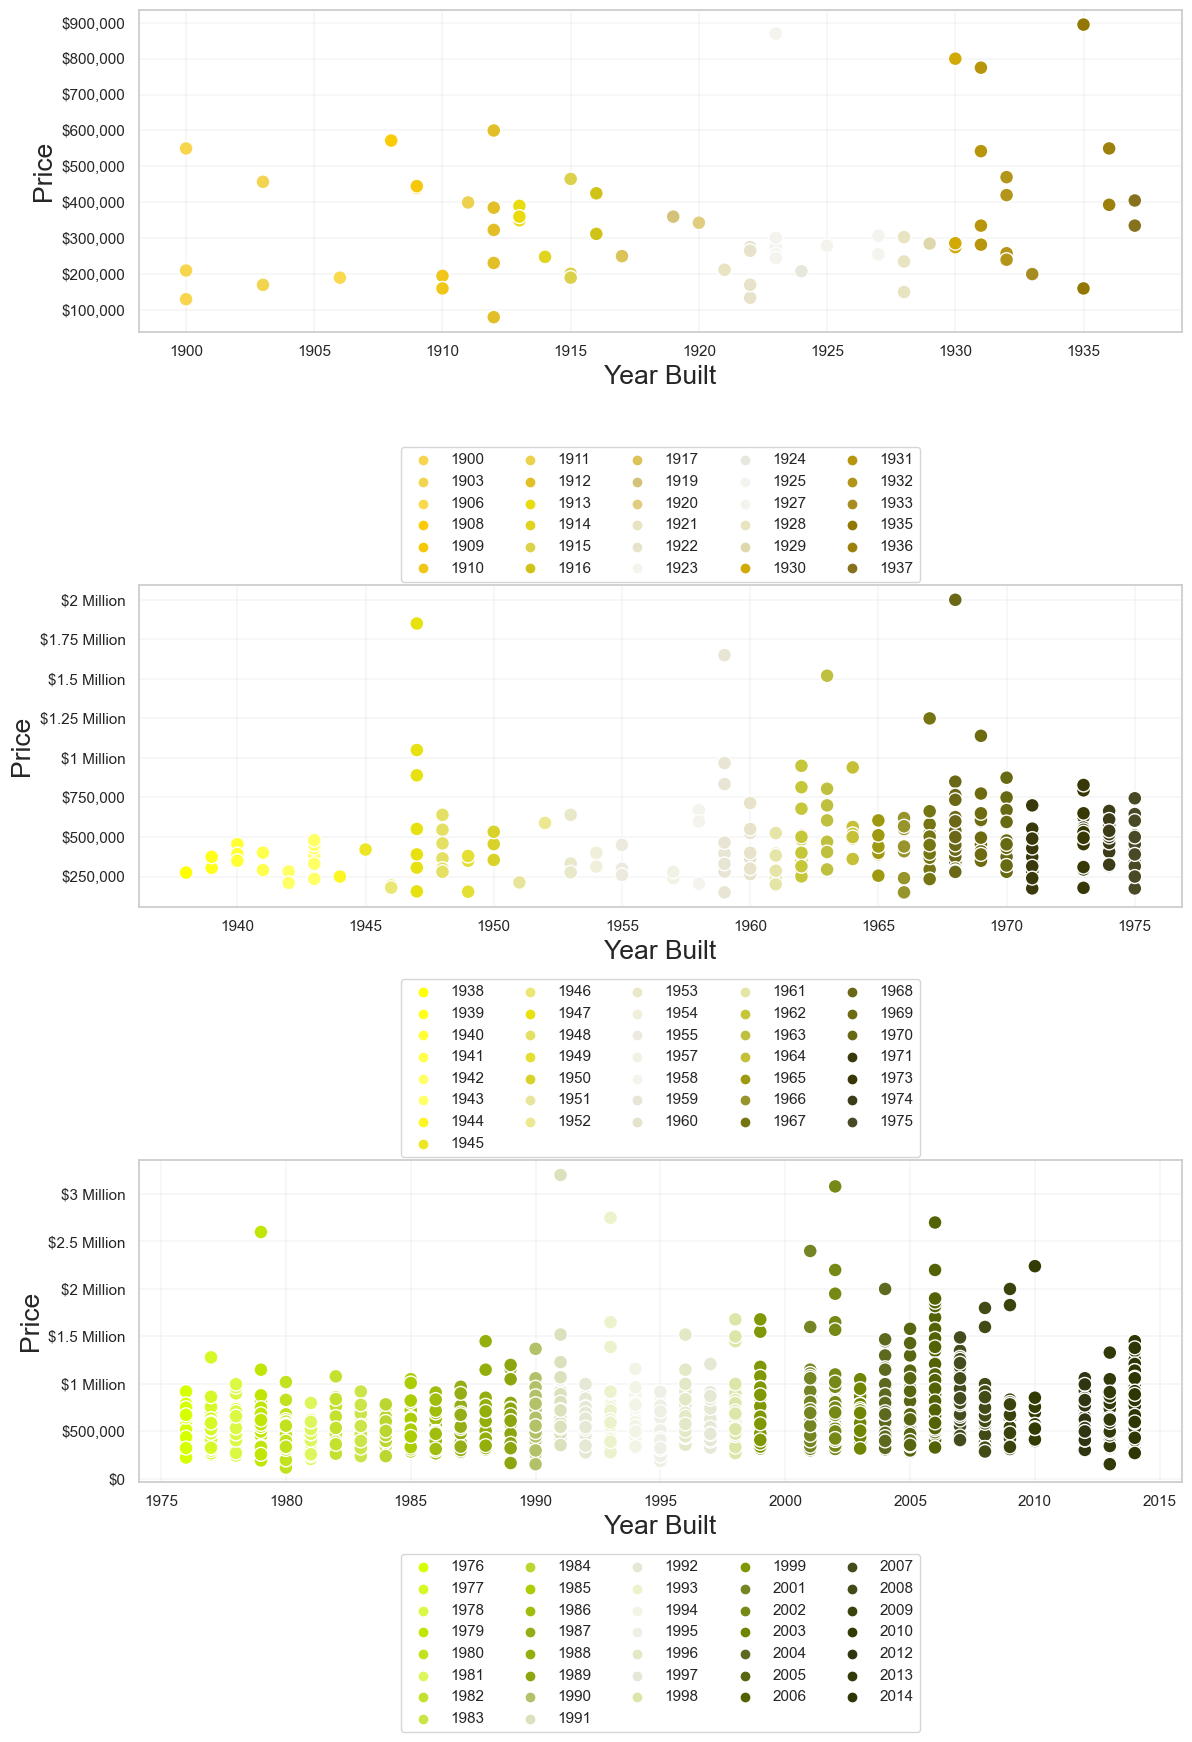

In [318]:
plt.subplot(3,1,1) #35 years in tottal
x = regressiondata44['Year_Built']
y = regressiondata44['Price']
data=regressiondata44
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata44, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui1)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In North King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$100,000','$200,000','$300,000','$400,000','$500,000','$600,000',
                    '$700,000','$800,000','$900,000'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks()

plt.subplot(3,1,2)
x = regressiondata45['Year_Built']
y = regressiondata45['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata45, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui2)
plt.grid(linestyle='-', linewidth=0.2)

plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million','$1.25 Million',
'$1.5 Million','$1.75 Million','$2 Million',])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks(1930,1995)
#plt.xticks(np.arange(1930,1995)) 

plt.subplot(3,1,3)
sns.set(style="whitegrid")
x = regressiondata46['Year_Built']
y = regressiondata46['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata46, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui3)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
                    '$3 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
#plt.tight_layout(1)
plt.show()


In [374]:
%store Quantile_Regression_Prediction3
%store Weighted_Average_Prediction3

Stored 'Quantile_Regression_Prediction3' (DataFrame)
Stored 'Weighted_Average_Prediction3' (DataFrame)


In [375]:
def YEAR_RENOVATED(YEAR):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year = house_info['Year Renoveted'].tolist()

    year_index = []
    for i,x in enumerate(year):
        if x == YEAR:year_index.append(i)
            
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    


    year_eastking = []
    for i in year_index:
        if locations[i] == zip_loca[0] : year_eastking.append(i)
        elif locations[i] == zip_loca[1] : year_eastking.append(i)
        elif locations[i] == zip_loca[2] : year_eastking.append(i)
        elif locations[i] == zip_loca[3] : year_eastking.append(i)
        elif locations[i] == zip_loca[4] : year_eastking.append(i)
        elif locations[i] == zip_loca[5] : year_eastking.append(i)
        elif locations[i] == zip_loca[6] : year_eastking.append(i)
        elif locations[i] == zip_loca[7]: year_eastking.append(i)
        elif locations[i] == zip_loca[8] : year_eastking.append(i)
       

    price = house_info["Price"].tolist()

    price_eastking = []
    for i in year_eastking:price_eastking.append(price[i])
    return(price_eastking)

year_renovated = house_info["Year Renoveted"].value_counts().index.tolist()
yearrenov_Price_eastking = []
for i in year_renovated:
    yearrenov_Price_eastking.append(YEAR_RENOVATED(i))
yearrenov_Price_eastking = sum(yearrenov_Price_eastking, [])
len(yearrenov_Price_eastking)

2021

In [376]:
def AMOUNT_YEAR_RENOVATED(AMOUNT_YEAR):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_renovated = house_info["Year Renoveted"].tolist()
    X_value = []
    year_index = []
    for i,x in enumerate(year_renovated):
        if x == AMOUNT_YEAR:year_index.append(i)
            
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
   


    for i in year_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEAR)
        
    return X_value
year = house_info["Year Renoveted"].value_counts().index.tolist()
year_eastking = []
for i in year:
    year_eastking.append(AMOUNT_YEAR_RENOVATED(i))
year_eastking= sum(year_eastking, [])
len(year_eastking)

2021

In [393]:
regressiondata5 = pd.DataFrame({'Year_Renoveted':year_eastking,
                                'Price':yearrenov_Price_eastking})
regressiondata5[1988:]
re5 = regressiondata5[1988:]
re5
x = re5.Year_Renoveted.value_counts()
#x = regressiondata5.Year_Renoveted.value_counts()
len(x)

21

In [398]:
flatui = ['#fef3d1','#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522','#574b26']
          
         
            #flatui = ['#fef3d1','#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          #'#efe6ca','#e6dbb6','#ebe0bb','#f1e6c3','#f4e8c4',
          
          #'#f6eac2','#f8eabe','#fcedbf','#fef1c8','#f0e3ba',
          #'#f5e8c1','#faedc5','#fdf0c4','#f6e4ab','#fce6a1',
          
          #'#f9de87']#,'#e8d497']#,'#e9d28a','#ecd280','#f4d77c',
          #'#fadb7b','#fedc70','#ffd44f','#f9d050','#f4d061',
          
          #'#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          #'#e5bd42','#f0b601','#cba018','#cca425','#c9a638',
          
          #'#c99903','#bb8f08','#ad860c','#9d7d1a','#b89424',
          #'#ac8f38','#a47d03','#8c6c08','#80640e','#7f6618',
          
         # '#4f3d05','#534107','#564510','#4b3d11','#655522','#574b26','#3a2d02','#342906']
len(flatui)#58
len(flatui)#58

21

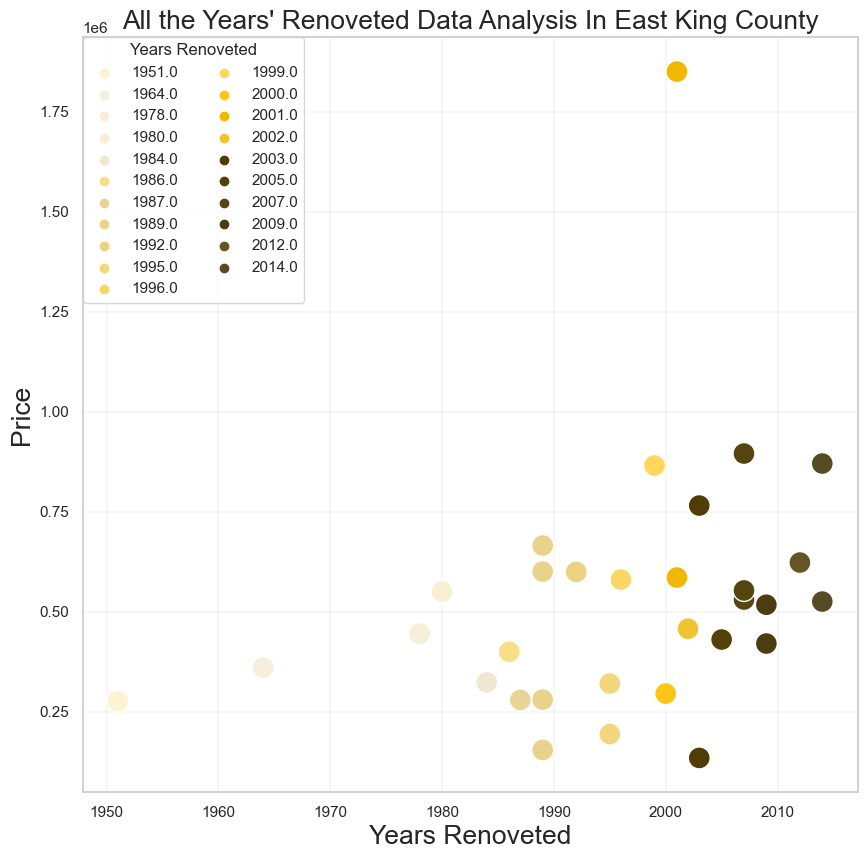

In [399]:
x = regressiondata5[1988:]['Year_Renoveted']
y = regressiondata5[1988:]['Price']
#plt.xticks(np.arange(1900,2000))
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=re5, x=x, y=y,s=250, linewidth = 1,
                    hue='Year_Renoveted',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In East King County',size=19)
plt.xlabel("Years Renoveted", size=19)
plt.legend(title='Years Renoveted')
plt.ylabel("Price", size=19)
#ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
                         #'$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
plt.legend( loc='upper left', borderaxespad=0,title="Years Renoveted",
          frameon=True, ncol=2)
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [432]:
%store Quantile_Regression_Prediction4
%store Weighted_Average_Prediction4

Stored 'Quantile_Regression_Prediction4' (DataFrame)
Stored 'Weighted_Average_Prediction4' (DataFrame)


In [433]:
def CONDITION(LEVEL_CONDITION):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    condition_level = house_info['Condition'].tolist()

    condition_index = []
    for i,x in enumerate(condition_level):
        if x == LEVEL_CONDITION:condition_index.append(i)
            
   
    level_eastking = []
    for i  in condition_index:
        if locations[i] == zip_loca[0] : level_eastking.append(i)
        elif locations[i] == zip_loca[1] : level_eastking.append(i)
        elif locations[i] == zip_loca[2] : level_eastking.append(i)
        elif locations[i] == zip_loca[3] : level_eastking.append(i)
        elif locations[i] == zip_loca[4] : level_eastking.append(i)
        elif locations[i] == zip_loca[5] : level_eastking.append(i)
        elif locations[i] == zip_loca[6] : level_eastking.append(i)
        elif locations[i] == zip_loca[7]: level_eastking.append(i)
        elif locations[i] == zip_loca[8] : level_eastking.append(i)
        

    
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in level_eastking:price_eastking.append(price[i])
    return(price_eastking)

condition_level = house_info["Condition"].value_counts().index.tolist()
level_eastking = []
for i in condition_level:
    level_eastking.append(CONDITION(i))
level_eastking= sum(level_eastking, [])
len(level_eastking)

2455

In [435]:
def AMOUNT_LEVEL(AMOUNT_LEVEL):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    condtions = house_info["Condition"].tolist()
    X_value = []
    level_index = []
    for i,x in enumerate(condtions):
        if x == AMOUNT_LEVEL:level_index.append(i)
            
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    


    for i in level_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LEVEL)
    return X_value
level = house_info["Condition"].value_counts().index.tolist()
condtition_level_eastking = []
for i in level:
    condtition_level_eastking.append(AMOUNT_LEVEL(i))
condtition_level_eastking= sum(condtition_level_eastking, [])
len(condtition_level_eastking)

2455

In [436]:
regressiondata6 = pd.DataFrame({'Condition_Level':condtition_level_eastking,
                                'Price':level_eastking})
regressiondata6

Condition_Level     Price
0                   3  510000.0
1                   3  395000.0
2                   3  580500.0
3                   3  625000.0
4                   3  488000.0
...               ...       ...
2450                2  280000.0
2451                2  190000.0
2452                2  330000.0
2453                2  200000.0
2454                1  235000.0

[2455 rows x 2 columns]

<ipython-input-439-9efae367344e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million',


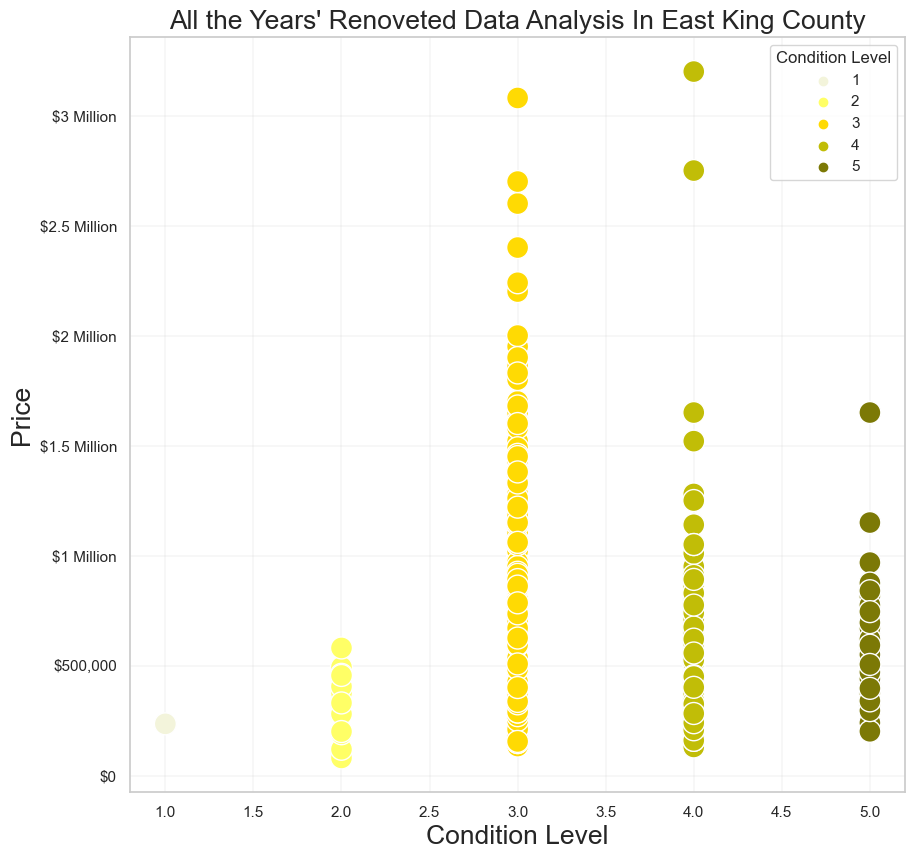

In [439]:
flatui = ['#F3F4DB','#FFFF66','#FFDA03','#c1bd07','#7c7906',]

x = regressiondata6['Condition_Level']
y = regressiondata6['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata6, x=x, y=y,s=250, linewidth = 1,
                    hue='Condition_Level',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In East King County',size=19)
plt.xlabel("Condition Level", size=19)
plt.legend(title='Condition Level')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$500,000','$1 Million',
                    '$1.5 Million','$2 Million','$2.5 Million','$3 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [478]:
Predictions5 = []
for i in condition:
    if i == 1:Predictions5.append('$345,109 - $889,994') 
    if i == 2:Predictions5.append('$345,109 - $889,994') 
    if i == 3:Predictions5.append('$290,801 - $819,001')
    if i == 4:Predictions5.append('$290,801 - $819,001') 
    if i == 5: Predictions5.append('$290,801 - $819,001')
len(Predictions5)

2825

In [479]:
count =  collections.Counter(condition)
for i in count:print(i,WEIGHTED_AVERAGE(i,regressiondata6.Condition_Level,regressiondata6.Price))

3 616272.570162467
4 544976.2934472944
2 317463.8888888888
5 598775.4814814819
1 235000.0


In [480]:
Weighted_Average_Predictions5 = []
for i in condition:
    
    if i == 1:Weighted_Average_Predictions5.append('$235,000')
    if i == 2: Weighted_Average_Predictions5.append('$317,463')
    if i == 3:Weighted_Average_Predictions5.append('$616,272')
    if i == 4:Weighted_Average_Predictions5.append('$544,976') 
    if i == 5:Weighted_Average_Predictions5.append('$598,775')
len(Weighted_Average_Predictions5)

2825

In [498]:
Weighted_Average_Prediction5 = pd.DataFrame({'Condition Level':condition,
                           'Weighted_Average_Prediction':Weighted_Average_Predictions5,'Actual Price':price1})
Weighted_Average_Prediction5

Condition Level Weighted_Average_Prediction Actual Price
0                   3                    $616,272     $510,000
1                   4                    $544,976     $400,000
2                   3                    $616,272     $395,000
3                   3                    $616,272     $580,500
4                   3                    $616,272     $625,000
...               ...                         ...          ...
2820                3                    $616,272     $520,000
2821                3                    $616,272     $716,500
2822                3                    $616,272     $599,000
2823                3                    $616,272   $3,350,000
2824                3                    $616,272     $547,000

[2825 rows x 3 columns]

In [497]:
len(pricee)

2455

In [499]:
Quantile_Regression_Prediction5 = pd.DataFrame({'Condition Level':condition,
                           'Quantile_Regression_Prediction':Predictions5,'Actual Price':price1})
Quantile_Regression_Prediction5

Condition Level Quantile_Regression_Prediction Actual Price
0                   3            $290,801 - $819,001     $510,000
1                   4            $290,801 - $819,001     $400,000
2                   3            $290,801 - $819,001     $395,000
3                   3            $290,801 - $819,001     $580,500
4                   3            $290,801 - $819,001     $625,000
...               ...                            ...          ...
2820                3            $290,801 - $819,001     $520,000
2821                3            $290,801 - $819,001     $716,500
2822                3            $290,801 - $819,001     $599,000
2823                3            $290,801 - $819,001   $3,350,000
2824                3            $290,801 - $819,001     $547,000

[2825 rows x 3 columns]

In [700]:
%store Quantile_Regression_Prediction5
%store Weighted_Average_Prediction5

Stored 'Quantile_Regression_Prediction5' (DataFrame)
Stored 'Weighted_Average_Prediction5' (DataFrame)


In [501]:
def SQFT_LIVING(SQFT_LIVINGS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_living = house_info['Sqft_living'].tolist()
    
    living_index = []
    for i,x in enumerate(sqft_living):
        if x == SQFT_LIVINGS:living_index.append(i)

    living_eastking = []
    for i in living_index:
        if locations[i] == zip_loca[0] : living_eastking.append(i)
        elif locations[i] == zip_loca[1] : living_eastking.append(i)
        elif locations[i] == zip_loca[2] : living_eastking.append(i)
        elif locations[i] == zip_loca[3] : living_eastking.append(i)
        elif locations[i] == zip_loca[4] : living_eastking.append(i)
        elif locations[i] == zip_loca[5] : living_eastking.append(i)
        elif locations[i] == zip_loca[6] : living_eastking.append(i)
        elif locations[i] == zip_loca[7]: living_eastking.append(i)
        elif locations[i] == zip_loca[8] : living_eastking.append(i)
        
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in living_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_sqft_living = house_info["Sqft_living"].value_counts().index.tolist()
price_living_eastking = []
for i in no_of_sqft_living:
    price_living_eastking.append(SQFT_LIVING(i))
price_living_eastking= sum(price_living_eastking, [])
len(price_living_eastking)

2455

In [507]:
def AMOUNT_LIVING(AMOUNT_LIVINGS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_living = house_info['Sqft_living'].tolist()
    X_value = []
    living_index = []
      
    for i,x in enumerate(sqft_living):
        if x == AMOUNT_LIVINGS:living_index.append(i)

    for i in living_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LIVINGS)
    return X_value

no_of_sqft_living = house_info["Sqft_living"].value_counts().index.tolist()
amount_living_eastking = []
for i in no_of_sqft_living:
    amount_living_eastking.append(AMOUNT_LIVING(i))
amount_living_eastking= sum(amount_living_eastking, [])
len(amount_living_eastking)

2455

In [508]:
regressiondata7 = pd.DataFrame({'Amount_of_sqft_living':amount_living_eastking,
                                'Price':price_living_eastking})
regressiondata7

Amount_of_sqft_living      Price
0                      1300   275000.0
1                      1300   369500.0
2                      1300   350000.0
3                      1300   380000.0
4                      1300   430000.0
...                     ...        ...
2450                   3526   911000.0
2451                   5930  1520000.0
2452                   7850  2700000.0
2453                   6085  1610000.0
2454                   3545  1030000.0

[2455 rows x 2 columns]

<ipython-input-510-e19501282041>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million',


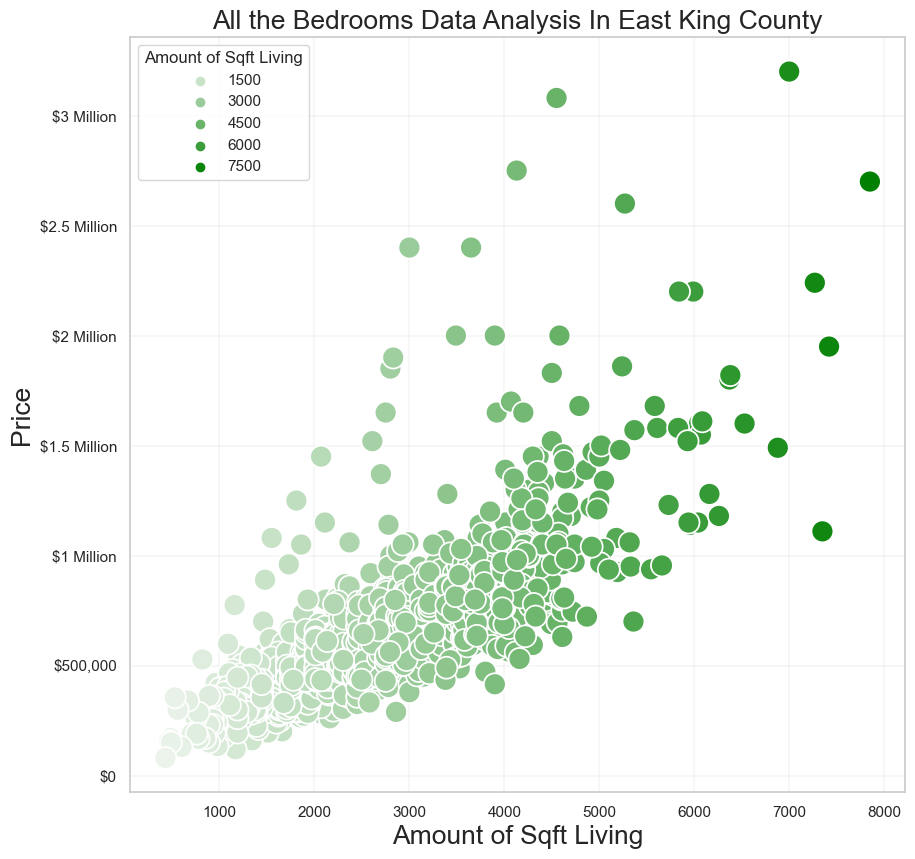

In [510]:
x = regressiondata7['Amount_of_sqft_living']
y = regressiondata7['Price']

sns.set(style='whitegrid')
cmap = sns.light_palette("green", as_cmap=True)

#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})

ax = sns.scatterplot(data=regressiondata7, x=x, y=y,s=250,hue='Amount_of_sqft_living',
                   palette=cmap )
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In East King County',size=19)
plt.xlabel("Amount of Sqft Living", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Sqft Living')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million',
                 '$2.5 Million','$3 Million' ])
plt.show()

In [511]:
train_df, test_df = train_test_split(regressiondata7, test_size=0.10, shuffle=False)

In [512]:
X_train, y_train = train_df[['Amount_of_sqft_living']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_sqft_living']], test_df[['Price']]

In [513]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [514]:
Quantile_regression7 = pd.DataFrame({'Amount_of_sqft_living': X_test.reset_index()['Amount_of_sqft_living'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})
Quantile_regression7[100:]

Amount_of_sqft_living            0.1            0.5           0.9  \
100                   4610  667660.557570  781326.381454  1.020275e+06   
101                   4610  667660.557570  781326.381454  1.020275e+06   
102                   4610  667660.557570  781326.381454  1.020275e+06   
103                   4610  667660.557570  781326.381454  1.020275e+06   
104                   4380  667660.557570  781326.381454  1.020275e+06   
..                     ...            ...            ...           ...   
241                   3526  571580.016974  819331.733036  9.093288e+05   
242                   5930  667660.557570  781326.381454  1.020275e+06   
243                   7850  667660.557570  781326.381454  1.020275e+06   
244                   6085  667660.557570  781326.381454  1.020275e+06   
245                   3545  571580.016974  819331.733036  9.093288e+05   

         Price  
100   960000.0  
101  1200000.0  
102  1170000.0  
103   750000.0  
104   945000.0  
..         ...  
241   911000.0  
242  1520000.0  
243  2700000.0  
244  1610000.0  
245  1030000.0  

[146 rows x 5 columns]

In [524]:
melted_data8 = pd.melt(Quantile_regression7, id_vars=['Amount_of_sqft_living'])
melted_data8 = melted_data8.drop(range(738,984  ))
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_sqft_living Percentile         value
0                     3640        0.1  6.854261e+05
1                     3640        0.1  6.854261e+05
2                     3640        0.1  6.854261e+05
3                     3640        0.1  6.854261e+05
4                     3880        0.1  6.676606e+05
..                     ...        ...           ...
733                   3526        0.9  9.093288e+05
734                   5930        0.9  1.020275e+06
735                   7850        0.9  1.020275e+06
736                   6085        0.9  1.020275e+06
737                   3545        0.9  9.093288e+05

[738 rows x 3 columns]

In [531]:
for x,i in enumerate(melted_data8.Amount_of_sqft_living):
    if 1000 <= i <= 2000:
        print(i,melted_data8.Percentile[x],melted_data8.value[x])

1445 0.1 264596.4204725375
1445 0.1 264596.4204725375
1445 0.1 264596.4204725375
1445 0.1 264596.4204725375
1445 0.1 264596.4204725375
1778 0.1 324680.4849291893
1676 0.1 351600.5311818357
1445 0.5 411741.39842287207
1445 0.5 411741.39842287207
1445 0.5 411741.39842287207
1445 0.5 411741.39842287207
1445 0.5 411741.39842287207
1778 0.5 475221.36566912313
1676 0.5 433677.6107581288
1445 0.9 500762.6264862364
1445 0.9 500762.6264862364
1445 0.9 500762.6264862364
1445 0.9 500762.6264862364
1445 0.9 500762.6264862364
1778 0.9 542554.1825311828
1676 0.9 554313.5615276373


<ipython-input-528-dd3f2a8acbf4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


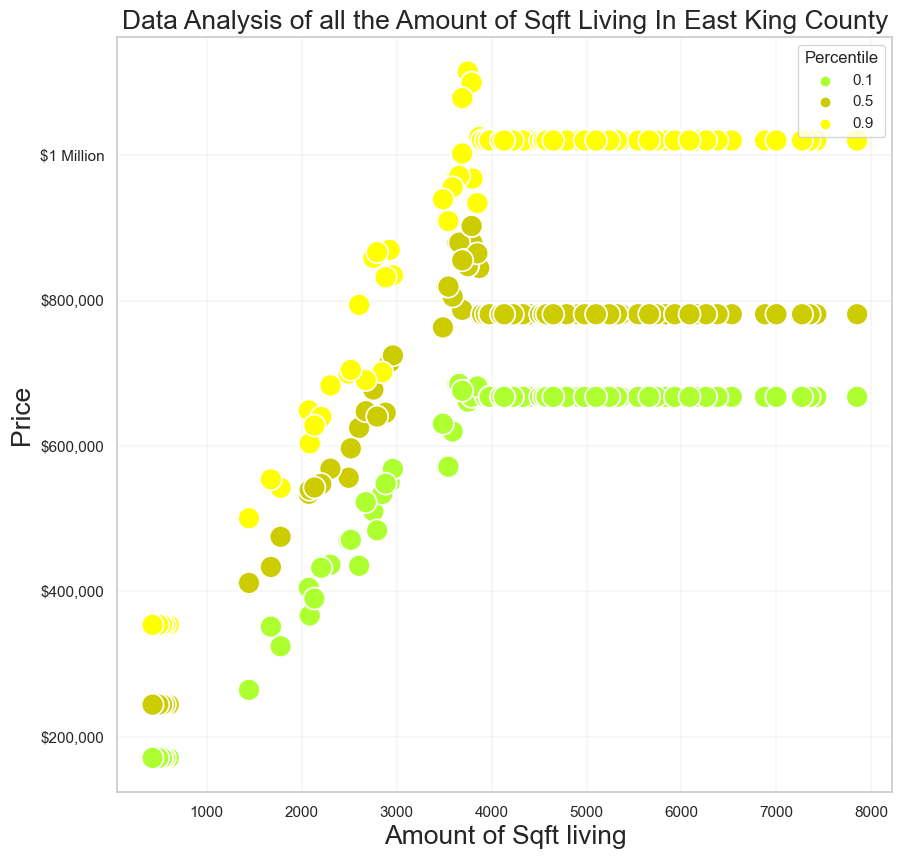

In [528]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data8, x="Amount_of_sqft_living",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Sqft Living In East King County',size=19)
plt.xlabel("Amount of Sqft living", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
            '$1 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Sqft living")
plt.gcf().set_size_inches((10,10))

In [532]:
Quantile_regression7_updated = pd.DataFrame({'Amount_of_sqft_living':[0,1000,2000,4000,6000,8000,10000],
    '0.1':[171031.59012443846,171031.59012443846,264596.4204725375, 667660.5575699443,
            667660.5575699443, 667660.5575699443, 667660.5575699443],
    '0.5':[244312.1015114371,244312.1015114371,411741.39842287207, 781326.3814538632,
            781326.3814538632, 781326.3814538632, 781326.3814538632],
    '0.9':[354041.3133244757,354041.3133244757, 554313.5615276373, 1020274.5833823706,
            1020274.5833823706, 1020274.5833823706, 1020274.5833823706]})

In [533]:
melted_data8 = pd.melt(Quantile_regression7_updated, id_vars=['Amount_of_sqft_living'])
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_sqft_living Percentile         value
0                       0        0.1  1.710316e+05
1                    1000        0.1  1.710316e+05
2                    2000        0.1  2.645964e+05
3                    4000        0.1  6.676606e+05
4                    6000        0.1  6.676606e+05
5                    8000        0.1  6.676606e+05
6                   10000        0.1  6.676606e+05
7                       0        0.5  2.443121e+05
8                    1000        0.5  2.443121e+05
9                    2000        0.5  4.117414e+05
10                   4000        0.5  7.813264e+05
11                   6000        0.5  7.813264e+05
12                   8000        0.5  7.813264e+05
13                  10000        0.5  7.813264e+05
14                      0        0.9  3.540413e+05
15                   1000        0.9  3.540413e+05
16                   2000        0.9  5.543136e+05
17                   4000        0.9  1.020275e+06
18                   6000        0.9  1.020275e+06
19                   8000        0.9  1.020275e+06
20                  10000        0.9  1.020275e+06

<ipython-input-537-b5483875a788>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '')]

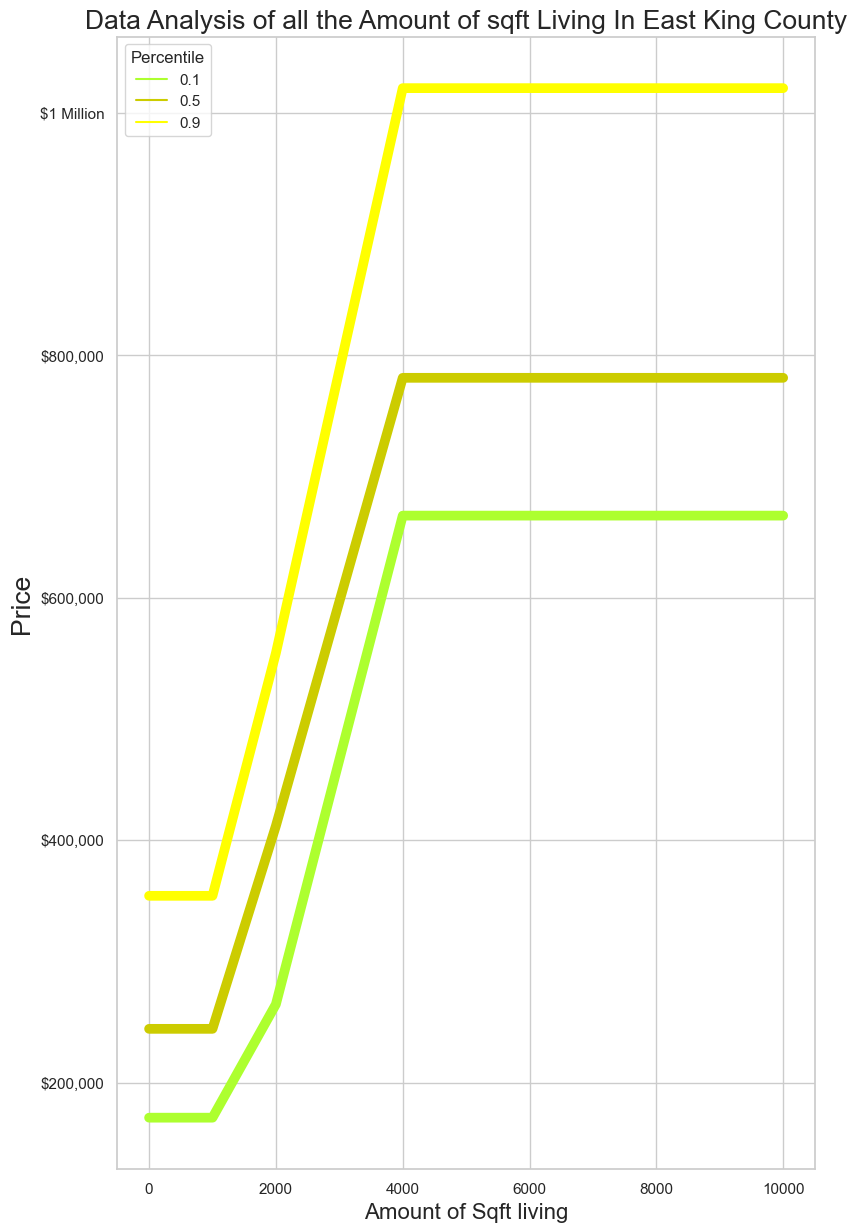

In [537]:
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data8, x="Amount_of_sqft_living",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Data Analysis of all the Amount of sqft Living In East King County',size=19)
plt.xlabel("Amount of Sqft living", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
            '$1 Million'])#,'$1.2 Million','$1.4 Million','$1.6 Million','$1.75 Million'])

In [538]:
(Quantile_regression7['Price'] > Quantile_regression7['0.1']).value_counts()

True     226
False     20
dtype: int64

In [539]:
i = 0
y= 0
x = []
while i < 226:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 20:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [540]:
(Quantile_regression7['Price'] > Quantile_regression7['0.5']).value_counts()

True     182
False     64
dtype: int64

In [541]:
i = 0
y= 0
x = []
while i < 182:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 64:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [542]:
(Quantile_regression7['Price'] > Quantile_regression7['0.9']).value_counts()

False    144
True     102
dtype: int64

In [543]:
i = 0
y= 0
x = []
while i < 144:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 102:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

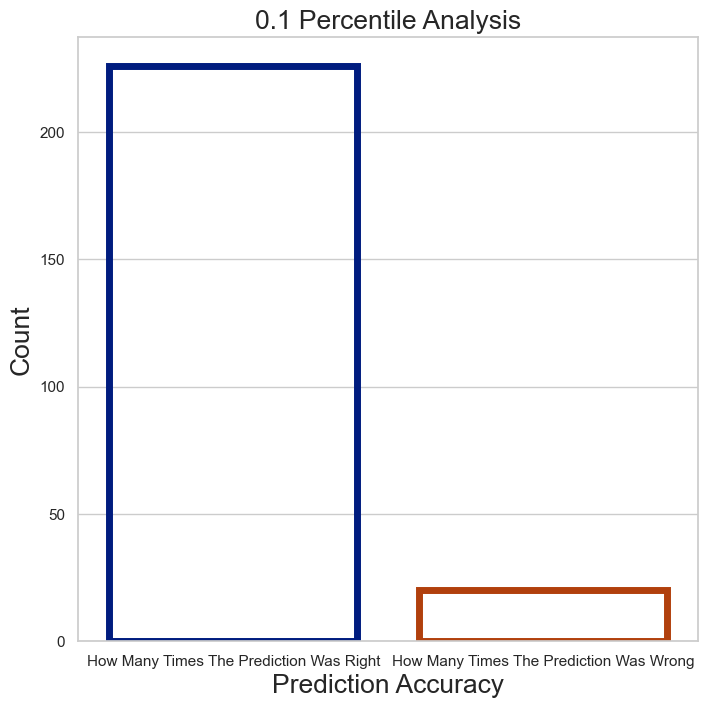

In [544]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

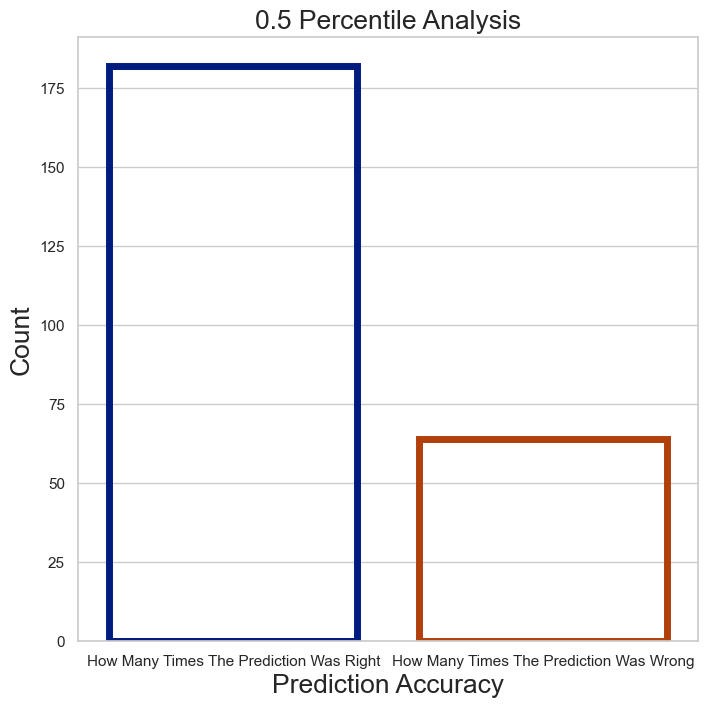

In [545]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

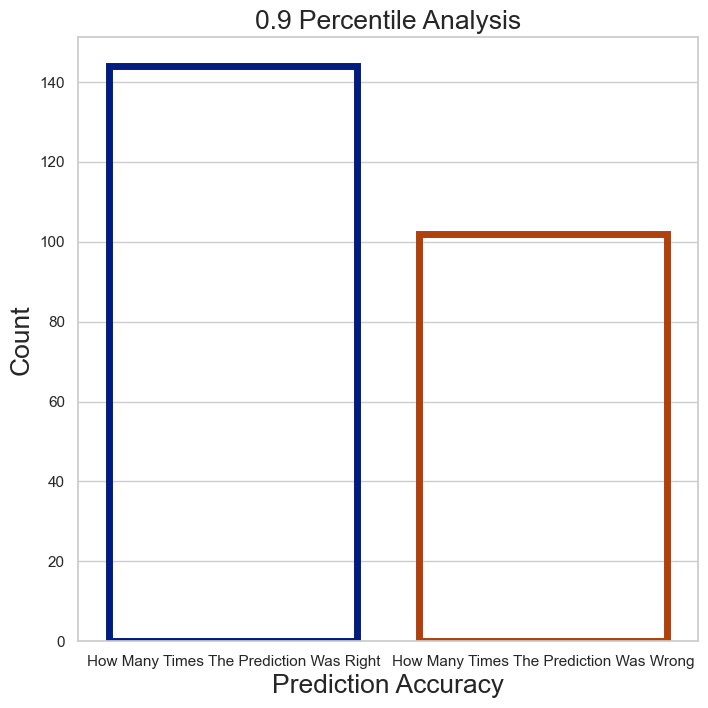

In [546]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [559]:
 for x,i in enumerate(melted_data8.Amount_of_sqft_living):
    if 3001 <= i <= 4000:
        print(i,melted_data8.Percentile[x],melted_data8.value[x])

4000 0.1 667660.5575699443
4000 0.5 781326.3814538632
4000 0.9 1020274.5833823706


In [548]:
sqft_living = []
for i in index:
    sqft_living.append(raw_info.sqft_living[i])
len(sqft_living)

2825

In [557]:
Predictions7 = []
for i in sqft_living:
    if -1 <= i <=   1000:Predictions7.append('$171,031- $354,041')
    if 1001 <= i <= 2000:Predictions7.append('$264,596- $554,313')
    if 2001 <= i <= 3000:Predictions7.append('$264,596- $554,313') 
    if 3001 <= i <= 4000:Predictions7.append('$667,660- $1,020,274')
    if 4001 <= i <= 8000:Predictions7.append('$667,660- $1,020,274')
    if 8001 <= i <= 9000:Predictions7.append('$667,660- $1,020,274')
    if 9001 <= i <= 20000:Predictions7.append('$667,660- $1,020,274')
len(Predictions7)

2825

In [562]:
count

Counter({1680: 11,
         1370: 8,
         1890: 15,
         2320: 16,
         2570: 12,
         3160: 9,
         3430: 5,
         2310: 17,
         2070: 14,
         2010: 15,
         2420: 15,
         3400: 6,
         2020: 9,
         1900: 7,
         1910: 13,
         2240: 10,
         2760: 5,
         1000: 4,
         3650: 3,
         1510: 7,
         1230: 7,
         2100: 19,
         3360: 6,
         4550: 2,
         2180: 11,
         1660: 8,
         2030: 8,
         2580: 7,
         560: 1,
         1840: 16,
         3520: 5,
         2440: 11,
         3230: 10,
         2130: 8,
         1600: 9,
         1750: 7,
         2085: 1,
         1860: 12,
         6070: 1,
         4870: 1,
         3545: 1,
         430: 1,
         3840: 5,
         4190: 2,
         3390: 4,
         4860: 1,
         2810: 8,
         2120: 14,
         3180: 20,
         6050: 1,
         4740: 3,
         2230: 24,
         4120: 4,
         1160: 7,
         32

In [555]:
y = []
count =  collections.Counter(sqft_living)
for i in count:y.append((i,WEIGHTED_AVERAGE(i,regressiondata7.Amount_of_sqft_living,regressiondata7.Price)))
np.array(y)
y.sort()
y

ZeroDivisionError: division by zero

In [646]:
Weighted_Average_Predictions7 = []
for x in sqft_living:
    for i, (v, *_) in enumerate(y):
        if x == v: Weighted_Average_Predictions7.append( "${:,.0f}". format(y[i][1]))
Weighted_Average_Predictions7

['$387,403',
 '$470,676',
 '$488,822',
 '$765,034',
 '$532,858',
 '$831,567',
 '$729,748',
 '$659,616',
 '$551,305',
 '$448,700',
 '$664,758',
 '$488,746',
 '$841,891',
 '$696,607',
 '$502,925',
 '$448,700',
 '$746,829',
 '$849,199',
 '$383,212',
 '$998,056',
 '$336,903',
 '$535,690',
 '$499,580',
 '$526,051',
 '$787,170',
 '$440,567',
 '$336,602',
 '$1,058,458',
 '$874,393',
 '$817,768',
 '$512,684',
 '$678,408',
 '$479,996',
 '$301,333',
 '$382,707',
 '$551,043',
 '$802,568',
 '$782,175',
 '$551,043',
 '$548,362',
 '$543,828',
 '$1,185,517',
 '$543,828',
 '$442,903',
 '$720,074',
 '$512,684',
 '$628,565',
 '$1,505,000',
 '$1,006,665',
 '$475,515',
 '$566,420',
 '$488,822',
 '$828,443',
 '$536,561',
 '$535,690',
 '$421,805',
 '$655,835',
 '$655,835',
 '$732,124',
 '$347,703',
 '$371,812',
 '$587,994',
 '$628,877',
 '$742,076',
 '$585,181',
 '$438,822',
 '$526,051',
 '$476,911',
 '$538,278',
 '$536,561',
 '$272,719',
 '$316,371',
 '$681,248',
 '$628,877',
 '$325,607',
 '$485,377',
 '$8

In [707]:
Quantile_Regression_Prediction7 = pd.DataFrame({'Amount_of_sqft_Living': sqft_living,
                           'Quantile_Regression_Prediction':Predictions7,'Actual Price':price1})
Quantile_Regression_Prediction7

Amount_of_sqft_Living Quantile_Regression_Prediction Actual Price
0                      1180             $336,638- $724,824     $221,900
1                      1960             $336,638- $724,824     $604,000
2                      1780             $336,638- $724,824     $229,500
3                      2950             $336,638- $724,824     $650,000
4                      1890             $336,638- $724,824     $395,000
...                     ...                            ...          ...
8344                   2520             $336,638- $724,824     $610,685
8345                   3510           $710,003- $1,514,226   $1,010,000
8346                   1310             $336,638- $724,824     $475,000
8347                   2310             $336,638- $724,824     $400,000
8348                   1600             $336,638- $724,824     $400,000

[8349 rows x 3 columns]

In [701]:
Weighted_Average_Prediction7 = pd.DataFrame({'Amount_of_sqft_Living':sqft_living,
                           'Weighted_Average_Prediction':Weighted_Average_Predictions7,
                            'Actual Price':pricee})
Weighted_Average_Prediction7

Amount_of_sqft_Living Weighted_Average_Prediction Actual Price
0                      1180                    $387,403     $221,900
1                      1960                    $470,676     $604,000
2                      1780                    $488,822     $229,500
3                      2950                    $765,034     $650,000
4                      1890                    $532,858     $395,000
...                     ...                         ...          ...
8344                   2520                    $656,487     $610,685
8345                   3510                    $872,158   $1,010,000
8346                   1310                    $363,025     $475,000
8347                   2310                    $678,408     $400,000
8348                   1600                    $451,349     $400,000

[8349 rows x 3 columns]

In [867]:
%store Quantile_Regression_Prediction7
%store Weighted_Average_Prediction7
%store pricee

Stored 'Quantile_Regression_Prediction7' (DataFrame)
Stored 'Weighted_Average_Prediction7' (DataFrame)
Stored 'pricee' (list)


In [344]:
def SQFT_LOT(SQFT_LOTS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_lot = house_info['Sqft_lot'].tolist()

    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == SQFT_LOTS:lot_index.append(i)
            
    index = []
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    
    lot_eastking = []
    for i in lot_index:
        if locations[i] == zip_loca[0] : lot_eastking.append(i)
        elif locations[i] == zip_loca[1] : lot_eastking.append(i)
        elif locations[i] == zip_loca[2] : lot_eastking.append(i)
        elif locations[i] == zip_loca[3] : lot_eastking.append(i)
        elif locations[i] == zip_loca[4] : lot_eastking.append(i)
        elif locations[i] == zip_loca[5] : lot_eastking.append(i)
        elif locations[i] == zip_loca[6] : lot_eastking.append(i)
        elif locations[i] == zip_loca[7]: lot_eastking.append(i)
        elif locations[i] == zip_loca[8] : lot_eastking.append(i)
        elif locations[i] == zip_loca[9] : lot_eastking.append(i)
        elif locations[i] == zip_loca[10] : lot_eastking.append(i)
        elif locations[i] == zip_loca[11] : lot_eastking.append(i)
        elif locations[i] == zip_loca[12]: lot_eastking.append(i)
        elif locations[i] == zip_loca[13] : lot_eastking.append(i)
        elif locations[i] == zip_loca[14] : lot_eastking.append(i)
        elif locations[i] == zip_loca[15] : lot_eastking.append(i)
        elif locations[i] == zip_loca[16]: lot_eastking.append(i)
        elif locations[i] == zip_loca[17] : lot_eastking.append(i)
        elif locations[i] == zip_loca[18]: lot_eastking.append(i)
        elif locations[i] == zip_loca[19] : lot_eastking.append(i)
        elif locations[i] == zip_loca[20]: lot_eastking.append(i)
        elif locations[i] == zip_loca[21] : lot_eastking.append(i)
        elif locations[i] == zip_loca[22] : lot_eastking.append(i)
        elif locations[i] == zip_loca[23] : lot_eastking.append(i)
        elif locations[i] == zip_loca[24] : lot_eastking.append(i)
        elif locations[i] == zip_loca[25] : lot_eastking.append(i)
        elif locations[i] == zip_loca[26] : lot_eastking.append(i)
        elif locations[i] == zip_loca[27] : lot_eastking.append(i)
        elif locations[i] == zip_loca[28]: lot_eastking.append(i)
        elif locations[i] == zip_loca[29] : lot_eastking.append(i)
        elif locations[i] == zip_loca[30] : lot_eastking.append(i)
        elif locations[i] == zip_loca[31]: lot_eastking.append(i)
        elif locations[i] == zip_loca[32] : lot_eastking.append(i)
        elif locations[i] == zip_loca[33] : lot_eastking.append(i)
        elif locations[i] == zip_loca[34] : lot_eastking.append(i)
        elif locations[i] == zip_loca[35]: lot_eastking.append(i)
        elif locations[i] == zip_loca[36] : lot_eastking.append(i)
        elif locations[i] == zip_loca[37] : lot_eastking.append(i)
        elif locations[i] == zip_loca[38] : lot_eastking.append(i)
        elif locations[i] == zip_loca[39] : lot_eastking.append(i)
        elif locations[i] == zip_loca[40] : lot_eastking.append(i)
        elif locations[i] == zip_loca[41] : lot_eastking.append(i)
        elif locations[i] == zip_loca[42] : lot_eastking.append(i)
        elif locations[i] == zip_loca[43]: lot_eastking.append(i)
        elif locations[i] == zip_loca[44] : lot_eastking.append(i)
        elif locations[i] == zip_loca[45] : lot_eastking.append(i)
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in lot_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_sqft_lot = house_info["Sqft_lot"].value_counts().index.tolist()
price_lot_eastking = []
for i in no_of_sqft_lot:
    price_lot_eastking.append(SQFT_LOT(i))
price_lot_eastking= sum(price_lot_eastking, [])
len(price_lot_eastking)

8349

In [346]:
def AMOUNT_LOT(AMOUNT_LOTS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_lot = house_info['Sqft_lot'].tolist()
    X_value = []
    
    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == AMOUNT_LOTS:lot_index.append(i)
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    

    for i in lot_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[35] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[36]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[38]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[39] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[40] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[41]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[42] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[43]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[44] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[45]: X_value.append(AMOUNT_LOTS)
       

    return X_value
no_of_sqft_lot = house_info["Sqft_lot"].value_counts().index.tolist()
amount_lot_eastking = []
for i in no_of_sqft_lot:
    amount_lot_eastking.append(AMOUNT_LOT(i))
amount_lot_eastking= sum(amount_lot_eastking, [])
len(amount_lot_eastking)

8349

In [672]:
regressiondata8 = pd.DataFrame({'Amount_of_Lot':amount_lot_eastking,
                                'Price':price_lot_eastking})

In [394]:
#taking away outlyers
numbers = []
lots = []
index = []
for i,x in enumerate(regressiondata8.Amount_of_Lot):
    numbers.append(regressiondata8.Price[i])
    lots.append(x)
    

for x,i in enumerate(lots):
    if 200000 <= i :
        index.append(x)

for i in index:
    regressiondata8= regressiondata8.drop(i)

regressiondata8

Amount_of_Lot     Price
0              5000  604000.0
1              5000  650000.0
2              5000  207950.0
3              5000  615000.0
4              5000  275000.0
...             ...       ...
8344           9021  610000.0
8345           6986  318500.0
8346          35736  595000.0
8347          17313  912000.0
8348          35752  580000.0

[8284 rows x 2 columns]

<ipython-input-349-88cf96ca4a46>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',


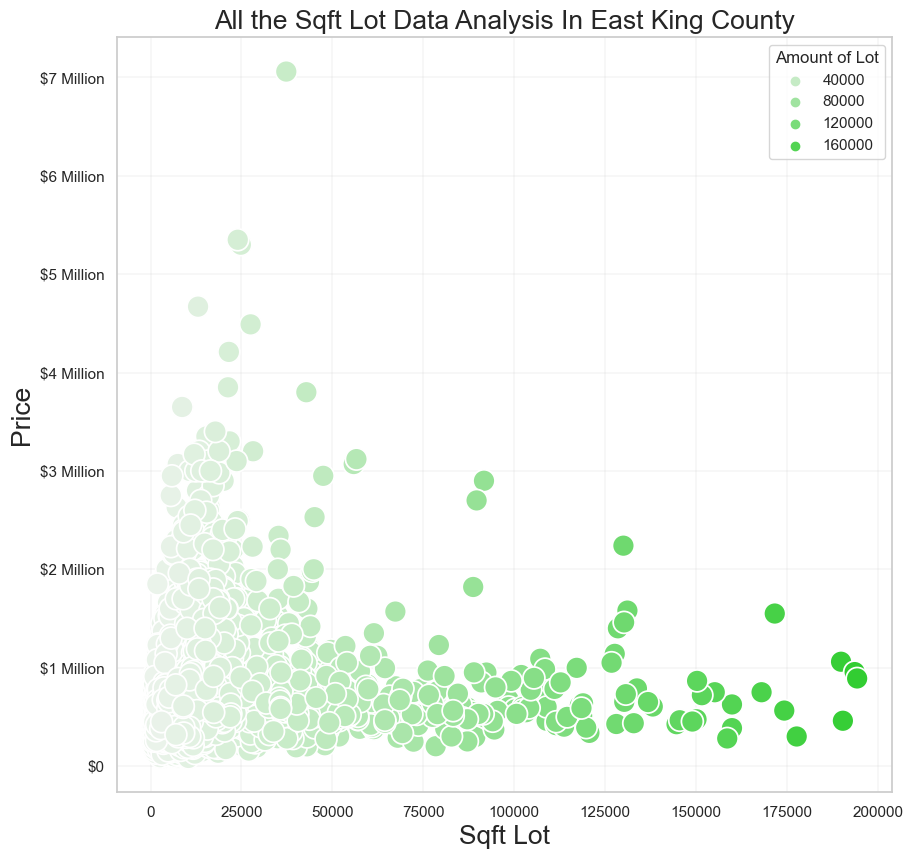

In [349]:
x = regressiondata8['Amount_of_Lot']
y = regressiondata8['Price']
sns.set(style='whitegrid')
cmap = sns.light_palette("#32CD32", as_cmap=True)

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata8, x=x, y=y,s=250,hue='Amount_of_Lot',
                      palette=cmap)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Sqft Lot Data Analysis In East King County',size=19)
plt.xlabel("Sqft Lot", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Lot')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
                   '$5 Million','$6 Million','$7 Million'])
plt.show()

In [350]:
train_df, test_df = train_test_split(regressiondata8, test_size=0.10, shuffle=False)

In [351]:
X_train, y_train = train_df[['Amount_of_Lot']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Lot']], test_df[['Price']]

In [352]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [353]:
Quantile_regression7 = pd.DataFrame({'Amount_of_Lot': X_test.reset_index()['Amount_of_Lot'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})
Quantile_regression7[100:]

Amount_of_Lot            0.1            0.5           0.9      Price
100          37500  385910.250194  608952.703639  1.421810e+06   280000.0
101          29536  255739.137380  588953.440344  1.196593e+06  1680000.0
102            814  259333.663248  335002.523417  4.828540e+05   451300.0
103          21300  365256.563080  816431.780984  1.827111e+06  3850000.0
104           9050  274911.215705  554476.644177  8.347130e+05  2380000.0
..             ...            ...            ...           ...        ...
824           9021  274911.215705  554476.644177  8.347130e+05   610000.0
825           6986  276119.386224  561321.087260  8.400439e+05   318500.0
826          35736  440792.999298  751063.955788  1.222944e+06   595000.0
827          17313  344860.456445  783139.846415  1.742439e+06   912000.0
828          35752  429457.231387  598993.911801  1.222944e+06   580000.0

[729 rows x 5 columns]

In [354]:
melted_data8 = pd.melt(Quantile_regression7, id_vars=['Amount_of_Lot'])
melted_data8 = melted_data8.drop(range(2487,3316))
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_Lot Percentile         value
0              5279        0.1  2.830381e+05
1              3612        0.1  3.158120e+05
2              1565        0.1  2.703854e+05
3             91681        0.1  3.826225e+05
4             11816        0.1  3.201783e+05
...             ...        ...           ...
2482           9021        0.9  8.347130e+05
2483           6986        0.9  8.400439e+05
2484          35736        0.9  1.222944e+06
2485          17313        0.9  1.742439e+06
2486          35752        0.9  1.222944e+06

[2487 rows x 3 columns]

In [355]:
for x,i in enumerate(melted_data8.Amount_of_Lot):
    if 75000 <= i <= 100000:
        print(i,melted_data8.Percentile[x],melted_data8.value[x])

91681 0.1 382622.4563344971
87117 0.1 382622.4563344971
83231 0.1 374697.32677436393
76531 0.1 374697.32677436393
88909 0.1 382622.4563344971
78844 0.1 374697.32677436393
83200 0.1 374697.32677436393
89651 0.1 382622.4563344971
94855 0.1 382622.4563344971
91681 0.5 569634.0356444694
87117 0.5 569634.0356444694
83231 0.5 603130.3633498148
76531 0.5 603130.3633498148
88909 0.5 569634.0356444694
78844 0.5 603130.3633498148
83200 0.5 603130.3633498148
89651 0.5 569634.0356444694
94855 0.5 569634.0356444694
91681 0.9 946588.8563531062
87117 0.9 946588.8563531062
83231 0.9 960409.5619997194
76531 0.9 960409.5619997194
88909 0.9 946588.8563531062
78844 0.9 960409.5619997194
83200 0.9 960409.5619997194
89651 0.9 946588.8563531062
94855 0.9 946588.8563531062


<ipython-input-356-56d44bbb2c65>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',


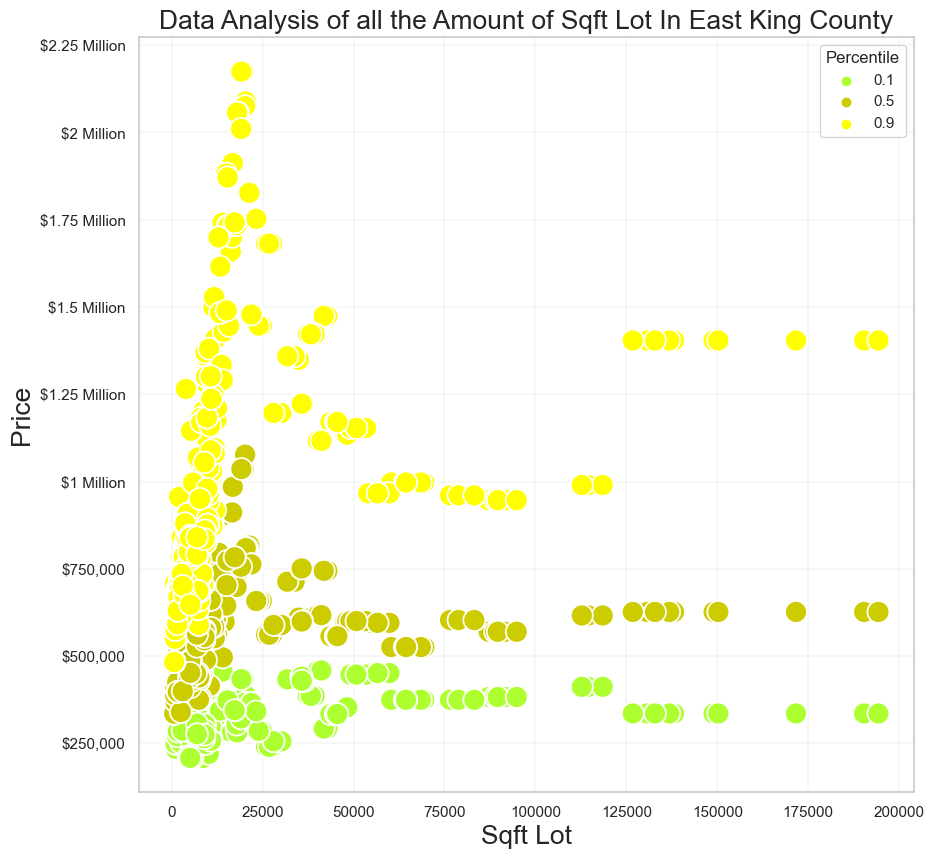

In [356]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data8, x="Amount_of_Lot",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Sqft Lot In East King County',size=19)
plt.xlabel("Sqft Lot", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',
                    '$1.25 Million','$1.5 Million','$1.75 Million','$2 Million','$2.25 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Sqft Lot")
plt.gcf().set_size_inches((10,10))

In [158]:
Quantile_regression7_updated = pd.DataFrame({'Amount_of_sqft_lot':[0,25000,50000,75000,100000,
                                                                  125000,150000,175000,200000],
    '0.1':[201558.6874958529,201558.6874958529,201558.6874958529,201558.6874958529,
          396832.02741502994,396832.02741502994,396832.02741502994,396832.02741502994,
          396832.02741502994],
    '0.5':[574528.3913706675,574528.3913706675,574528.3913706675,574528.3913706675,
           667162.5664501119,
        667162.5664501119,667162.5664501119,667162.5664501119,667162.5664501119],
    '0.9':[939876.5248010337,939876.5248010337,939876.5248010337,939876.5248010337,1491699.0631831647
        ,1491699.0631831647,1491699.0631831647,1491699.0631831647,1491699.0631831647]})

In [159]:
melted_data8 = pd.melt(Quantile_regression7_updated, id_vars=['Amount_of_sqft_lot'])
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_sqft_lot Percentile         value
0                    0        0.1  2.015587e+05
1                25000        0.1  2.015587e+05
2                50000        0.1  2.015587e+05
3                75000        0.1  2.015587e+05
4               100000        0.1  3.968320e+05
5               125000        0.1  3.968320e+05
6               150000        0.1  3.968320e+05
7               175000        0.1  3.968320e+05
8               200000        0.1  3.968320e+05
9                    0        0.5  5.745284e+05
10               25000        0.5  5.745284e+05
11               50000        0.5  5.745284e+05
12               75000        0.5  5.745284e+05
13              100000        0.5  6.671626e+05
14              125000        0.5  6.671626e+05
15              150000        0.5  6.671626e+05
16              175000        0.5  6.671626e+05
17              200000        0.5  6.671626e+05
18                   0        0.9  9.398765e+05
19               25000        0.9  9.398765e+05
20               50000        0.9  9.398765e+05
21               75000        0.9  9.398765e+05
22              100000        0.9  1.491699e+06
23              125000        0.9  1.491699e+06
24              150000        0.9  1.491699e+06
25              175000        0.9  1.491699e+06
26              200000        0.9  1.491699e+06

<ipython-input-160-966aa3e71dc2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '')]

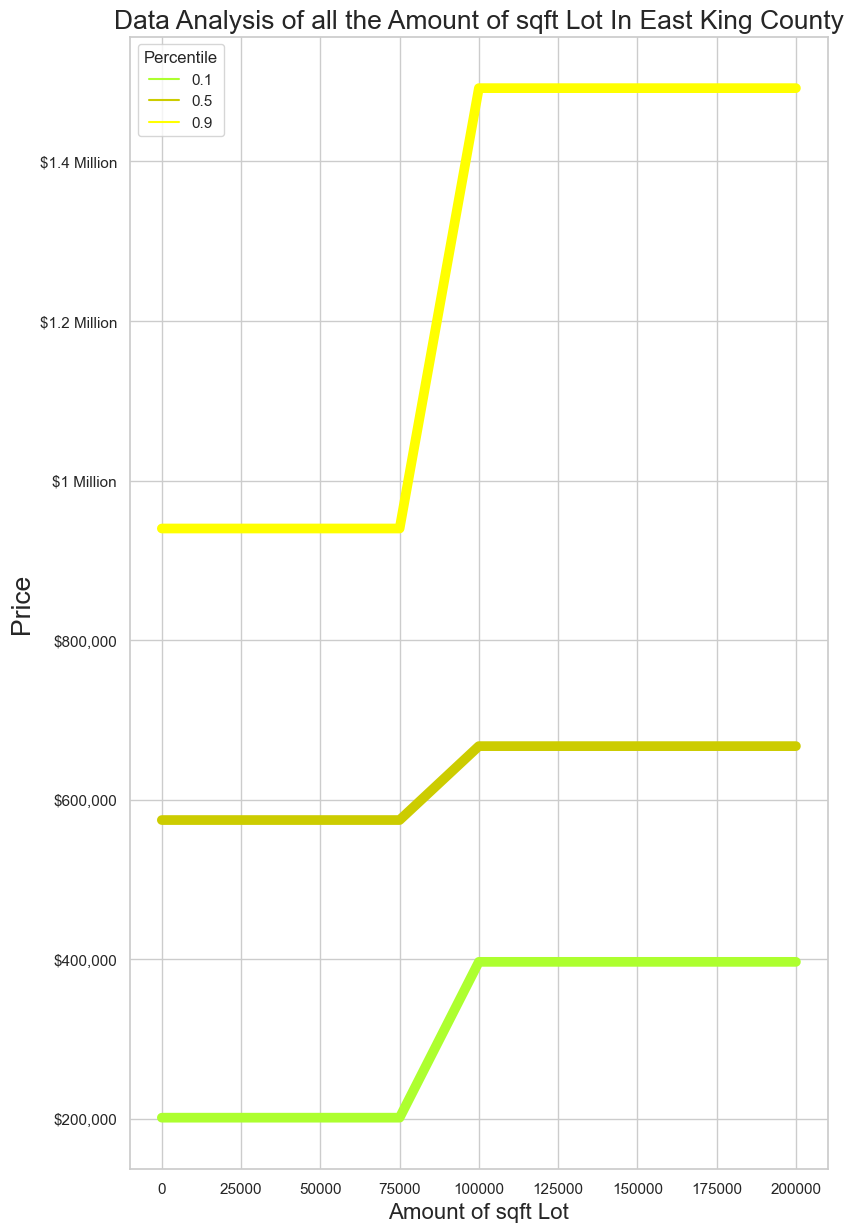

In [160]:
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data8, x="Amount_of_sqft_lot",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Data Analysis of all the Amount of sqft Lot In East King County',size=19)
plt.xlabel("Amount of sqft Lot", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',
                   '$1.2 Million','$1.4 Million'])

In [173]:
(Quantile_regression7['Price'] > Quantile_regression7['0.1']).value_counts()

True     755
False     74
dtype: int64

In [164]:
i = 0
y= 0
x = []
while i < 755:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 74:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [162]:
(Quantile_regression7['Price'] > Quantile_regression7['0.5']).value_counts()

True     449
False    380
dtype: int64

In [166]:
i = 0
y= 0
x = []
while i < 449:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 380:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [163]:
(Quantile_regression7['Price'] > Quantile_regression7['0.9']).value_counts()

False    740
True      89
dtype: int64

In [167]:
i = 0
y= 0
x = []
while i < 740:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 89:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

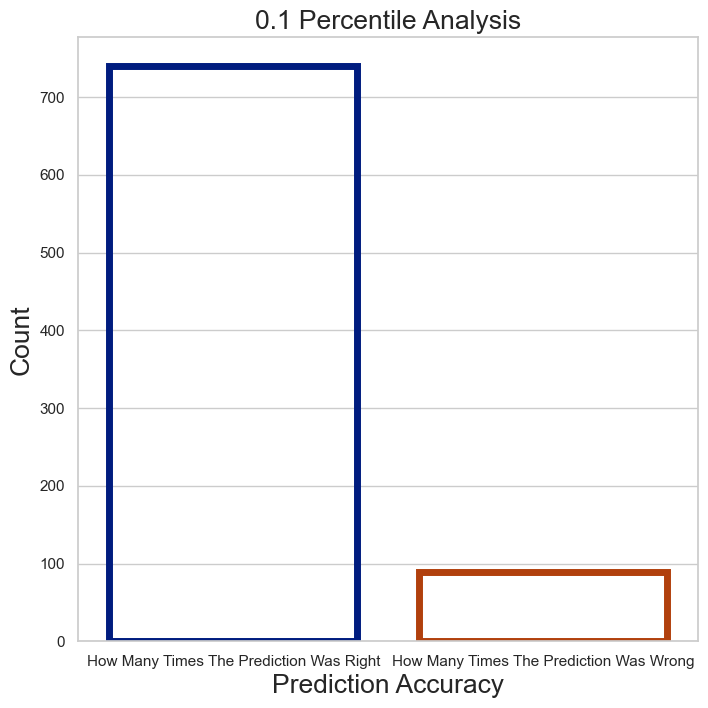

In [168]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

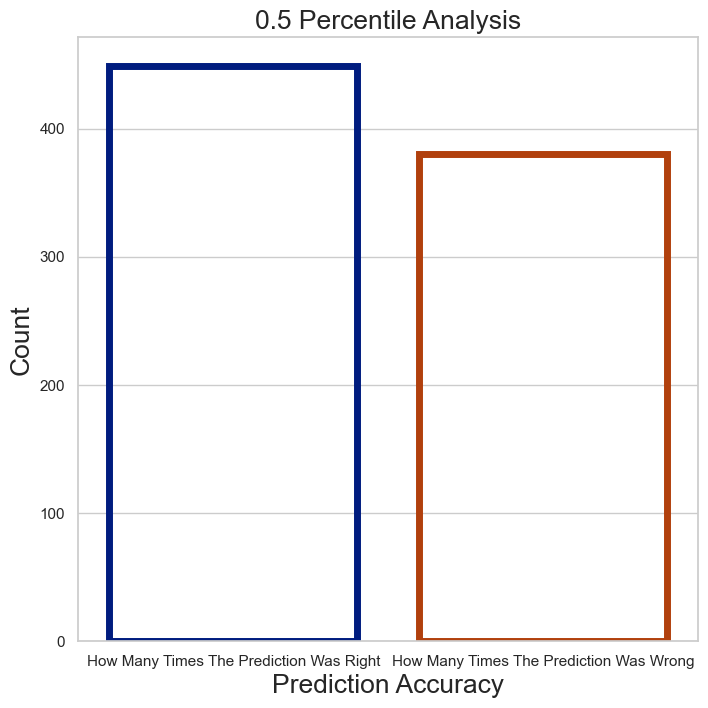

In [170]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

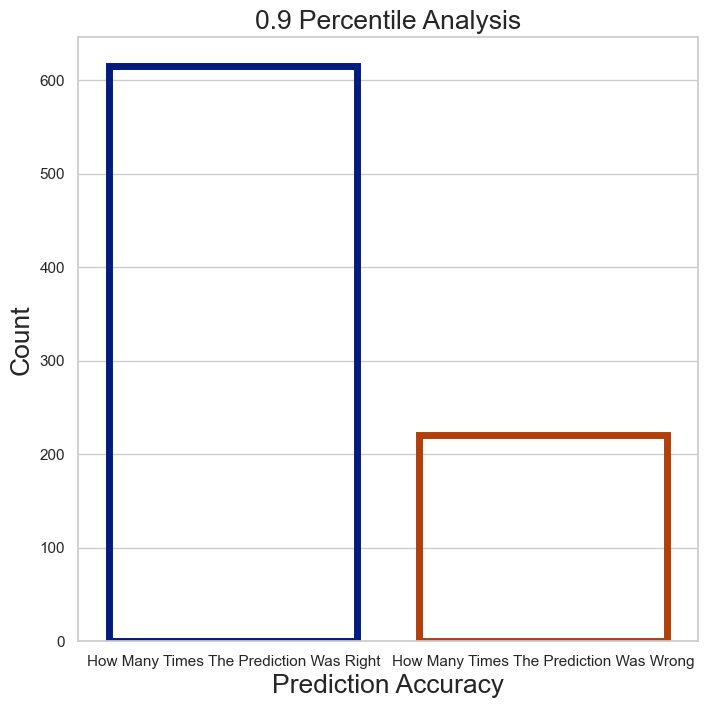

In [171]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [182]:
for x,i in enumerate(melted_data8.Amount_of_sqft_lot):
    if i <= 200001 :
        print(i,melted_data8.Percentile[x],melted_data8.value[x])

0 0.1 201558.6874958529
25000 0.1 201558.6874958529
50000 0.1 201558.6874958529
75000 0.1 201558.6874958529
100000 0.1 396832.02741502994
125000 0.1 396832.02741502994
150000 0.1 396832.02741502994
175000 0.1 396832.02741502994
200000 0.1 396832.02741502994
0 0.5 574528.3913706675
25000 0.5 574528.3913706675
50000 0.5 574528.3913706675
75000 0.5 574528.3913706675
100000 0.5 667162.5664501119
125000 0.5 667162.5664501119
150000 0.5 667162.5664501119
175000 0.5 667162.5664501119
200000 0.5 667162.5664501119
0 0.9 939876.5248010337
25000 0.9 939876.5248010337
50000 0.9 939876.5248010337
75000 0.9 939876.5248010337
100000 0.9 1491699.0631831647
125000 0.9 1491699.0631831647
150000 0.9 1491699.0631831647
175000 0.9 1491699.0631831647
200000 0.9 1491699.0631831647


In [651]:
sqft_lot = []
for i in index2:
    sqft_lot.append(raw_info.sqft_lot[i])
len(sqft_lot)

8349

In [652]:
Predictions8 = []
for i in sqft_lot:
    
    if 0 <= i <=  25000     :Predictions8.append('$201,558 - $939,876') 
    if 25001 <= i <= 50000  :Predictions8.append('$201,558 - $939,876') 
    if 50001 <= i <= 75000  :Predictions8.append('$201,558 - $939,876') 
    if 75001 <= i <= 100000 :Predictions8.append('$396,832- $1,491,699')
    if 100001 <= i <= 125000:Predictions8.append('$396,832- $1,491,699')
    if 125001 <= i <= 150000:Predictions8.append('$396,832- $1,491,699')
    if 150001 <= i <= 175000:Predictions8.append('$396,832- $1,491,699')
    if 175001 <= i <= 200000:Predictions8.append('$396,832- $1,491,699')
    if  i >= 200001         :Predictions8.append('$396,832- $1,91,699')
len(Predictions8)

8349

In [683]:
regressiondata8 = pd.DataFrame({'Amount_of_Lot':amount_lot_eastking,
                                'Price':price_lot_eastking})

In [679]:
y = []
count =  collections.Counter(regressiondata8.Amount_of_Lot)
for i in count: y.append((i,WEIGHTED_AVERAGE(i,regressiondata8.Amount_of_Lot,regressiondata8.Price)))
np.array(y)
y.sort()
y

[(572, 250000.0),
 (600, 367500.0),
 (635, 256950.0),
 (649, 259950.0),
 (675, 420000.0),
 (683, 335000.0),
 (696, 345000.0),
 (698, 346100.0),
 (700, 340000.0),
 (704, 742000.0),
 (705, 333749.5),
 (711, 331750.0),
 (720, 331000.0),
 (725, 427000.0),
 (745, 295424.5),
 (750, 310475.0),
 (758, 305000.0),
 (762, 450000.0),
 (779, 530000.0),
 (780, 380000.0),
 (785, 277140.0),
 (800, 437333.3333333333),
 (801, 300500.0),
 (804, 458999.99999999994),
 (811, 419950.0),
 (814, 451300.0),
 (833, 202000.0),
 (835, 370000.0),
 (850, 290000.0),
 (865, 324625.0),
 (873, 687015.0),
 (874, 389250.0),
 (875, 550000.0),
 (877, 417000.0),
 (886, 377500.0),
 (889, 287000.00000000006),
 (892, 378250.0),
 (895, 369000.0),
 (900, 380000.0),
 (905, 529500.0),
 (912, 375000.0),
 (913, 390000.0),
 (914, 450000.0),
 (915, 334999.99999999994),
 (916, 625000.0),
 (920, 389950.0),
 (922, 399950.0),
 (923, 310000.0),
 (925, 475000.0),
 (926, 487450.0),
 (929, 562500.0),
 (932, 455000.00000000006),
 (934, 474000.0

In [681]:
Weighted_Average_Predictions8 = []
for x in regressiondata8.Amount_of_Lot:
    for i, (v, *_) in enumerate(y):
        if x == v: Weighted_Average_Predictions8.append( "${:,.0f}". format(y[i][1]))
len(Weighted_Average_Predictions8)

8349

In [705]:
Quantile_Regression_Prediction8 = pd.DataFrame({'Amount_of_sqft_lot': sqft_lot,
                           'Quantile_Regression_Prediction':Predictions8,'Actual Price':price1})
Quantile_Regression_Prediction8

Amount_of_sqft_lot Quantile_Regression_Prediction Actual Price
0                   5650            $201,558 - $939,876     $221,900
1                   5000            $201,558 - $939,876     $604,000
2                   7470            $201,558 - $939,876     $229,500
3                   5000            $201,558 - $939,876     $650,000
4                  14040            $201,558 - $939,876     $395,000
...                  ...                            ...          ...
8344                6023            $201,558 - $939,876     $610,685
8345                7200            $201,558 - $939,876   $1,010,000
8346                1294            $201,558 - $939,876     $475,000
8347                5813            $201,558 - $939,876     $400,000
8348                2388            $201,558 - $939,876     $400,000

[8349 rows x 3 columns]

In [703]:
Weighted_Average_Prediction8 = pd.DataFrame({'Amount_of_sqft_lot':sqft_lot,
                           'Weighted_Average_Prediction':Weighted_Average_Predictions8,
                            'Actual Price':pricee})
Weighted_Average_Prediction8

Amount_of_sqft_lot Weighted_Average_Prediction Actual Price
0                   5650                    $528,685     $221,900
1                   5000                    $528,685     $604,000
2                   7470                    $528,685     $229,500
3                   5000                    $528,685     $650,000
4                  14040                    $528,685     $395,000
...                  ...                         ...          ...
8344                6023                    $610,000     $610,685
8345                7200                    $318,500   $1,010,000
8346                1294                    $595,000     $475,000
8347                5813                    $912,000     $400,000
8348                2388                    $580,000     $400,000

[8349 rows x 3 columns]

In [706]:
%store Quantile_Regression_Prediction8
%store Weighted_Average_Prediction8

Stored 'Quantile_Regression_Prediction8' (DataFrame)
Stored 'Weighted_Average_Prediction8' (DataFrame)
